# Préparation des données pour construire un modèle

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/modelisation/0_preprocessing.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter.png)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/modelisation/0_preprocessing.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter.png)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/modelisation/0_preprocessing.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python.png)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABnotebooks/course/modelisation%200_preprocessing.ipynb%C2%BB&security.allowlist.enabled=false)<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=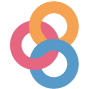.png)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=notebooks/course/modelisation/0_preprocessing.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/modelisation/0_preprocessing.ipynb)
[![githubdev](https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc.png)](https://github.dev/linogaliana/python-datascientist/notebooks/course/modelisation/0_preprocessing.ipynb)

Ce chapitre utilise le jeu de données présenté dans l’[introduction
de cette partie](https://linogaliana-teaching.netlify.app/modelisation/):
les données de vote aux élections présidentielles US
croisées à des variables socio-démographiques. Le code
est disponible [sur Github](https://github.com/linogaliana/python-datascientist/blob/master/content/course/modelisation/get_data.py) mais l’exercice 1 permet, à ceux qui le désirent, d’essayer de reproduire la constitution de la base de données.

Le guide utilisateur de `scikit` est une référence précieuse,
à consulter régulièrement. La partie sur le *preprocessing* est
disponible [ici](https://scikit-learn.org/stable/modules/preprocessing.html).

Nous verrons dans le chapitre sur les *pipelines* comment industrialiser
ces étapes de pré-processing afin de se simplifier la vie pour appliquer
un modèle sur un jeu de données différent de celui sur lequel il a été estimé.

# Construction de la base de données

Les sources étant éclatées, le code pour construire une base combinant toutes ces
sources est directement fourni. Le travail de construction d’une base unique
est un peu fastidieux mais il s’agit d’un bon exercice, que vous pouvez tenter,
pour [réviser `pandas`](#pandas) :

{{% box status=“exercise” title=“Exercice” icon=“fas fa-pencil-alt” %}}

**Exercice 1 : Importer les données des élections US** \[OPTIONNEL\]

1.  Télécharger et importer le shapefile [depuis ce lien](https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_02_sldl_500k.zip)
2.  Exclure les Etats suivants: “02”, “69”, “66”, “78”, “60”, “72”, “15”
3.  Importer les résultats des élections depuis [ce lien](https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv)
4.  Importer les bases disponibles sur le site de l’USDA en faisant attention à renommer les variables de code FIPS de manière identique
    dans les 4 bases
5.  *Merger* ces 4 bases dans une base unique de caractéristiques socio-économiques
6.  *Merger* aux données électorales à partir du code FIPS
7.  *Merger* au shapefile à partir du code FIPS. Faire attention aux 0 à gauche dans certains codes. Il est
    recommandé d’utiliser la méthode `str.lstrip` pour les retirer
8.  Importer les données des élections 2000 à 2016 à partir du [MIT Election Lab](https://electionlab.mit.edu/data)?
    Les données peuvent être directement requêtées depuis l’url
    <https://dataverse.harvard.edu/api/access/datafile/3641280?gbrecs=false>
9.  Créer une variable `share` comptabilisant la part des votes pour chaque candidat.
    Ne garder que les colonnes `"year", "FIPS", "party", "candidatevotes", "share"`
10. Faire une conversion `long` to `wide` avec la méthode `pivot_table` pour garder une ligne
    par comté x année avec en colonnes les résultats de chaque candidat dans cet état.
11. Merger à partir du code FIPS au reste de la base.
    {{% /box %}}

Si vous ne faites pas l’exercice 1, pensez à charger les données en executant la fonction `get_data.py` :

In [2]:
#!pip install geopandas

import requests

url = 'https://raw.githubusercontent.com/linogaliana/python-datascientist/master/content/course/modelisation/get_data.py'
r = requests.get(url, allow_redirects=True)
open('getdata.py', 'wb').write(r.content)

import getdata
votes = getdata.create_votes_dataframes()

ERROR 1: PROJ: proj_create_from_database: Open of /miniconda/envs/python-ENSAE/share/proj failed

Ce code introduit une base nommée `votes` dans l’environnement. Il s’agit d’une
base rassemblant les différentes sources. Elle a l’aspect
suivant:

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,share_2008_democrat,share_2008_other,share_2008_republican,share_2012_democrat,share_2012_other,share_2012_republican,share_2016_democrat,share_2016_other,share_2016_republican,winner
0,29,227,00758566,0500000US29227,29227,Worth,06,690564983,493903,"POLYGON ((-94.63203 40.57176, -94.53388 40.570...",...,0.363714,0.034072,0.602215,0.325382,0.041031,0.633588,0.186424,0.041109,0.772467,republican
1,31,061,00835852,0500000US31061,31061,Franklin,06,1491355860,487899,"POLYGON ((-99.17940 40.35068, -98.72683 40.350...",...,0.284794,0.019974,0.695232,0.250000,0.026042,0.723958,0.149432,0.045427,0.805140,republican
2,36,013,00974105,0500000US36013,36013,Chautauqua,06,2746047476,1139407865,"POLYGON ((-79.76195 42.26986, -79.62748 42.324...",...,0.495627,0.018104,0.486269,0.425017,0.115852,0.459131,0.352012,0.065439,0.582550,republican
3,37,181,01008591,0500000US37181,37181,Vance,06,653713542,42178610,"POLYGON ((-78.49773 36.51467, -78.45728 36.541...",...,0.630827,0.004743,0.364429,0.638870,0.004891,0.356239,0.612154,0.020824,0.367022,democrats
4,47,183,01639799,0500000US47183,47183,Weakley,06,1503107848,3707114,"POLYGON ((-88.94916 36.41010, -88.81642 36.410...",...,0.335720,0.017458,0.646822,0.287590,0.014914,0.697495,0.227511,0.033158,0.739330,republican


La carte choroplèthe suivante permet de visualiser rapidement les résultats
(l’Alaska et Hawaï ont été exclus).

(-127.6146362, -64.0610978, 23.253819649999997, 50.628669349999996)

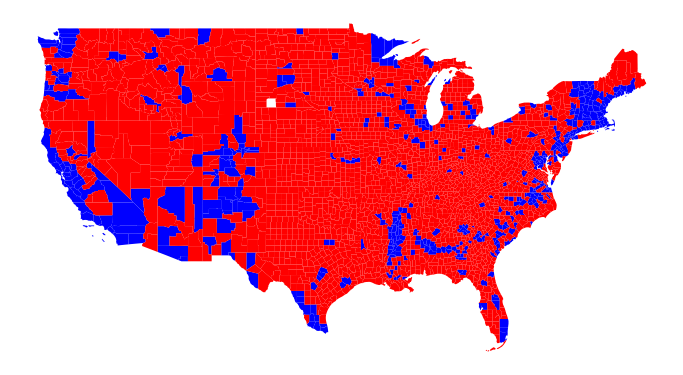

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_dict = {'republican': '#FF0000', 'democrats': '#0000FF'}
#votes.plot(column = "winner", figsize = (12,12), c=votes['winner'].map(color_dict))

fig, ax = plt.subplots(figsize = (12,12))
grouped = votes.groupby('winner')
for key, group in grouped:
    group.plot(ax=ax, column='winner', label=key, color=color_dict[key])
plt.axis('off')

# plt.show()

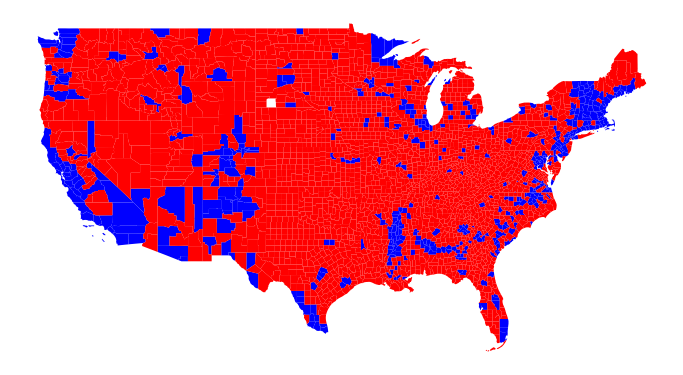

In [5]:
ax.get_figure()

Les cartes choroplèthes peuvent donner une impression fallacieuse ayant servi
de justification pour contester les résultats du vote. En effet, un biais
connu des représentations choroplèthes est qu’elles donnent une importance
visuelle excessive aux grands espaces. Or, ceux-ci sont souvent des espaces
peu denses et influencent donc moins la variable d’intérêt (en l’occurrence
le taux de vote en faveur des républicains/démocrates). Une représentation à
privilégier pour ce type de phénomènes est les ronds proportionnels.

Le [GIF “Land does not vote, people do”](https://www.core77.com/posts/90771/A-Great-Example-of-Better-Data-Visualization-This-Voting-Map-GIF)
qui avait eu un certain succès en 2020 propose un autre mode de visualisation.
La carte originale a probablement été construite avec `JavaScript`. Cependant,
on dispose avec `Python` pour répliquer, à faible coût, cette approche avec
l’une des surcouches à JavaScript vue dans la partie [visualisation](#visualisation).

En l’occurrence, on peut utiliser `plotly` pour tenir compte de la population:

{{\< chart data=“people_vote” \>}}

La Figure a été obtenue avec le code suivant:

In [6]:
import plotly
import plotly.graph_objects as go
import pandas as pd
import geopandas as gpd


centroids = votes.copy()
centroids.geometry = centroids.centroid
centroids['size'] = centroids['CENSUS_2010_POP'] / 10000  # to get reasonable plotable number

color_dict = {"republican": '#FF0000', 'democrats': '#0000FF'}
centroids["winner"] =  np.where(centroids['votes_gop'] > centroids['votes_dem'], 'republican', 'democrats') 


centroids['lon'] = centroids['geometry'].x
centroids['lat'] = centroids['geometry'].y
centroids = pd.DataFrame(centroids[["county_name",'lon','lat','winner', 'CENSUS_2010_POP',"state_name"]])
groups = centroids.groupby('winner')

df = centroids.copy()

df['color'] = df['winner'].replace(color_dict)
df['size'] = df['CENSUS_2010_POP']/6000
df['text'] = df['CENSUS_2010_POP'].astype(int).apply(lambda x: '<br>Population: {:,} people'.format(x))
df['hover'] = df['county_name'].astype(str) +  df['state_name'].apply(lambda x: ' ({}) '.format(x)) + df['text']

fig_plotly = go.Figure(data=go.Scattergeo(
    locationmode = 'USA-states',
    lon=df["lon"], lat=df["lat"],
    text = df["hover"],
    mode = 'markers',
    marker_color = df["color"],
    marker_size = df['size'],
    hoverinfo="text"
    ))

fig_plotly.update_traces(
  marker = {'opacity': 0.5, 'line_color': 'rgb(40,40,40)', 'line_width': 0.5, 'sizemode': 'area'}
)

fig_plotly.update_layout(
        title_text = "Reproduction of the \"Acres don't vote, people do\" map <br>(Click legend to toggle traces)",
        showlegend = True,
        geo = {"scope": 'usa', "landcolor": 'rgb(217, 217, 217)'}
    )

``` python
fig_plotly.to_html(full_html=False, include_plotlyjs='cdn')
```

    '<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: \'local\'};</script>\n        <script src="https://cdn.plot.ly/plotly-2.12.1.min.js"></script>                <div id="245ccab3-959a-44ae-a901-a58f499c0a5e" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("245ccab3-959a-44ae-a901-a58f499c0a5e")) {                    Plotly.newPlot(                        "245ccab3-959a-44ae-a901-a58f499c0a5e",                        [{"hoverinfo":"text","lat":[40.479455883091276,40.176363484922675,42.22769209866018,36.36881360103765,36.29896232241781,41.67107032143185,38.173591435565996,41.09310046181137,37.82462075127246,42.734201329258475,30.729852480515916,32.26629123056123,34.29187749739446,39.78110271965561,36.7229250539234,31.477340785068805,34.70419379382162,36.28872053766126,34.07044900573401,37.28131267781078,36.69429745473765,36.71466456301356,45.33737523073094,35.68860902004492,45.944966050171026,31.551820099068454,36.38989032208366,40.52439441164215,40.17626376781932,38.7699064466413,35.655811338653706,33.18104889475851,27.47175705743601,43.62431774494642,37.518141635696814,38.93950319202708,30.82217121990755,43.67482683207148,36.628695953084744,36.74817177300971,41.33396420212796,36.423262157852434,39.17881956608651,33.54189886362103,34.24393975967467,39.93029016701307,38.48119447282798,38.03223930704898,43.060012951572055,46.9347939188385,37.941636173045566,47.51003046887731,43.00226010054302,41.18813487634427,36.301788828637974,44.85834506774235,32.787061674369156,35.838096853678884,39.022689592489726,40.16143690752735,34.44235333569689,37.75215113674499,34.898722977348335,43.290943343862516,34.76212716726059,33.47386518146212,36.65431547564364,43.31441477689304,42.91296146607069,46.230400508238986,40.26279809864455,40.596959519762656,41.67164424876836,37.78134351385873,37.53019509636341,31.599076049964463,34.65133692369077,33.91983201826361,42.78089246618742,31.86977774144684,40.36586739234885,32.30365281629213,37.283619301572,39.006831772167004,33.67679191751042,43.819119458681406,32.47167456281684,42.73270384357954,31.17161885310057,36.993083733014096,38.21290662082259,35.80607691687513,31.99044555657872,39.91569836332677,34.96517499033252,37.143593735921925,34.4719769779815,43.20405472453297,46.8928951765358,42.247841111566544,37.05580290517896,39.56654282903454,41.954473970673774,34.88084463467882,36.905194073584084,26.394182168131113,31.34318812938621,33.981637935091626,40.093128604753886,33.651479764269325,38.607060743658245,39.03630547177759,39.349487721760624,38.23792305439352,33.601925784851936,42.422522168075844,34.687483333042046,35.61181957017905,36.859148247195165,36.73285734318916,43.000502778613864,37.9919130048625,42.07991766876918,41.03192394327859,38.21267843693021,36.256739444649995,37.55218077921385,48.24949455954793,40.8492045575165,43.34481379315094,41.519526704624525,36.36826212075679,30.496743998879438,38.321179572588534,43.2926560543998,41.03018714484833,45.282944363336746,44.40556228794344,39.78580975528901,37.26484327624794,39.76769815529613,40.93162360711095,36.580223758400344,42.660052287692935,36.277432840311164,34.530288909444366,40.59414400068318,40.40410557395229,44.33352407274486,45.39517652624221,40.38514846923714,30.540206561193685,35.401143353826726,44.022220992886886,34.929515520397175,34.59933490032904,33.942403300485815,32.402114288914184,41.915285868300096,41.68576081553889,36.96467885195144,41.02772779654846,44.33473082084372,38.46036182409449,31.532886623031324,39.56021306299357,35.672824667026816,32.306213242618114,32.74281316187134,36.278291052769035,39.860648422032796,38.32608609063461,42.0801173885655,42.862717986593346,37.55862896617416,44.82367676965875,32.80417811950202,47.92093956239128,30.295064896166245,39.261007213328284,36.285904256965985,30.266407068014594,30.78581830340065,33.07499880932115,39.97954845145069,42.32449893657639,37.19141120816473,42.95994030851138,31.913834672827583,41.30253570595405,31.804057271603394,31.75297636292236,34.53891357952981,39.960097616216565,32.55792548271353,40.7491116473705,38.23652192805309,39.44007256883332,37.81210231477451,44.37150007125044,32.01922103605355,40.4139918654336,44.67385953766033,35.73897051843252,28.351013622312962,37.40007823609071,44.47068056200108,39.46811971989815,34.13697363451656,44.5172745861812,39.10235626160781,38.3585612449543,32.400211175107025,32.265550239276365,31.165689121918362,48.791755925503075,38.884591512085954,29.17325979746521,40.84764090496555,31.82759847037755,30.069611189388116,40.45214695100599,40.176585081067714,40.76727259868599,36.40179749500449,46.71683040752231,41.744696613192254,35.18902272089782,37.901448502918335,41.04166107193113,42.776442601373496,38.04178222071715,37.1922873238202,39.65620857721582,40.78681334954934,40.85486962258538,35.902308997384914,44.49167305936759,44.06639322345431,35.80990796525188,32.30163421896146,39.112408847306504,43.57705296067142,34.698495002651896,37.33873345649503,37.55848695293027,39.11727348139554,37.80335779134808,35.022546056430954,47.672822575843384,36.1466983691548,33.973086180212434,46.0126536334828,38.185743617975675,35.38778549253399,41.44634737729836,46.45677635854818,40.398302168541065,41.772563039778476,36.92434826035238,35.400818779902565,35.293732955896765,41.618678456288094,34.53075550014081,41.22703692269135,41.89027880681011,36.91582035404133,47.45603968102059,34.75401567125761,36.04188281883355,37.877361177126915,46.20974132359048,43.67145014570061,42.13891055920874,35.64003915678335,30.714905892069787,36.61629031158978,26.92601661576273,31.430666669805724,35.91947490681168,32.349958621334544,41.91586243445683,38.686720782562325,41.33081903587161,38.99705640132555,38.479741568387965,37.428239492508425,42.401837232738934,46.06996226359222,31.641356869327293,42.63525838434474,35.485087280099265,41.91371960633487,35.61874130450032,31.43052247685433,32.97195141803667,37.019097010021774,38.46231092230669,38.54118920169066,41.685603555429545,43.08221073840021,27.18677163577023,38.51923468734511,37.971643274494305,34.134855424735726,48.7668476116934,41.91428954780174,33.62189225520473,43.59422667052896,34.59905576568644,36.27787175589876,37.292714390602505,29.836306873434264,44.14230227262765,36.97117829519188,44.02240351310225,45.84963535246747,40.872726177009454,38.71987913823432,35.83810080534542,39.961978640678815,37.19474155571264,36.1549678865817,45.065838348090246,44.081631603615016,41.54366008120979,43.00491922508052,42.38979414146701,37.28003517154519,38.11624058788882,43.081938487861535,39.75834619751483,35.58026473369346,39.564535917191485,35.48544173426077,35.176702307556184,37.22066718495037,35.58343385296109,41.02903566976405,39.46770986539745,37.753218521619544,38.46992236938678,42.47091879897527,42.73172833054805,43.081775625769694,36.856993013285084,43.082471820315206,39.92913543623832,37.50675523488168,37.87743880002925,43.36863663564214,46.53351425201753,40.1638720324494,37.681135497944894,37.89202088138168,38.36753800145686,37.638864020450114,42.2207924256665,37.69200114082789,37.785891326945325,29.676548427979508,29.456342056509122,39.311455869661145,38.754111572779514,39.62551921673856,40.61291068729939,41.809386017023556,38.16193920241441,44.68255561375165,44.022111159699286,38.74643210037438,40.17609175419144,39.98100863541377,40.852087304553386,40.52451971879782,43.6743462107047,39.91592240905821,32.352757707107,42.25370951705717,42.26434853213012,42.5951398435169,35.85751555242631,40.65920347840194,35.262201266632225,32.86698258241568,42.489320585149784,45.87931905167708,46.05467334257992,44.45537483811302,46.97853283378195,48.36876659342223,39.637889724338315,39.07634000872211,44.07657829144781,39.691162829677154,39.96995814910274,39.38100017562351,31.774303564569735,31.8689887749663,31.303755590867805,38.748365262806956,37.709767270831286,48.60182782501619,31.457438641534626,41.28781829913024,31.622577671962762,31.1881058780046,30.4985662251927,43.464921989796544,42.6685820181708,38.066107010215134,39.445363407544875,41.915222922078584,27.18543652406215,37.169284940184305,34.02430308725689,46.591806005326966,31.160684906569266,31.602130363511428,35.40365929235531,47.717015901533,39.53185661266915,38.851575471293025,36.66709828844779,39.82652589362501,39.797995897316845,36.68232798560046,41.330756088454244,32.429909269511796,26.90129968818486,33.35334301999967,41.4038277718542,41.36227773856856,29.808112781135755,32.327431388662404,33.21570664992776,39.641878128830506,39.519527342333696,43.060005297354145,37.45338104686765,43.081784770093556,42.59599185102976,41.68330137009194,36.25361445752789,34.96522956978894,42.94502237561626,37.55937174123621,38.48178252277671,33.6161682203937,38.33667077895508,43.03204610932572,35.368565354533814,35.790190720705674,43.64064262367323,46.585891712209744,45.36728100101092,38.333771077488166,43.55437400264329,37.83218793617713,36.46830566292748,45.934247685725964,39.05973686109514,39.35910307094013,36.733551739277274,45.27516661481829,44.24205651753686,39.8721320827085,45.58994323282821,43.27841181699319,36.311508726024144,44.414660597815185,37.14749128880847,35.97366108463973,44.02351873616589,41.78869214971548,35.552689726285635,34.06854838649122,44.90608744909392,36.21990343864679,28.417616678670726,44.547078256267575,39.97304793580716,43.67413172421865,38.35714599506241,44.99738569576333,41.04856135788967,35.52849585761982,41.219996326477364,38.020782108638535,44.52403625813782,43.38352263973193,36.50235072258868,45.68051753987336,34.48244418793751,33.89672235781053,44.039707888626054,45.212228379605335,36.68541753992987,41.56415604473808,33.177514165122275,41.33649832766573,40.78585104966515,34.572866882164384,40.85541380082888,26.955675141931646,26.55386944879669,28.79774766713146,29.277659231998314,33.837412086649145,32.56935786993842,33.32056115064211,32.79274031217792,28.954723675006548,38.53961642317832,33.35777106590814,32.404281997097435,31.775275427250776,32.66747118961758,37.19175360774089,33.89723187403532,42.77461495770453,33.607712564848875,37.226332178895596,40.77285241962427,35.46484572106879,43.97823903371291,45.58613007015577,40.293805091142936,33.5547329658467,37.72389166609628,41.227856390493145,41.111680390309,45.444472077561436,34.07408766101895,32.04066112528761,34.64564665873853,44.90322804398358,32.702110824044986,43.92198652367993,44.897925461965116,44.31887150179063,44.726614001638595,41.09194312802701,38.885036362196004,41.39804622306632,40.987679618381435,40.050930402435704,39.781636325403774,42.036570939353396,40.38981597135268,37.616229596504006,41.21837296608909,40.73710578735425,40.76932373139863,39.34987223336128,34.97278480573708,44.7354194360464,39.39331581529427,39.82799632147689,39.78420784057409,47.02367194260539,35.29072176639089,35.61313590404492,43.98797911699776,33.26984192757358,32.93938185230772,35.401141784052776,35.638536965432344,36.16258429906892,35.870969422925064,36.7306951305069,40.74773536237486,31.15197923967671,32.438290348192105,38.56383357787095,33.03674857040152,36.41735801937875,39.97017748560451,39.0177960515337,31.55255452977274,40.52363560170472,39.785258425010895,40.02741829452331,39.76818851123618,39.35107574792264,46.81587887014652,32.77757172372005,39.742024704377286,33.95436476987824,43.37824276078991,40.77305057110217,28.323910209692553,37.47110384547438,32.10771072406882,41.33559453851484,40.739690283501105,40.52458566552586,33.14881025878875,32.37581808601875,33.12351513596939,41.715794932630295,30.966739932978204,38.908487184456334,42.49430800579089,30.214715500183118,30.15152688016586,34.45501495387554,36.7137287279152,38.29545893862407,40.191840463855776,32.64048340804325,39.86064362002164,33.280948656768544,39.20166902061334,39.55439028330073,33.12826697901317,39.8920103610118,40.4692246447245,36.93021259563532,39.509819055846265,39.28535114777754,41.60149695769247,38.92493694231895,39.601310692369296,35.20222329342024,38.019741912015746,30.418302234008923,32.75339664337116,44.68305973572243,35.57433533880803,29.46012321367987,30.61266456339163,29.60779729430367,28.71570166218842,30.879672381153938,36.07690362253148,31.972996889465453,45.070822366418355,31.1896145432068,38.29364279227323,40.157347715904095,38.50781378399064,35.50762048359558,30.863923473175195,34.02097406409352,48.72098457023482,40.472923045843615,34.81681228304019,41.27116000545753,41.68630265340925,42.03718236989937,39.680916875303964,42.3665548962671,32.12014563252393,36.01100677824002,37.782261782480354,48.23347065232731,40.18411742270169,39.04549684358654,32.538666322697324,41.89475155520743,44.684686403102965,41.684462800206454,43.64332768046834,41.13752202421708,38.91458711552997,39.01056290113705,43.70639106291666,42.323575733258544,42.84443388166404,41.64232188205659,34.87625234869213,30.78815577851883,33.953399179269354,41.028521106637534,30.897405918589794,41.597611690580536,30.771203966039728,33.26278531726229,41.331494541354736,38.0378065977881,33.18820113757574,37.56274715943182,37.17751410941557,41.900374134776435,42.25748406023944,43.239013072152815,34.44231516605769,40.485277312525625,37.56203938959199,32.89779517586047,30.545781794039097,38.885481748002974,46.97857158384975,44.97788118998972,28.866172382939478,37.99978708873034,46.096838876821685,31.39932861922022,41.685006599301865,42.603777477635596,30.010584467955834,47.45773959448745,34.86430205281861,46.67154650840617,43.377829506694624,43.0656621222832,35.448726464818094,43.28383217797005,38.295033054606016,43.376277796096,35.58097170859122,32.302514859259084,43.90632721494478,36.2672379808793,36.93255930076929,32.30600051353144,32.369180456496544,38.74719601413899,35.875177682565024,35.173829950016504,39.58626989783732,37.478651340952766,31.366070410660743,34.485575326922266,38.036978863502895,39.856334012125515,34.07947509295973,38.98749519328961,43.17406868367692,38.88133511452521,32.297606185877264,29.945661436823034,32.7986038892007,35.884949358419306,32.5492245382316,42.588317417423326,32.739370486499034,40.26186471560438,34.25758281653719,47.92260863174737,40.12578979677712,43.02244215102667,35.15253314896838,33.11304005419397,40.279423924916394,31.404644358090184,46.00999671498354,34.28846239269687,39.16130003721652,35.918984642604904,36.899340136261486,42.59509207351302,35.40133773307165,33.604253285687506,44.89333571383437,36.74968469881698,42.679495597517665,39.76966157202006,40.72934187425254,33.45066696018698,43.71756378925886,38.814003001252,41.029589644876744,39.78470589215145,36.76366948757138,35.83769241656111,44.40849741477883,38.37287843140289,40.992063526999274,36.15964381750163,43.71757684902036,39.130732390548594,36.39593137314057,35.837648583578755,43.19335481964852,38.64962549007459,39.85707472485643,40.82907273097434,41.82139812957996,44.35257381483867,42.600603061323675,39.04100762719447,28.42270063894075,30.71780433866697,33.61300486433874,38.610564868140834,29.728569777337643,32.38759943665864,35.164773658679266,39.28658343624154,33.12345390431656,36.178474526652884,40.87028216350619,40.64181460844804,42.38353876780612,36.90566269061702,36.39026212923602,38.441278680289855,38.00017980922789,41.91698350469757,31.390783974597856,38.04293781638387,36.83811519749029,37.513312880919045,34.96507426246291,33.576920501282316,40.11406586556612,32.75462946135111,44.3548683485667,40.05436058296499,40.331634938251234,33.590350009822956,35.95268206358591,38.91588178433746,45.4237270088725,37.15772071889357,38.916861344252304,38.41739965121243,37.57250606103546,38.63571780819315,37.08130486824668,32.017445325062766,30.663865066794603,34.93539718045788,42.209344745405176,37.71352752205382,38.94384345282146,34.530167524535834,38.87172292925254,41.03284934593093,35.425259592090775,44.02216709124379,40.30319753764487,43.820784829797674,41.27890280800524,32.60031540190058,40.850825251480266,43.6406465419811,46.93572514909536,34.31884727793503,36.07959450596335,41.68378965419248,42.03617206941905,43.99050893258379,43.31082541047406,38.416163693777285,35.945302288899654,36.26125020702432,44.021931073407735,34.39287073157413,41.574869508557256,42.132991160630425,41.12473938223054,39.04847534103583,33.41351020508341,38.15609013780724,44.00374013696308,32.172112566813546,40.13412966466746,29.98484137109569,30.103706994011958,44.82964023790675,43.35638370891073,35.129957587606995,35.33788927164216,40.95610449462629,40.8919034282341,33.28309205971517,43.7530358278076,34.237310899605255,30.492470469595027,40.273672630404285,33.087479082902725,38.03196508295998,29.935430040935465,46.29180039919327,37.739416264715,42.9265537331105,41.91637624018344,46.45723255637084,34.989605136026086,48.77244236533729,32.03633867311363,36.77383886664568,32.74363984019288,32.413889418816936,33.17823583782175,36.03641221886081,44.415788866498374,26.473971214211943,39.24981593572138,34.768758025936236,34.641373957269344,41.030649838946815,38.50455670859196,47.5770524058924,32.869797453357464,34.74395045843626,38.8883324988975,33.29526685133773,31.275636514314872,34.53026961662232,39.7846844127882,42.67151615786509,41.91482725343598,31.704705725635943,38.087783797848736,35.840065744075694,40.355700880118846,36.62093410756285,37.68427180153119,48.06642576606086,33.936833946821714,37.19326137395278,44.58828203929105,33.79328753428841,31.32199471395209,39.000785356166695,40.87257078836001,35.98774392198844,33.2999608791517,39.86334440290339,40.175845307887535,40.51943859338144,42.430189068578954,38.47889676055778,32.47644431757602,29.622097968703404,41.48370744463975,40.87241833899811,40.04034822765975,38.28814402459871,35.146616673697785,40.38872738687578,40.139234266270826,32.74055318451618,40.38614125523304,33.6164384711196,41.367960581692834,40.139165506965924,34.86319295902485,35.20615229324504,37.95108049765216,34.35307208795408,36.277514730603905,43.67429718060491,37.9343660592322,41.33521502497396,46.433662975525245,37.27791025329238,42.26891439778896,39.41425350594652,36.79845561909915,34.2901695303971,40.51587228102195,34.788976083789784,43.194863750161666,40.23969256150691,44.00715739715597,34.06859622796902,41.68679483703469,46.55418369082977,36.94622721297806,35.51123745820438,38.830183144427366,37.64626936452535,33.034561351278356,41.64423867530168,39.4294456130409,37.19236567659062,37.35839236671793,45.34018577418927,47.77372464829691,36.75000648421843,33.11009498906949,40.13141096396577,39.88954667101583,43.146388954848376,36.60569702114775,35.84326733727979,36.06884730365453,36.43292728712836,33.54339455169052,48.79095306453917,28.819557457552744,28.470326441554423,32.32683867192569,39.08863027371919,31.3263423889762,38.99871131317951,44.164838960960616,44.72698161828587,36.126843484455904,39.06986885639967,38.59677149744587,39.49593978484207,40.091363116148756,36.096038656367,38.16053722238741,37.41866422132616,37.237818420625054,35.47105400971169,34.83868132805985,44.36974375493766,44.02197882432708,38.036456949051406,36.1089085645222,43.72099677267574,46.188944155017545,37.7303530253102,41.14651174696686,29.385084023524026,40.52449420184095,45.586120062725875,45.70677897467156,39.62084728085932,30.913958215886517,42.24633833784932,35.96525497524456,40.227872465125934,33.06882325705313,38.39184858442234,30.118794808747786,31.831434195379245,43.113639065202484,34.92060610756589,38.82708532589368,33.779950237176415,40.20991050089731,30.691430280425706,32.04158545003625,46.408469285457244,36.30845039957513,43.75354907664928,40.073065347117655,38.91467218052967,32.34836277354935,42.44945594052332,31.85008651428,36.65465344805399,44.11946801458146,38.41817649743046,37.851070094444296,37.20351921276264,39.23200897800892,37.71889652691846,39.112717466348094,40.8178372978334,44.75994309422047,40.456701986662594,32.343412310657286,45.00427824434033,31.551472237965363,30.65386772176323,43.674874277733544,41.567976820586765,32.28725256178475,31.525036839560194,33.26458973040076,27.693089607682086,46.32639861230827,43.377877252725185,37.19113093355275,31.108861581083815,31.56388698564146,39.45784374441222,39.00668785548401,45.50210110135189,32.40419768833428,32.36044198289754,48.628798274275205,37.84992455214469,39.311001884268634,40.71119235921074,33.17320212295964,38.20537102873994,33.07841646691817,35.92910087700714,39.350343697882195,31.25350608945241,39.52786076551827,38.602197679786556,41.19930340946025,39.27432423565409,34.27993474864875,38.69677695133801,39.14357609793002,34.5299340940509,45.1526198491256,37.238599869097804,36.71303831529076,41.11770588774414,36.73090754297554,27.385636395051545,30.791879493065643,39.307126577661165,36.75700530819223,39.441570405205496,36.48126403514312,39.01914254323943,36.81804316256666,41.35624125776654,44.70915945462719,33.28740222444817,31.434005615851994,34.36923716491944,32.90422543766391,40.763777398164315,33.2721484911949,33.919702106044205,40.01366639125815,41.745466327217294,37.91919743669699,29.98353274861613,31.765731099145068,39.48994426129272,37.88653359982741,38.5227527573346,37.75599351652118,30.204955715804374,44.33772443156512,45.172979244372165,31.206120684497833,37.270292213358815,46.20973219841159,41.220052901463475,41.39374521473104,37.250241766990655,36.12908076855272,41.57246836293058,40.300961658377624,41.436462641443015,44.566767906795526,38.482048277489454,35.97616271897584,32.30623474111976,29.810082511726964,37.75765854735626,38.49313108294686,37.264205867612034,36.974625816955275,44.718502913630914,42.96143919758211,48.47114237904862,43.291854668826105,44.33853602231042,42.391840148148404,30.79545970204444,39.18392639894175,41.426300933691614,36.835328818312306,41.69710806702863,45.369440174859186,37.2681832323529,35.92789657346452,34.13018849198141,26.584103483785402,28.762003740250908,31.552140339386497,39.9704833219436,38.909158196162025,42.03621212545703,37.45479307714029,37.814742373845085,42.12118061333964,41.02988814985067,38.02199522223122,31.63225413113322,38.44170510803463,38.38482825540034,46.38164552969225,42.491883628921286,47.12609386531249,38.07136018179362,35.960224445911024,41.17983003479097,33.60519951479055,38.8367823505136,38.682971612584005,37.71714090964791,36.72341535354997,39.30699345369091,30.72955818788458,37.44164145790301,44.47558910558716,38.71622686246964,41.58965601985601,42.70153305034748,41.33445101036822,46.295526527969216,38.86600962328803,39.4569057074807,32.881491033108645,41.220459829019866,41.913117159433455,40.17637904794083,35.214111091866954,40.33740169842376,42.98914167364425,44.002583629361105,28.656965922197312,39.08952683314932,37.793440946534794,32.3787769477227,35.01126029018687,29.357396374519553,38.26850169748062,40.17556833052929,32.00760749447606,41.54634426551084,37.64268459024936,36.93028319857094,36.35732446268293,43.41576661534939,27.731039377856167,33.17402785412811,47.90504902157685,33.675218929343586,36.33643909311009,33.743148597917575,38.0712246331439,31.496835952181296,30.839226418384058,39.33424983245262,38.68861992427861,40.34728140923804,36.74058825940339,30.8442262916026,44.499502613222845,46.40862701034865,34.74023475345153,36.21458854725613,39.985033383545485,48.68584956711874,46.44735791515896,40.15714157844599,38.84112606623453,38.21413251010166,38.688944265915,37.96961360297235,44.598161349714395,29.740753161587712,47.579921113412084,32.6338948801518,33.42491684722683,29.422455265638046,36.20844367408087,35.05162355287334,45.93705297086223,38.59471934546924,34.02824174743096,32.779931308709166,39.41485807939019,45.23340164807869,35.69852631482257,31.545476698069304,31.29801578011658,38.73577346565546,31.86904127983775,30.74679828086283,43.004861014055244,31.24779952930216,45.38553431925983,43.93521124655135,44.69565625231874,37.887355433082554,46.97986197489078,34.85491669631398,33.78509178998923,48.26006876303794,48.814906933465785,32.13675180536909,41.46614385788002,37.97850203212394,44.39091533955617,31.704227880718893,36.379133396489706,35.399725045989896,41.789970512139156,44.00545243313907,45.847035902609456,40.737427567069915,37.1911451954149,30.714095023284017,30.64837374034816,43.42406072167553,44.67185420080974,40.36079813193307,31.037808202824703,40.097992480941386,48.655775507257694,30.878828706746702,48.72085785064587,34.916755537458734,37.77037378549402,44.58307413206044,44.79048913166107,32.74255571562175,35.493047397064714,32.09691199286049,33.7023403979246,37.31940883114407,34.00448939696222,32.74981624667427,34.11299256977939,39.16819072019615,37.1804312597749,41.61756780802516,42.46815349485678,28.55364461176491,27.927656378614895,38.66599534052898,32.578878127135155,42.28098404949841,44.99519264835819,31.160265139126775,47.786679907604764,29.83791237663173,38.00671061952832,40.12763592470955,46.932003029579455,36.67948080221781,39.34310674342035,36.74777635477092,37.16451126465869,46.11325446913235,42.36541455320747,35.05113357457054,47.621131459236906,38.77071798662069,35.49005288788284,31.769807653540447,40.33110026502155,33.21499140193042,33.701506423881824,40.67311305832383,41.406467913030035,42.18330499214115,35.665206908510534,47.741309490534974,44.11630765035873,42.79246958012599,32.43185280415218,43.1941906382948,32.22068338613538,36.75733899069469,28.512269758177563,33.092727799864036,33.555145609732165,45.423380921357065,42.503900084924915,40.17642643031211,43.25169770323579,34.893129726553,39.09224871980126,32.80291056329709,36.27783107966456,45.46248720600495,35.13738622086123,35.156476067979334,45.03437450461539,32.76204295029584,38.747457778820596,27.492937012729865,33.79215449780821,32.23336494763281,34.46589158532021,33.7028836398666,43.989173943319734,42.733053729738046,42.036145509176976,40.123619332897945,38.36597551308495,37.1046613139646,42.47104596875555,38.543754896830194,39.25303282428371,30.46058216870025,41.567307766908904,41.70759340410896,40.78416048993615,33.745260792348645,40.9118153334629,34.69320765989213,36.07094079165702,29.858193651707605,30.056698731101744,30.311205974384094,32.73553157125473,31.254923757358934,31.83723870101963,38.02666413361687,47.73613350168037,39.19605589349536,41.028681813729456,39.4999242444057,30.330601214257197,40.74542720295939,29.31829741074148,40.0162594173545,41.7723456523151,35.00417718604448,29.056926554215764,36.08325286251548,32.12059860593291,38.72798918096531,37.83818595054062,37.104597743621405,46.59909005140382,42.725962753241106,37.353210129673485,34.166737984580706,33.66926880984905,30.318240946242287,32.04620681158149,31.619511157943858,28.907053341667346,40.44862644085632,37.2850730585731,37.2053039854863,39.209678860483564,46.98299757136492,37.82998890316074,41.344290764325315,39.63684961948381,43.78441569773411,39.25534915246823,37.64780729174226,37.73836670993893,34.61810279283225,34.2260460037279,33.65358105303119,36.85647577463955,40.190585509085956,35.2881704176023,36.7892612465908,37.36776933462425,48.7051357598187,43.44798630360116,41.566503138485594,41.71018078851837,44.11486324983217,42.34961168863157,44.06362620341515,36.21305720366558,41.850567733394364,43.35537735029148,32.79215360866638,35.27820615452255,36.36123664158499,41.42411899591558,40.03798532173331,34.52265572347569,26.561500592476488,45.592803584955156,40.749351472489344,39.37091679280608,33.92139625888461,36.01038169429979,35.34329484379594,29.21103769034533,40.17514519427814,33.08658803177915,36.89225731829859,37.871197855065944,30.025317154910113,30.125975002080427,45.40194633827388,33.49419588737756,41.58075942813421,38.76529479479482,34.71669834482561,35.31647742076924,48.201942856180345,42.45522056023785,40.81385856274435,40.96188846086164,41.129134715449496,34.07859747562149,36.14005459075142,32.766720177940925,30.64655664486584,39.7165533259767,38.7099920970094,37.43181400311714,41.396752922319735,37.559095270741466,37.59645941745167,39.79067153630215,33.28392041254657,38.44942687967596,37.3172885928687,33.13028232557132,47.27399180120421,39.33365975190276,35.86618543459431,34.729961320193134,33.43904925268477,43.334490074438854,35.845346220482135,36.844556356510026,27.681845923314384,29.89149231809391,40.29772254083323,39.70208135016501,43.4251792047799,34.52039902429629,32.1581039278669,38.35799334213727,46.577738016002925,40.76940965304961,40.31123252236672,39.620022873869104,29.187573694403252,29.88327769789025,40.648836710888986,38.10883162293751,32.71392241927965,43.72360285976885,44.76675823865916,43.29693132954141,34.35685328537347,38.181095912984816,39.480283521080544,38.45543734962051,36.994592948544266,38.94022054302571,31.677930509930157,37.25758720409486,48.04618323216637,37.18545916064046,45.47498853933502,46.43222284631814,38.843154215524976,41.69343950151467,39.58717303512601,38.43211302589685,44.944635222203964,44.0230161928464,41.32399224206096,35.364361673533544,36.88007070012101,37.214307058216214,36.79629574723459,32.46325233312978,37.36642032766219,37.122789696996705,45.490495055318014,44.49024543506003,31.779330599885984,39.053456194350105,34.46254951105562,36.34038495079997,33.830110627309224,38.82719366730722,27.07720709764028,30.332436700129936,31.087948902832093,30.794725310527156,44.068869222456094,33.786866851602674,43.01833054005732,37.03524016437014,43.800259811523645,45.7756804581114,42.95392799898999,37.27732492787743,44.41311882914259,35.24454580173653,46.479238098196056,31.912821165106767,31.325703498958777,36.749189040662074,36.853742855767614,40.41040752183916,31.078443792978437,41.56744323860801,45.513857927339,34.64916398357212,41.87065170686212,28.867512057928135,39.35147699380288,32.02227340808117,41.992733498505835,36.68314831978979,30.784699014392743,35.839210581573134,34.44465745532401,40.6185635515231,38.90417773316448,37.76436515309387,32.05457447446906,44.48604475356079,39.13676328539866,42.37262655610038,46.35721531651265,40.43238737034071,40.64843556454079,43.87485603324933,39.37197205382522,45.3012113327268,39.876818683895706,40.88320119225616,33.378232229838616,42.83112162751667,38.87676863161527,48.14713305374965,43.20763822187714,40.87349452212298,40.787034726204816,40.48999252116925,38.48222075627236,38.56443815276438,40.737599051713545,37.02080035115422,37.52168355759082,38.29607915552976,38.397910894819375,38.7539869077088,42.66090110568587,31.568847081089515,38.18664655066702,32.34569842148399,47.30797893162493,35.479994908270015,35.71015087550678,40.506633140288386,35.049302034705164,40.404633965377776,40.41550962245585,33.20079925284417,39.089909616188905,29.877883717324803,31.88911732690479,30.706383448498435,32.75310984577329,38.3234048753688,42.71913308744299,40.65254215743347,27.044539226707794,44.902743328755044,40.53358635285193,39.52305622983513,39.0097679999883,37.96079286613722,37.65896829070415,41.34457936222106,39.83049768474517,30.852885477499406,37.22554302870135,40.21198859609665,45.03864532637751,38.70875244883597,34.29145348887335,38.83070038627691,39.71581066715019,35.900790000291664,40.577385781758295,33.46755807884227,28.291613549366723,33.03959715654313,35.45798624852479,47.21754179161031,36.21801982543272,36.78835207880616,43.40858119587032,45.67071406826901,31.748480938701963,38.845410718500524,36.42315148439388,41.16624272776306,33.99785081660439,34.28629098114971,43.3109081049543,36.55150146336349,36.48319619876202,32.7461456716683,34.028074392280224,48.76622905360694,36.40829930604013,44.48939153769004,44.727364161379676,37.05588075163134,38.26817691335272,47.20753737179681,36.70586667218515,46.02457474755438,39.514993568336784,44.85655499787447,43.91570609563506,38.21450287578061,43.064226693551134,37.97663082037338,36.71225340748723,42.28343352966329,48.29996016670351,38.95175719146134,37.56304714315856,38.696077184576716,38.454135215121816,45.58038691785587,43.673814987324185,31.174673030136326,36.59666326442708,39.8033826406753,41.53783698054234,35.92237959561046,41.56062391338985,32.77419581660869,33.76549182619042,35.8400799678587,37.243141367127315,48.48076136712895,36.52454807125234,43.2387031632065,34.04567266036329,33.720769377059725,33.80258554364536,37.81984224195533,39.764490445908365,28.70181753823284,34.129218831284184,42.33642456202711,38.76618159413572,38.78369175482485,38.08706817647452,39.302094750458856,38.302911304780395,34.96489495972119,45.55972701436841,47.11824629705692,47.32628442526089,45.81367654264619,45.900274607223224,43.93727069062676,42.486066254958,42.43201125746045,43.57978181101117,39.92954429653069,37.9375750014557,32.72531358931894,44.05783523221251,34.26514621890443,43.35254030192377,35.81830662404747,42.98697898637946,41.7922840386411,34.50486555338498,44.23151265897682,38.08479662231136,42.54502620819027,37.71659335990147,38.43945501982035,30.165489528268896,31.716126559258974,31.97498639315122,31.476697677272597,33.79696941120353,45.41846451253042,45.76626033852927,30.86259064536285,31.21444233114098,30.513597523480865,30.874548472094606,45.58015550537835,43.96145294306153,37.627637387709605,38.299725579330655,35.599429680615096,32.61446343820511,47.31218842345749,41.45986947007767,34.0070435298067,36.89279109569591,45.708899834808776,42.96920025526334,35.38433219417985,36.04347010229185,34.974032412046554,37.73041149610811,38.445830816108575,36.38128715132285,47.03892689965919,32.68030539208716,33.91514143607381,36.55238827017107,34.64048374833824,40.73518949126758,44.06482372345043,47.35364086560229,35.91230638603356,42.354405116385536,35.70602080920334,38.510923314979024,46.67459923952273,35.511245268154866,35.605361613190894,35.20772309135114,41.20597055570481,39.472716587568875,44.452754747200714,37.41370307586476,39.55010556218318,45.15638917600384,44.29299053267501,39.39141371513784,44.547688127386465,32.70977635090804,36.53156595861852,43.693308323971976,41.91600556434608,38.116354203274796,30.229312352890144,38.68382558175239,27.342973842023127,39.41674621128857,38.316920057881795,33.17906743856848,43.946739860033404,45.46129254236429,39.146430519585095,39.784655014432055,38.531525692641225,46.33478365931276,35.394693110708786,44.82017001413026,42.668762543610065,34.223781736282696,40.48217286770913,35.994380590512215,31.815347452923177,32.9883738588865,32.304686329085435,35.68871561731501,34.51824283577334,33.219209851761725,36.282743398390075,28.10554498232738,44.938376058957246,44.46547023021847,44.605328542381145,42.747531174965154,37.55531756327798,44.27090793861923,44.79758240087214,42.15725355882922,39.58097286559913,40.44003781858763,44.95856457791308,31.394560300294156,45.48965094829649,33.5922248588536,34.22772299050125,48.068670010393724,46.10832171017429,30.441428989518627,38.194846492412466,36.73875029264475,34.894748495411186,37.308003822198856,34.34274528677372,34.883898862974476,41.39750194860172,47.63479025641076,45.18785737613483,37.855084695668594,46.4350981116409,36.507976405142855,34.5293041032591,42.85499645815765,32.73661358000119,41.8130497786093,39.62754308332399,37.79989206473282,41.285707722324844,34.55151201407278,41.80283096455626,40.739317196130806,43.46606813272424,35.486658450890296,36.40353938938136,35.75695243205189,33.96035349199741,42.67002748525635,43.42029826295625,42.59716885715836,41.94070539376481,43.009244853934284,28.89333000754555,29.885435288382546,29.74619597904884,36.27469205688272,41.43625568163194,36.17470388585405,43.677148799161515,42.771480588310844,30.83560103735206,32.59221831852225,32.69644700636127,38.93416836521035,31.35926662909619,45.547479591664626,37.61232700288317,41.13891586602199,32.996420635205666,40.09673161019858,33.2411671345576,41.33640314385787,41.927341508107844,38.77880206217262,41.70860331789125,33.43449325634901,37.189223686138284,41.33577125616964,40.51156032918586,32.40670409866598,34.65984514309889,37.34081024857797,44.001817422338235,41.59083431763675,39.086466238642544,38.84447800455402,32.788294175322974,43.46665742114382,44.11324418793128,42.06851870946858,38.41507885167112,42.13272005655525,37.631919980306876,46.26439305200253,35.20027829826882,33.66611023802496,43.67467327065815,44.36956168751975,34.33324251260585,34.39007790541646,36.03958804845411,36.048246695567,48.777541059353055,41.23257228939546,37.85903621755696,38.83682864572576,35.994415149477604,37.53436763618186,42.915285342861125,41.72311172496778,36.45494950527006,29.60631085679341,46.950310115787985,47.10778563626475,48.2453966476177,42.76558268253131,46.14884973007448,30.334056747809917,27.761036904080022,42.58065032483354,42.341415155472944,33.55598762800486,35.25688294252589,32.87899923770343,33.228799324402324,29.868457078676716,36.9416044056334,36.26847292318981,30.889906654882974,38.83243295218132,37.422923776979374,38.1946737882614,42.91721950748232,47.357281746911305,34.752225810545994,33.31535542580349,37.32530359473999,40.21097915969057,36.170106990927756,39.03463762406952,37.56227335774839,37.60663133764194,40.96028105389095,33.179693452661,37.14994404798645,35.56760893267422,43.109041616607904,34.05063162529951,40.56465736985328,34.008050305948686,35.76271485255533,33.0586732795213,43.04212308512259,35.23826347950974,39.07311551516035,46.855388913122596,29.99954402098449,39.427625663554366,41.04658298102988,43.38704538772374,41.245216678249626,38.77964215386683,39.545872830993055,42.428534827731006,36.3418017018874,42.591470366405595,34.68273585875441,32.76899552255453,43.3810786251132,36.82516238727323,48.532340213822344,48.227702382833364,39.01778039441412,34.267440842854434,48.2238482961894,43.83353984667619,39.89381073260752,45.01607142231928,47.607714890511375,37.550160380129846,46.25413241522852,29.709720156505487,37.230691305605305,43.37750768335405,37.211374523207226,37.053509531204824,40.66616531663455,43.673855825344816,36.807670168884236,41.72980563722462,45.41913311430463,37.05844516501978,46.121052375847576,32.000430264026804,42.879906936561994,41.42822061463706,37.20096163246201,42.32795743269233,39.395618331296255,48.34519699779858,33.212307011708255,40.52371979571979,40.46944452260622,38.02622948995746,43.67392192533712,43.27941273252632,30.67635073281966,40.004346153825445,37.36085951599747,45.30803560842464,28.008801184629693,48.56084317161905,39.73673777009959,32.3928388316937,43.78677752639253,39.82304555358859,29.37343765907852,47.26331499531445,41.51094028635557,36.331606367239196,40.91508025490767,36.51240690706998,41.19774275474571,44.03172454726047,46.4573900541945,44.24875173503493,37.68490529541896,34.31442196727841,34.81186809886822,37.23577007493393,37.38489387585131,40.09554509550765,39.06128006878741,42.68879269810977,33.059179892873004,31.530659851446377,36.67880269993064,40.875955373445365,34.37526247270151,41.403374677746726,36.11949977636872,33.19153460945487,35.23765188891416,33.92313554223359,33.9180847495636,34.32207588381205,32.45779831105818,41.00250486933635,31.86229587523782,33.61008595635008,36.13247071390472,39.103148168904724,41.353449819594864,37.692414172890935,41.020948891641176,36.44355426441556,31.44506775353227,45.134343536289286,38.99472679948971,38.700349475782104,38.058524619740034,45.99712889492194,31.224843303626216,46.90022522917276,45.77074907295518,35.702835968215965,36.76707853129119,36.58006021513669,33.952748945718476,44.410646335502555,32.15628182453605,30.92951916400053,45.55192575580152,36.075697959745185,44.94398390510472,32.09531028715217,35.5182096864986,41.201374811955205,38.35326261065314,36.555920379820606,43.95498181502207,46.05953516099457,48.54265776581482,42.160728671377996,40.85952242845926,34.43268455107281,45.629750475607935,39.19673136903357,38.98103847914067,48.54868534569722,41.0883013979651,42.637584209084196,39.93332357258914,31.928315286925333,46.959251754360245,30.268968382062145,37.50207671217695,37.81199930974215,42.57639354181771,44.69063265122269,35.74989635394691,37.89090215365888,46.456234467141556,42.713480071277594,34.28944520706435,34.26767081468439,38.6355459247436,29.69262097449504,32.60002556101914,34.93362861944322,31.723215840643164,41.406747248928106,42.68763268632932,40.747138467275676,29.34967887931405,31.093890270631103,37.76707160679193,42.3838242823061,37.12559151868605,33.58019853437828,37.76248980876843,28.308109847423278,32.153199118802846,42.901234944521974,36.60307439615707,30.783710281666345,38.410932806174614,43.001233602227735,42.32249223944827,35.42781137431118,43.516560047935464,47.45705564136705,35.104033323074944,38.597434515868265,47.58612676166913,42.916344903604596,37.60315281544632,34.48112294258338,34.15030532461102,38.17214871369643,31.40927940378214,47.644694059699475,34.72636794551902,35.445503866911,47.49078059838144,41.621012896966185,39.10081377641948,31.17507788609959,45.4301963582941,40.58582155136866,33.953171549256396,35.85402722457197,35.268585270825426,38.661437812325374,30.723670273655742,34.6424564247903,45.02344815687164,39.372319458019476,37.47751842726374,32.163959602037366,29.982025816603144,37.7737445565499,33.266793018073926,35.60590231160234,33.59564294323068,41.40692185964408,40.753267641175135,31.86823485516292,43.90510690380326,38.914627873694236,46.11280572348827,41.6401024381512,34.78007165824062,42.04133699623403,39.43811910049846,48.77501877756335,38.647878032740984,43.98772282912794,40.921860056631246,45.2286151035046,35.22117865482348,34.87835935336778,38.6226886817798,39.3342563433883,37.554879449116,38.50709625201848,48.29576680131739,31.84999188964558,39.8742224876024,32.81686191227522,37.1425935139757,37.706611064536105,41.16277990685073,29.87761635852325,33.17657705208724,38.85901951998261,32.75368279816598,29.527039903420224,37.78641942579911,40.6062694659984,42.735458752516166,36.997317624119965,43.839611913594304,31.054490970366178,35.057042753633496,46.29442881036977,39.668412615012066,35.331551435323746,33.20521901470012,45.02714639737816,31.554580931409607,35.17465320616041,31.51148016279202,43.083106732844435,33.04163534460331,33.014293232959034,40.05026528578671,32.50931999062067,33.878601198460714,39.44012595549969,25.611232918790986,32.07835589366442,27.00156391133992,40.54043046427386,41.488745670015504,35.002928559180845,32.91360030579512,40.66671596886288,38.08922676227065,37.54567963524199,34.07227468206402,30.406667336691697,37.47088263200284,30.538420385041782,35.70124494952603,43.89534486256353,39.27056982965823,43.02054068051061,38.82541569976646,38.34445961132353,36.12859860722503,35.02201975489773,30.486789176172984,26.110919862060385,39.003226299883174,48.364350970747275,41.68482790307951,35.12246355773636,45.0077637747285,41.914417670211265,42.25190229120022,37.66166844941309,41.84146733760993,41.85116397095291,38.08162330018918,45.69804958364134,35.66212143240191,35.791154957284135,38.69158994204204,38.20495430980226,46.65926321458965,31.19576557222934,32.73926954467125,34.178059743178295,43.29123859462292,40.1247415035123,36.67670047776967,34.09007427159334,37.2121892254908,44.728363812796474,36.317458016836625,31.89978581176658,30.771301007409853,39.41560861827627,38.30661804150758,32.00933782479905,31.729418034142412,26.646765571442344,40.724963695547444,32.39574431065636,25.20904673140276,38.65235984215392,46.26302338066726,32.85289966736291,34.763271325071344,34.25157572079389,34.64967713725738,40.47942024782073,39.1793763184513,48.78420028670429,46.86334611131138,48.296074680782944,37.134282763376355,38.16233684395202,37.380017888207824,39.336026171290385,39.60657684816846,35.15490406038848,39.63804672549378,31.86942908618329,39.331337963865295,44.03554215101058,45.93348490551636,37.20946152636727,40.12491499181587,28.742919504408857,30.19746819720503,37.50752134228524,47.14003704888718,29.90099188027371,47.75246252814553,46.92918950464676,48.82197930087526,44.45264661717354,34.809874593178144,43.03519722663828,34.69311327042008,38.84263973638525,39.783453869993174,40.507167061048726,44.62806838664011,40.88798264597118,43.47864794686817,38.53841700927546,39.91849828323708,27.950070741050894,38.70188828353333,38.649627576842896,36.06092946712613,40.494247289092044,47.35007586154486,40.125331132067444,37.938989959588106,39.48143209126803,38.99166644851199,39.66438662248208,40.92012606290738,37.268622005257434,41.916760238331555,36.27182754238108,36.49408724572011,36.41471502020172,46.4060521962429,41.71607009438231,40.28047017188604,37.106266336120186,35.53866158857612,26.144965553042063,29.90709657551191,32.599844223850305,43.24375575909664,35.0164778327429,35.148673879796206,42.275796998978294,35.542343134630975,41.649384751470244,41.89371870551029,43.37751166958918,35.3697983971362,37.35385294550681,41.8875363883461,30.71101522965888,38.36176608161114,33.615713789831695,44.359194408378606,45.54459385311365,40.84331156588764,39.15008828843824,48.35825982894755,30.048474746604217,41.00051595810078,37.07544384127211,37.58286389206721,35.55139127922543,34.25097292938193,34.89862465262207,29.950797407353342,46.190747214791614,39.154065257645,35.13493392065743,35.21762659568112,38.47362325704467,46.23424634464072,37.94092381073405,31.944489252816496,41.123513110063016,35.20413268635709,37.73360218202494,37.37372183850397,41.418742742489634,45.904849098003034,39.37925654815487,47.64514965441559,45.172393701086484,46.11175194182225,32.18195665221142,45.377900170971046,32.348941174548195,40.63697456925532,45.262744155779856,34.22605934568905,43.19370269903404,41.4995231934608,29.875922383612252,37.5621322950093,42.052203910385806,30.7854898245218,33.56543544307709,32.047850851344144,34.913836258958796,37.10975748197356,35.186463414782786,46.89987173112411,35.50194199827909,33.385709219548495,37.236825490551205,36.85949478880709,29.081018548294256,38.956120129894025,42.24542231265935,37.708213128602345,40.99001836959647,45.898385875853315,36.80310605931724,42.24807034924044,34.41628272718352,33.66981763040429,39.3040570622367,42.89972740148686,45.758708379697005,33.78804544875174,44.63935704816143,35.48572530826897,31.54886735866582,41.32467367027177,30.597242617752293,47.88084126222068,44.46322849141639,36.01059309398986,46.3327756722159,41.16793472950235,36.99535006417922,45.51867265239261,39.75396979583487,32.36616021376437,46.23946995416664,45.8732583939873,34.14916409355843,39.52817426729081,41.654987051448096,44.4132786467482,36.496041232644444,37.85451009851147,37.37568519100527,42.73538914160694,37.46231118125546,29.83522039826515,40.819086724546366,33.26879844932619,32.601548831438826,44.24217914414836,33.45242705434889,43.35671041592971,39.965759728989525,42.386961363331274,38.27797612754455,42.171788235439635,39.217067627086664,39.622548446833356,43.72002101850882,47.8719752513594,33.5883960985857,32.873806335964765,47.60484070485066,41.29553750993455,44.64918478864172,33.345982417131424,39.321036598187916,30.44396916749155,30.225097883859103,30.265487449097716,32.83118962081191,38.21476019110038,37.1202091809356,38.40115273616199,35.11833495213766,45.526255085865465,39.23496785711404,40.866879869013175,39.28935726489969,48.771447471190704,30.257343050416914,30.060400063510674,40.86094915572333,31.5329953690464,42.176955158473135,35.63716005681963,39.21587700494915,35.78103018656751,47.045816864705515,37.573216488797314,47.973735268119434,46.60814391623822,38.03100850778883,36.370024763966434,30.204054311334485,45.447870146541064,37.95544985246766,28.062671058102033,37.40809042462718,36.2310360330322,34.33991917920374,42.69254894006607,35.90700382157241,31.79210309978989,44.7890224552808,36.07409056416317,34.65329487567403,43.216728796524606,47.32557074812827,39.783596686462296,43.97160804484293,38.338600770355185,31.231326429975088,40.52993007228171,40.17642110644262,33.7187210219001,41.057905026345004,43.661466471537786,33.2133971944292,41.33160375827356,32.56395905921989,43.56161328223191,40.51481964580672,38.327587275969485,44.68192279232626,45.06939747053832,38.02644017966631,44.30360275026,35.86251526847836,42.45911324759611,35.51206160521886,34.30828642264732,41.29420189891799,40.65835408904538,40.43780842787222,35.830182832509,37.28619704762656,33.89236762825952,38.802701628297385,36.678856087117225,33.77483727169395,37.52332742410478,38.91735805772039,46.2272676424149,41.568961419127554,33.079896201631676,31.495571060028634,40.74576530101685,40.761358352648315,38.042642560768456,46.46652981848805,45.51979659754925,39.78443827194351,35.61113089939919,41.850708960903354,40.70494137977769,43.936152627946946,40.56163712661816,33.970427626716166,35.677357846207094,40.77114664080963,40.74067800254808,38.29778629668204,36.68710164000665,43.198980420663005,36.701553934888025,38.450592343092765,42.079240940118105,37.123067483763336,45.939559485953396,34.49162014932636,33.63979567471472,29.35573009532264,47.631976527380154,43.67129564962334,43.67423372984089,38.032569973521994,37.924650587705436,37.65390597136696,46.19235734223107,40.00842540867978,33.55496248895861,32.08763440352266,39.353746800753164,32.827411589846875,32.73587756203746,38.712536737701484,30.934662392239392,34.11128672876852,47.037276626664145,39.20744865120984,37.22885859916389,37.459290547707944,40.6086691450561,38.78663937993001,37.481336476455375,41.11676761090608,31.296335022451874,37.78854433064944,30.64259372796859,40.17638677035388,37.626805905764215,32.21165153577418,41.528137934866905,42.19494279696359,42.97299613887552,33.312412004240926,40.2654985615364,45.12328869100311,41.137456819108145,47.64270763639485,45.83829934333494,36.341571400609055,40.48579583853354,45.56181233749798,44.57966482821212,35.38822029398793,40.84419151105232,32.26394645475809,37.5797855624455,34.57421076964451,42.248191954163325,41.59175303018809,32.771438180787314,36.05775735607188,44.02238414974115,35.01899600233591,43.641244353318044,35.308900916046454,43.98992088288867,41.45960129001627,40.68082417918723,43.58103263242244,44.41381871907942,39.961452977963916,44.97881765341817,47.265848547861175,41.52121680400386,47.67597528837704,33.17653241579831,42.19787258912396,32.47940482478505,46.2840031133218,41.03196206195915,33.17659706969992,38.97065142330124,39.75107189287491,48.26885022951875,39.68862488538697,42.76249023637008,33.77036165846315,38.51679143150536,37.9616359727364,33.446271059948636,36.29472229423308,42.087769660253336,37.93536759801371,27.031031972565856,35.89102113001446,44.94562720609878,42.26376366708316,34.888034956255304,43.055925734321995,34.01790921418049,37.21513962758519,38.050913801136,30.780972664893856,31.62186129820415,34.96585995843893,42.73763299628861,38.00450883084761,41.686254250291135,31.922996183233533,33.61886639448162,40.0036561533544,42.38624071493211,36.7258115571715,31.76735077286596,38.403152609236166,39.132374081593255,39.350181605819955,39.64888349658685,38.996645468120235,29.450340825285284,29.58165338825247,35.21247318323622,47.871666011268864,28.848043147185656,30.86747478544222,30.43667114159758,30.459560975614522,27.931303492390104,36.36380465731367,42.35135083835135,40.524184350639494,38.48015445022822,44.642530382604484,30.628886727176106,36.220265579016,44.74419320433458,39.42581689252421,39.60680916878638,36.68016380113512,35.97683980514669,41.03299766144056,37.69761109893862,34.857686446268495,33.23377248383287,39.17535240643192,27.377639081490845,35.196056833113246,39.77199876091538,40.10556680865445,39.201834972542365,46.5286876833422,46.31956890925481,45.863021119094164,29.89883147043028,31.667789670655413,32.82308511732773,44.042009587775674,38.527326574311736,31.44817835143163,46.47227430810137,35.91093878158314,39.97123144728718,45.01625263368629,45.944642543794565,47.1252429487862,37.4048116911189,30.693507344263416,29.83321502555702,37.31238683330131,48.400355305356676,30.5779877891272,44.71710183247274,38.25691761899312,41.14531605710858,31.879726745569513,33.54534184613774,43.836892835401066,45.42712823742432,36.51070817411459,33.348402853964465,37.29943897793834,43.989030881239934,42.63328497625331,33.61640628874929,37.94636519995287,42.035868370017624,36.446675465160965,35.595050091466504,37.0924599160354,31.197726137938467,40.56334896722948,43.99509217597313,44.3543375988542,33.6274499802844,38.63771703087312,34.482596663409765,45.027592895913145,31.192546798619595,37.78436681022569,40.580783202244625,42.691583556093036,44.33481031588199,43.33433922783609,35.196267498266316,39.35022772893501,39.78516566255777,39.061989123811806,31.03736026742863,43.154943654427235,41.11314181319354,35.95208983785099,37.117826389871894,39.13734287974601,36.39312664809432,46.66522619841785,42.98501351573079,36.117354507867226,35.335533643982224,41.40416502963602,33.733776978740764,32.1003053330881,31.804150800764358,32.22236801801593,31.14971547796771,34.82991876114322,33.411464505476076,34.58947829481869,37.1134328236595,39.47538692612785,34.77041696635851,38.434297836319374,40.00586266165775,33.66340118520533,34.94591530238414,38.770585310990164,34.16250639391835,41.04699069739209,41.02078732734822,36.21862475351993,42.470458095392935,39.57992633474788,38.86246242533385,37.77792267201279,40.699230085067526,32.93219542683905,32.17265113529725,40.90899107303586,41.858086503752766,32.59117397507129,29.401687638867845,39.72984936281997,36.5269287057156,34.901718754939566,34.73376362265988,40.743244541376555,38.013224041189424,45.77298853873224,38.07883385622799,47.453688478855135,30.23766008245376,40.11666430720822,47.83740640558116,39.85242490919772,35.419962961380584,35.705154603737164,44.52158207331542,41.65943889925772,47.15101795619958,46.49684636770066,40.43629878563545,35.40425580278991,33.78020386114013,32.96712373333268,46.08520861604948,39.87001769151048,34.84060484705925,33.025121369525216,31.321561574800622,40.5549930507031,30.22429012788449,38.42950132458365,37.75208675632677,34.11675578762675,36.709783676592124,46.35824672798609,27.73628600254005,39.64291752033496,38.147330119486675,43.090525063829965,40.39257596041255,33.36699324546801,40.42191613151918,37.34062932727857,39.599156177299825,45.03477666249395,46.110142387196085,45.16292780759699,35.29631396394331,33.76917814348847,41.63415289488691,42.58380492794181,41.75527824189363,31.232792539391095,41.3173502792355,34.63385551474331,40.442146952937826,40.300160671451486,32.73710094065169,34.346263976327776,41.0163110129465,41.83021706673648,38.66611652288491,43.38713372428146,39.57797216376563,36.628926689077794,30.13112107379645,30.409347879071337,44.59026169998463,31.733978716558862,35.27780322467297,42.1590325654724,42.816687773436,34.37367984806739,42.168528370182905,44.284243556262126,36.338049394922336,36.72231125189132,41.76486059663051,37.3116456786494,35.35070848371961,31.682919644542178,32.24767634425809,31.98773215270682,38.14901356819249,31.56729412317778,39.62357627584064,33.802705121505504,37.73046262026715,39.63218456978687,37.06474963233592,38.68314479126778,36.64916339395791,34.37481955392477,31.15777959677751,41.91358968127803,41.19309853637773,37.53388673310977,42.86717309740704,34.912140723528296,30.044129706141717,46.81110980901593,37.88582830068009,34.36398676910434,35.646582099841254,36.76654925323565,38.02671064353265,47.115317530857475,34.577052676170396,33.72917757531436,41.44619431384214,40.42212303122927,37.66931272941747,27.424355060284853,33.16887091477758,39.267852068802526,33.99151528308025,40.66604954333985,35.203831319091634,36.65677234063916,39.30497777171195,29.524702259397298,36.39728255583058,41.93839190751445,48.43214745935741,48.772261844153434,41.742282754757525,37.32449051959889,36.93361441117539,43.42766726420965,44.378350843134015,41.15027890362757,37.95474292916093,41.265445138902116,36.287467735031385,38.11019690868681,47.577124517700184,37.28137340369848,35.93099927415836,35.742434292247594,40.312436538929894,30.333646857763085,31.82781912379699,31.36868193643475,31.51031822252085,33.988431248790775,39.20264894465855,37.31534060028431,42.912615160834285,32.73997145050891,36.36077550167843,39.120926001236775,46.07028978790015,38.080640430080614,31.45628380638993,41.459496675916284,32.85044125622739,38.48080950359181,36.762682565334664,37.558660958103694,38.04340344183134,44.71567650885636,36.3411197353982,38.892850613324704,36.38959870265128,28.352517075459637,39.467084137981324,46.431975020332246,45.02085830757598,35.047621256219266,44.28496070832862,41.30702520515445,31.195313164145958,42.2826968349455,38.30058421779036,46.9402087589438,40.66398148472548,38.912862004471755,40.47388916622743,40.84575734197045,36.38172691345211,39.6500180745583,35.589281626121824,39.65780979265193,41.29516700875529,39.59842260117901,39.92277722384606,42.39040144064194,36.30337202361223,42.59888509750438,36.5111208383592,35.80939212922621,35.68725993864187,33.47851918295665,45.416392620445194,45.57895326138203,45.66678019162328,42.38521078966945,31.94854688956465,32.236050763325125,34.077833187373045,33.614315530605595,42.94400871316681,44.973294470611826,35.84922353776623,37.309390253257035,46.41292944044573,34.612962431387714,39.80601912264792,40.586100772296696,48.05121259725038,35.59802745868551,37.84153135744493,31.125648943551436,30.61037140773594,44.49761790252995,34.070564999913934,36.81980341093699,31.76095873669972,34.98820161035279,42.85145728251104,38.508020647983216,28.34453110542715,43.674257102289644,38.259223381236446,38.42424061754887,39.98804026945428,26.151846594083345,40.829258517544254,40.55998909316639,31.75218790904604,40.85065155738959,34.784989035020075,34.6815934953192,34.836252821450316,33.964704799251614,38.24532802373577,30.7384100379645,34.58830659526419,37.20549192200467,30.30036583153615,35.372270911816756,34.023162374445874,31.319963478059798,30.579336809882484,31.025396367247964],"locationmode":"USA-states","lon":[-94.4232875052366,-98.95299073384056,-79.36691762613172,-78.40671175502433,-88.71990865362842,-71.57640323362266,-104.51274366202334,-89.797485550182,-92.20783203260672,-94.67862564436389,-92.39915923700352,-90.44156996680323,-88.68149953754505,-93.54645978104907,-88.65143314929279,-90.89756528335779,-97.30816002150358,-87.71878828027454,-101.82681138878637,-76.70905140517513,-77.53373762711838,-82.60171704309842,-89.73411272802683,-106.86879912881696,-93.29291646063497,-83.85123666512716,-78.97217357840883,-98.05126295900816,-97.59504380731981,-79.87919635193504,-88.38600174632874,-100.7780898259826,-82.31820377978589,-116.70513327339431,-88.26892342795058,-84.53241198964994,-90.71037122001991,-96.25296832415442,-94.34867204593215,-102.51738849489003,-84.06830637241836,-84.50359683560157,-122.23317261550378,-84.35599762393691,-84.4743186051013,-85.39625719266556,-100.46607537017019,-85.32743622272228,-92.31773347207971,-95.67158144495224,-93.32030370441696,-93.63103019388218,-78.19135193152931,-97.5663071236469,-95.23174938663729,-97.72925108973469,-95.38237134416377,-100.81317496142977,-81.37906915551515,-85.71964710896366,-87.84289504522842,-122.43856719607278,-85.13757013525525,-91.84422721722477,-89.50297056300575,-88.44191530456325,-90.86876494252412,-73.43206407868725,-96.97656917058866,-118.47755385070465,-103.80933017922908,-88.22350401326409,-91.58754769623486,-96.83878537246211,-87.26803443328278,-92.56285344730962,-89.94486731190858,-88.94815450024812,-76.82475696074468,-90.44565118071111,-76.4547965847159,-100.40602082591526,-80.0621945489497,-78.85855300838158,-85.52005903203771,-89.40073763426254,-104.30535266935917,-93.26256924796878,-88.99281834751525,-85.06070117353546,-75.33190011255365,-87.47644766981107,-97.13423533717548,-75.39991690824236,-100.81400932018292,-78.05064245956102,-85.34535662378353,-94.20691774977213,-96.48761921678114,-78.67918555993064,-122.00665243298114,-75.94628056307481,-86.41313080416978,-88.57996173361926,-94.33941039712916,-98.18299696302617,-93.85440451103428,-86.56857518559931,-105.35470202544728,-84.0219593799849,-89.42432916036931,-86.96223201837051,-97.16518127549678,-84.87959048538981,-90.58882684258157,-99.44832069115462,-81.61933306204281,-88.84076035826696,-76.35971629398189,-76.04566934074856,-90.13469017415933,-88.92496187552135,-92.5326694455877,-91.94849465507143,-94.8425408920243,-77.65561110600463,-85.26898541776008,-99.98098607737896,-90.61473573507209,-99.88551768964906,-76.01081401677567,-90.41481720319351,-82.94997848242427,-85.90385377316471,-84.60505416106197,-95.15642896216467,-95.6825937987497,-95.25207059536208,-101.73182008931794,-85.55407449598935,-88.21850426885334,-90.21330851721709,-79.4039566789376,-90.13177290116803,-101.3545796070616,-101.7349174097891,-102.35776943728285,-91.16323334734864,-86.05626915946267,-105.63078335912971,-95.85433991627183,-88.64184063914864,-100.26995140809113,-96.67067414138003,-81.99239632100338,-112.55385549017379,-84.57613315462294,-82.07702472280452,-101.74070103972718,-93.05567785302057,-85.93340271170635,-94.2423484698293,-84.61067651312344,-91.86136349546764,-90.45391914538322,-83.45620160454665,-85.77970729874406,-101.4356444092873,-100.40193024568536,-100.81581835166591,-88.96337816434821,-103.78449653130698,-92.06463572992207,-91.84412309769966,-95.30670045549815,-94.2728701721564,-83.68963953212631,-97.4544311163011,-92.41419697596568,-89.92431636205906,-83.83651901884775,-98.39998520067721,-96.97718697843744,-94.34646904848289,-108.21700697819045,-88.45244749971405,-101.7992518858525,-85.9966845985495,-108.71518237573936,-80.2581606908025,-82.6372486991481,-86.68059199641134,-93.66089354996615,-105.05636384576344,-84.250771411031,-86.86492014962937,-95.73338329318528,-92.49713739897629,-90.47597279574607,-93.73075756800702,-89.1178686552046,-76.77654040561846,-97.1882959341076,-84.31244259515164,-98.12467860307272,-79.19884218534771,-88.96534500817828,-80.88772676514158,-87.88704173103862,-87.61468385542776,-85.2621274370943,-97.09850570198816,-89.11843336421289,-84.31787532980945,-84.73151116621226,-100.82535136876251,-77.17538050286916,-98.08693082381262,-76.70863723825921,-81.49381266547555,-89.92665156650186,-92.14709063837765,-99.40438879402949,-73.97152636668645,-80.23893369373475,-101.28212565004299,-77.89567714066543,-91.24394864178572,-103.71733847742824,-86.69890683370491,-94.20722537369255,-84.7417556030153,-101.31194705718204,-93.98308093207193,-74.2465797892282,-99.07500295660611,-96.37057199392707,-123.43169867393621,-98.62961289319567,-86.05738983252107,-99.8900744885861,-79.57053576060316,-73.03287234954715,-87.80168125164072,-108.59608612616475,-99.28565369616534,-94.76378224657277,-85.46571930309351,-77.35870790878603,-116.70208723860556,-87.35891708821678,-99.77677970281114,-94.27341528245596,-77.65540010451056,-80.55268004250597,-76.51246590834994,-98.53537201082146,-82.42027562998774,-77.25442096409171,-77.25788472145594,-100.81292223381114,-81.17478335345685,-102.33392831477072,-100.68138520855341,-97.13106306302738,-74.26252103931509,-81.07834059015447,-97.72706567864884,-91.88718499871416,-91.10866856423496,-91.79351727223477,-88.53136250523139,-92.75233616440471,-76.76388049978566,-80.52446628366867,-104.13999725718178,-82.16360037386941,-97.66413984207512,-85.61085260147784,-93.2161296875322,-84.04650888671543,-101.13542926906227,-85.74627859238669,-94.01554630760822,-85.62768746838053,-99.9154733266334,-83.68811419168952,-92.78829551363386,-94.89785296445876,-88.69573913426446,-77.10336884863875,-81.2172911557951,-99.45440415492475,-87.07462443587087,-102.51433137479486,-94.97790103730024,-78.6631409247587,-81.07652216929736,-86.49523092797362,-94.04127625430455,-96.17675680443752,-81.80961625735452,-84.05055615599616,-85.6895009126708,-83.56849760200713,-116.46301785200528,-98.9911182720622,-79.7276691923113,-90.83246910287299,-79.6756115190891,-102.60207253210248,-77.29800008922196,-97.61804679950062,-120.35629702103752,-93.18537118104524,-93.22627088268706,-88.39804136666768,-97.59710186149152,-87.72884034685197,-76.572990373564,-90.75059795633055,-107.04768665539729,-86.29782179755559,-99.95495720425252,-88.2178027306711,-86.74072188230274,-76.19971154944388,-96.04594390297828,-113.50469793606364,-83.09771563384085,-94.67824620957559,-89.65870562350828,-108.26230546398524,-77.02373734905677,-77.6757808671496,-85.16652244693559,-88.71010159659572,-89.28530853356,-94.69932644741344,-79.6671280338232,-88.5412251921224,-89.92852298376027,-91.83510825268893,-92.79015970622117,-93.26122389988441,-83.2189951559024,-95.15096481198141,-78.11163676737516,-94.85245777771743,-96.23250453485464,-88.22974711752937,-118.90182122105858,-77.26802869527921,-93.02127030723042,-76.41949732275373,-83.69657051961774,-84.53288589587396,-103.08788343560421,-99.88825297869995,-89.38229482481131,-82.35696568323702,-97.49424032193691,-86.83900724423077,-88.48880655736468,-84.9249619994644,-75.59497439540833,-78.56478358048427,-91.92250425927669,-84.6100621902524,-93.58720034258192,-77.4850990489294,-101.04164769972063,-116.26832038004652,-73.86283007928552,-101.06035679984643,-95.75329576461846,-83.78497647590383,-106.83293866777728,-83.83879331382744,-97.60122772877976,-85.30834519043108,-103.8220937707309,-83.66014166366519,-92.7040427371722,-85.79833052701873,-103.75765439638678,-91.14504926777592,-89.51719204293896,-90.04161349875415,-98.952021398059,-97.72569234183455,-83.02593355470431,-83.06769584018872,-99.20814467055291,-83.89032084195979,-83.01115754844099,-94.77067705456979,-98.99907113180585,-102.542942845172,-100.98243899438215,-111.80505145106873,-77.09053578045155,-122.9674500147358,-83.52361190467592,-110.54757824527397,-89.168968998257,-83.76779459901037,-100.53820137769456,-89.33589004032801,-88.54163072992095,-78.90128874397976,-119.52950784430719,-85.9940572690084,-82.33189799259895,-94.84628970039185,-79.70106281351089,-92.67601019086325,-83.42947228854165,-83.27501386809882,-101.35426693439862,-98.90436880838037,-95.30870025929119,-77.29779640142281,-80.91649763022245,-95.56421697584422,-92.07658197514758,-79.86385920989346,-94.47105874131574,-97.83242023845342,-81.92957396385286,-84.76129976437575,-89.52825144194719,-83.62283595281114,-98.27647224957437,-98.8325129711704,-97.65460265117656,-88.62099450324625,-88.22350756596515,-92.78940097261389,-96.24369667263035,-93.73454883656896,-84.83740035373847,-95.8155843869439,-85.95410511741612,-102.60542672645917,-85.07413319020304,-95.74323255429685,-101.34715094845879,-100.77888550045972,-112.12016899396373,-85.54918115055958,-78.86882366756001,-78.6505972363113,-85.32463223246103,-94.96968506200585,-97.60737498151387,-84.01989361740948,-85.80070106692554,-83.82553961022928,-86.45899380943335,-96.01139608849925,-88.58982081885712,-90.38889335944685,-83.6776667139934,-93.24596081086801,-94.72562873894951,-77.2162209410118,-98.35165355204906,-96.72039050035865,-98.5346774070891,-98.27858343550837,-87.86948214358631,-88.45189330751379,-98.09096471025313,-76.51570821597375,-82.98195972437703,-102.82997065825083,-103.50793175882949,-83.26585529294996,-97.74215592610133,-99.00686613696763,-75.74585469241802,-96.79137395054984,-113.23135873048652,-96.17488218938895,-76.40321126767418,-87.49038389563832,-102.99417715737674,-78.5549193125571,-107.99591979961274,-87.94625003752972,-87.83920640358738,-90.36098879883141,-82.0049079626893,-81.27168002958466,-106.58642440748423,-90.50030268385387,-79.87632835856438,-71.26580036775349,-99.21226795235106,-92.17850669901321,-89.20974230956888,-84.00426541620182,-84.59111700409093,-81.190504196518,-81.16469006379275,-96.96792390428773,-96.22319248239627,-83.43680959208596,-83.82946749841359,-83.37552891230273,-81.96146448977774,-96.5774956260746,-76.56820631869572,-82.07026432336687,-82.56904573107668,-84.4406969804892,-83.42118798249561,-98.07578383935491,-92.18537044517426,-92.31795936898342,-102.34316758669713,-89.13086318091058,-84.10802343012278,-96.32638086800704,-94.61413845727796,-96.00163704848961,-81.090685442883,-90.30212187822652,-93.8544542887184,-96.63775285158155,-102.33334872455009,-93.77617510884565,-100.77972203673984,-84.5474285248891,-83.74898384424856,-123.41288876059802,-82.66166793647854,-90.11400004288598,-89.75863379267669,-90.80617919431701,-91.28609183386752,-85.0680063645006,-95.2925121010336,-84.99906934201437,-91.54436349242434,-86.46841645747328,-86.1382646453197,-93.93139990379059,-83.76779660066042,-93.39828174094465,-91.26098462335648,-94.69778562960906,-80.78094576039352,-99.88332492729403,-81.18079692512309,-90.61196697396183,-98.2090673204663,-97.65036709094628,-97.08753230223488,-103.3762834449315,-98.99181089805194,-95.37799348440535,-84.84821612907375,-85.85836077081237,-86.2488586836914,-81.92112098731279,-99.00170621112873,-91.47819043144416,-76.17087776042096,-80.73443504484928,-92.41005467908049,-85.29939598614028,-83.3303516570069,-94.83832189437926,-85.02845719744056,-77.39760075919793,-103.20018805973393,-108.46981861190554,-97.20217693973163,-82.7892598965705,-101.07616169608329,-89.80257761272529,-81.45937183415613,-101.05537048200175,-116.71136984404028,-97.8050062093965,-84.64787017577002,-83.37123305022645,-95.62422844395937,-82.54248335506705,-97.15764139896133,-89.25551958408927,-94.76180244597931,-93.56007640967472,-93.32752196980697,-97.59646936615471,-95.56347608844446,-95.27014011632514,-96.08551031780942,-74.7639455886476,-95.92916253081079,-78.20280854192445,-75.60887338709173,-96.40925740373092,-94.81205614693508,-86.85476470695843,-95.90509344987989,-78.46525378394753,-80.24577047807983,-87.29770589455622,-80.66591062439164,-88.0881810306178,-78.2599982497377,-78.26311675811256,-90.5225618495553,-94.40476704142482,-92.52315178907907,-80.36738848623315,-80.24245632548272,-80.37919970351359,-84.12885563355104,-80.85940082490431,-94.40464644731573,-87.03992780611874,-81.69888019366694,-89.48851033507454,-89.11726492377537,-85.09007592529105,-90.66268713416521,-81.31427762189475,-85.66153234717954,-81.7423028542927,-81.24475191862538,-84.57619997836674,-96.97570356760006,-90.9046797655448,-99.145327255974,-89.25832495785029,-80.79983503274734,-85.01139319036812,-81.9082120358431,-105.97646866935368,-83.91847288637445,-103.47994926630933,-101.65381543783492,-90.20867393889574,-89.18945516158003,-111.91451230888245,-92.06433729539575,-95.38197179508704,-87.74754458278102,-123.55619377500186,-82.72568701245591,-104.94927535055882,-79.44411926525103,-100.6441738793679,-87.73379461264136,-98.207569939531,-86.64364765621485,-84.06603726805751,-83.59507874896738,-94.90581858846551,-84.38806036723808,-85.5094481879165,-99.31751550598,-88.15436195490362,-83.98731479179733,-88.8234551314843,-91.3413369290534,-85.42674231763587,-89.99091418263986,-98.18163590429201,-90.17293979573985,-76.65553260409538,-100.53848424350319,-85.85875694989768,-89.5866981911723,-84.28277543936618,-94.92792482005818,-84.45931358084052,-96.57264368325704,-80.54577965187386,-80.37853769652311,-90.53208970375242,-78.02750466413369,-103.52740943875106,-84.16951457064043,-86.11351892353355,-100.87107380286595,-96.40771592313794,-95.98921359115096,-94.8225087727603,-100.4645680301735,-97.18827676701028,-99.76050829455379,-101.7921065991193,-102.52840555234326,-85.9889809416139,-95.31015552710657,-83.91296969267225,-95.990117595097,-98.23852475041865,-84.31696400286197,-88.36640302656694,-94.67858943419174,-89.41660296822448,-93.03210525099573,-91.37860921773787,-93.28756116288704,-90.4301272919846,-92.51293514681552,-92.55692900583679,-91.11451132831012,-76.25134778004113,-92.49905109378847,-101.95135183887831,-91.23973177159452,-93.80691167870309,-98.4330328831239,-98.37539963341135,-105.25149651599142,-90.34671429965496,-101.52326593963933,-97.85143529905893,-93.77632253914065,-105.52515276560527,-99.24181220290986,-103.51366488770269,-124.0594513866129,-105.16148927651459,-99.37326312156216,-98.71135955694437,-94.35653850957952,-94.65875816674829,-94.36938299871213,-74.44339030036652,-94.93858025133218,-96.68946169083418,-77.87075625740323,-98.1903312495525,-89.36638789459506,-83.70589709216854,-76.66559822664306,-94.732556951497,-83.00457058090808,-100.46244296393901,-87.86961634283237,-98.37051571146056,-86.5241435751992,-97.44352052889457,-76.2642087156811,-76.0704893134555,-101.89396404427637,-102.82844995626729,-116.454524731949,-100.47588717934877,-89.60243286715195,-86.51185945474654,-85.22132965930267,-89.92288663574152,-99.08118953852781,-77.08183073383857,-93.32780803289317,-98.21820661766964,-77.85934360464022,-101.89302811911725,-92.72341950320181,-75.6273851287114,-80.33433506916708,-80.66192778325929,-98.56050466667426,-80.00351899353274,-79.77504841192574,-100.27035767131424,-100.71957456090195,-88.91898232656756,-80.22369451135206,-85.4882209173434,-75.80081260302336,-94.25049508183957,-73.97723915593785,-95.7557263992703,-99.75645094643896,-99.226294157161,-89.28392912416614,-85.33775972290279,-82.79880656795626,-85.69267723907845,-96.61677512504629,-104.13585342223979,-90.08928512684409,-76.40603143158852,-99.82014610137765,-91.48183025460793,-93.23654611336957,-76.70855246256527,-86.160879542646,-87.84546849414825,-101.32168095529542,-97.19394708292265,-97.79936154713914,-97.42747573249952,-87.17878373651001,-78.24396917916664,-101.35748736501496,-83.17139104485697,-93.56509276452799,-88.64105766325655,-83.63484894879899,-84.22872805314046,-84.2025818899244,-91.71777921271581,-84.9991698418296,-100.48293207297674,-91.84833627329496,-91.4019038153234,-101.76388764231669,-77.4592746983059,-105.78854511158794,-92.57976950888778,-76.51803765942557,-89.50644845655881,-96.302252116811,-99.56049442469602,-97.119269635539,-76.8891687918263,-84.3787520842979,-102.26172426611748,-75.8290415829984,-89.34505141050374,-88.60959843278495,-95.76328481943615,-86.47277256930987,-112.31317490364417,-86.64686894597287,-92.66597410048168,-101.65029418133629,-84.84663298876511,-98.06606879118281,-92.94691693888468,-79.7882494844944,-94.50111014204957,-94.86032705469098,-85.80217299969641,-85.1525282446963,-88.05350670342796,-97.94189302151156,-87.0889173750199,-97.12926365361119,-81.11956240257629,-97.08685420203642,-104.96633099242713,-81.5312490651133,-84.15375785978195,-84.49090547346793,-107.7692245673798,-92.40206650522995,-82.53529705975595,-84.61945169709968,-83.18166635748783,-97.31206354150797,-72.24562697042938,-92.78887719037836,-85.62263948323427,-82.47667819506766,-87.39635768026089,-88.55782233496892,-83.9543410235919,-111.20567729344526,-84.83887720599147,-96.62132913301164,-80.57915331839007,-89.03391384746111,-81.08355232027176,-85.24270990008478,-123.42508311247944,-83.49303612192276,-82.67937953686007,-96.78730771713451,-99.47713344929451,-80.52955698102414,-99.8409707296724,-84.19793189601306,-91.88683934862397,-101.43165088656016,-91.76822242603772,-99.73037358503474,-78.87607362698651,-88.46565023231247,-97.61494218998703,-76.04736197427212,-88.90992473073716,-80.15640140110146,-92.40954727683783,-92.27860244174931,-118.41943883792133,-95.79223969366876,-99.8473598426502,-89.4353487465308,-85.45708803938645,-83.22502464154121,-101.20849473109891,-100.45940807668373,-89.0714789965631,-98.52798941316422,-98.11083886948127,-99.8983315354911,-101.35466431772778,-93.99222144004727,-88.27315930463446,-97.46081980203218,-96.03708139612296,-89.33686647280345,-100.85077072448215,-104.5704503339859,-85.21036604286905,-103.69234035768784,-89.02449851585456,-98.50218292607755,-99.00710498076077,-85.1314716697499,-85.01044989249824,-97.14260100412987,-80.57461608058806,-99.92904055018421,-98.75636725513972,-92.15702192564305,-96.52737902149013,-91.11216970028016,-97.13967300147313,-86.89335023525409,-86.44518825266994,-92.33644384778817,-86.89413958820973,-83.7687524185419,-102.63532946852875,-80.76259513525333,-100.25580565448922,-82.62904520562468,-88.2004159494904,-104.790669000495,-96.949160063563,-98.08485373502457,-83.49847979064036,-101.89331558016261,-94.55099907986737,-121.2729957489894,-92.64083906712135,-102.46301600349473,-79.9618976575902,-77.38299239560098,-85.06062362513309,-95.61900971721593,-92.4232088227791,-85.65468701539884,-84.74993176947176,-101.66655719667452,-89.91774051986407,-95.18138926949601,-102.35162888008283,-93.57767461076284,-123.72857155833178,-78.24130973458355,-86.45549095874945,-89.9040720430286,-121.89290095356837,-116.73419328805174,-85.00101093600362,-87.39169027497712,-95.74329257552556,-88.08826090176694,-83.91498655604374,-96.40134647108795,-93.45256189692634,-88.56949061297108,-96.23705436662519,-74.28088962343291,-77.69322942082962,-104.6472673974677,-77.10860251042142,-76.96545942526313,-81.49783996073847,-81.63646025987765,-102.51823966160066,-96.01230293897187,-96.61629029584496,-87.10772995288077,-90.35384856998803,-99.86474836169371,-96.75771780227922,-70.20279578261078,-120.02814272618338,-84.19965764342564,-93.78076396427373,-119.82234839539016,-92.0004397837628,-82.48185976582702,-91.90847674998976,-79.06066043445094,-83.99825483170137,-96.83776647369005,-79.17300885839573,-79.47585586119472,-96.79079944806449,-97.60992206923517,-78.48379296746232,-82.43709628868598,-87.9457928352724,-117.20228512395866,-88.9299306435505,-82.5986795100134,-96.93186692210142,-98.50117803571513,-95.44453252142729,-89.5194410460997,-81.85214138162047,-82.70432471761015,-85.00493569483731,-77.98450552347462,-85.39732771594628,-83.24701747975544,-97.64769868954731,-93.89412774651616,-99.97616147601383,-74.41798803498784,-95.7513736801758,-82.31647568916978,-88.09668032151744,-93.11150105970339,-86.59267104754267,-88.6889621994632,-95.70835254803137,-93.09374925249215,-88.48885324915454,-86.05244729065107,-99.87284447693114,-84.52734782641386,-76.47229834482111,-103.04851628475772,-93.04075153044921,-87.80928853452389,-92.88791858954735,-82.82643644374689,-94.34050457966987,-89.47799542737073,-76.46400481896003,-77.99199424805515,-79.46378370966441,-96.66943645417398,-90.67781093190551,-84.78809239392282,-88.70958153555256,-90.10841127357892,-92.82441769579322,-98.14448239793114,-101.05993620110928,-85.18415323947448,-110.84793362509937,-91.29539209069755,-80.60556721157823,-116.74837094148143,-95.15102060155183,-95.29849678833602,-93.1815354141221,-93.55433981137998,-76.62912243598281,-76.60327933790899,-92.90861945494075,-88.66229662274607,-90.832862593799,-110.11292520466354,-94.34174686983573,-94.4188738420628,-73.81523957345915,-102.82764329713648,-120.55291297184894,-84.14263876603097,-85.45754310347614,-98.7675382846841,-96.93630086106944,-79.27355125907988,-86.10493579477215,-101.66201642969027,-88.24011579557752,-88.3606732991685,-98.20462799490875,-92.69756691245459,-102.78446683072933,-95.00587552068713,-100.36483104164932,-90.4104095516016,-81.89986209814052,-98.32408514202864,-80.88741079933054,-89.11547539331588,-85.50087166255017,-84.14541216935604,-114.89996597096345,-103.47096237251876,-82.61818560183288,-97.14420746226591,-83.13787199638801,-117.67499222386614,-87.52534561157759,-86.99321779444352,-86.30512621021104,-111.3433062968255,-122.0395986111588,-82.99767074881726,-84.86843457119527,-88.59316140021875,-89.29947717437182,-121.92897049605092,-81.85614501742747,-84.75832919311492,-86.10149106895413,-95.740062765968,-99.30863983485771,-85.17407865486894,-92.06947418360733,-85.09256478098595,-93.96234780683164,-89.507733002477,-92.46914487686654,-107.26665157644429,-98.51664989922779,-99.72805369498973,-83.22924962687759,-76.60118384763581,-97.52144358517788,-81.91729018355574,-75.60129783160511,-102.71627410263712,-77.95629891835584,-85.83689361456784,-100.92120579569709,-103.25203260823686,-77.49176484110394,-80.42435530435054,-77.39609676199078,-82.62416635960936,-92.4224415953899,-106.79782025996232,-118.51540322085988,-71.02336629516876,-85.57712739363963,-76.87732989796571,-85.2150042257414,-83.60331455789769,-73.74965532250435,-94.81012237178976,-81.23676538514155,-120.20270250216079,-82.0374972572342,-83.11829504289355,-86.8691536802605,-81.88399312750134,-81.71252788924349,-81.91893722845322,-90.2463833834957,-86.03851888765371,-93.46499004753205,-84.65655225677781,-84.87488474909289,-91.13141847525543,-92.86906670095681,-92.76083747140922,-89.55389938642497,-84.32898488684641,-93.79293733655355,-109.1768510393987,-96.86782407553125,-112.39469212568135,-82.72882222715862,-95.51913514977426,-75.98331427933192,-99.74229060381741,-77.27564811956123,-78.15829032977241,-77.90376397741119,-81.95666391170039,-77.86028517196397,-87.72261494917713,-76.34098895572679,-89.50156209283143,-81.35243567989131,-120.72448170142785,-78.2218828520087,-93.09934783239244,-84.54353448984683,-97.15532383455428,-81.4912138191245,-90.81595380298333,-98.9758864227948,-99.97677845340688,-98.04743960533503,-93.71953212724537,-75.10876275997953,-97.88592746046515,-102.82407707202601,-97.4276064716791,-87.41414389621151,-87.57392333037531,-97.36614826004123,-97.44592778051471,-99.76229172329771,-121.93587677316714,-100.47699572301266,-91.32915233661184,-103.71143317849878,-114.87903881890759,-82.1009548626156,-89.149215890153,-88.70928177868963,-98.09047050305037,-102.33545205994484,-90.52629531459976,-97.72500958476365,-94.25677930051833,-115.99334380588755,-122.72106313879128,-81.40163426378602,-83.58303422962089,-87.78703706095386,-87.41946707598896,-87.35602659478444,-86.58049185877128,-91.05005642905671,-70.75618441637198,-89.69377193054004,-88.23917218699026,-115.01302414231552,-94.80167362932451,-99.24772128894635,-103.46004015896769,-90.61112859316663,-86.48361573922845,-95.29272815079551,-96.6489742921057,-84.15033765435703,-68.38401561077056,-90.11115837296693,-95.37790561848007,-90.03443472541517,-88.8790513217217,-89.60322110554647,-81.16227227174593,-106.67035675011964,-93.63236822541714,-83.82151043489868,-89.70762050052842,-90.39541735590404,-83.80852285569007,-123.30747528401821,-85.45214727427005,-96.58095443837117,-95.99262567508438,-77.80640568980871,-102.03156821253403,-94.02666688669466,-87.96733176018466,-86.45048474802766,-88.03324600450898,-110.58907056231065,-85.55585247326341,-99.31263308826938,-99.77080731413079,-85.50490424133072,-82.74041845702835,-107.91563969652893,-103.48741962209745,-91.67589856798386,-90.57040154860277,-77.96275103639358,-99.99661147927809,-96.1507251618105,-97.7826551700161,-110.32186680424796,-73.24541499372674,-116.76476945275367,-115.4649001542852,-93.78645948513972,-99.27113247288723,-91.60209534787768,-93.34174229048907,-82.8205589814492,-93.0605234390205,-94.88133007606325,-83.06461463014188,-95.21638879700987,-111.69424144401063,-91.41485379935469,-104.50382863348395,-98.97718877071557,-81.24261404507915,-91.99949610757736,-106.88623892512189,-101.94772421491527,-94.75548751797272,-111.7895300803206,-94.23131545931554,-102.56032233188782,-85.18948801928357,-81.60876052073904,-82.83937654998456,-90.66325414619054,-89.32908301652957,-86.29040833560613,-90.88181925137718,-82.42700203647111,-82.32013197197213,-85.12601073002365,-93.8821142339057,-83.28125500097393,-85.15503600341263,-91.31073792263668,-104.56107863051145,-84.82731662160415,-84.99173274865997,-92.14783934188678,-97.24444881295686,-88.97875928380785,-91.16980778594576,-101.48897647835747,-83.71257499726212,-101.04395003852538,-90.21084076419015,-81.61846243260727,-117.40464937769403,-82.02524219176217,-86.07230142260177,-106.23632749255115,-111.1691441114435,-109.24056036445646,-117.76458764367399,-120.5935098910803,-72.93450280063753,-111.81496508149392,-75.71767334268071,-103.39592359860737,-73.77297841833996,-120.38501828485767,-81.02489973194618,-99.18883902400796,-86.20969374546023,-119.64669533543487,-81.31710680988692,-84.38833347279868,-83.84546446934306,-107.4922326477788,-102.4137752505949,-98.50019850879222,-78.23200660204664,-76.54092239129443,-82.0305041046168,-83.17139747564077,-100.27331514450454,-123.71206597851953,-86.58910106041029,-86.09241471022307,-92.45000130361403,-87.63146500645844,-106.19265734578873,-81.80970592265878,-84.46320545609782,-83.47550535092081,-84.46406611432896,-84.77031108330881,-115.73087390072699,-93.73515112922078,-94.39658081484174,-87.2421768867803,-86.87924170427189,-84.57629079223356,-91.36644920079682,-82.9213685593574,-76.93122568192379,-91.30989571467822,-98.98197724411054,-98.0673509825268,-96.68777155111462,-105.45861658516043,-79.91376383414355,-81.16206929941794,-88.06847220519579,-95.39320634898294,-98.02944343617058,-96.97045773267521,-98.83631614705689,-94.60967247247406,-95.16562441865372,-77.34675794252271,-119.69293695710289,-86.22868909075599,-93.78499766503808,-82.47410815676275,-82.28467475549482,-95.60129044525029,-82.7400714684669,-80.99240509910278,-91.13250780524471,-79.74491008786248,-81.18197892494199,-78.2852363613054,-82.32957246838525,-93.28471705959599,-86.78256056305612,-85.28129667989705,-110.88985748860544,-77.7796615757078,-77.05479787623996,-80.25862052053846,-80.77722168285719,-98.94676914735993,-96.47428766322206,-94.61777382252932,-97.85960148871176,-113.12957148374468,-111.88617517860617,-77.39368101661323,-81.51628360220676,-118.56017344847984,-81.93528571194325,-88.8863156908122,-85.17797540731071,-75.44903992201122,-82.48600687460652,-98.73922153300425,-100.43690876539745,-88.51991431180251,-89.0363680745501,-88.7778425496395,-89.94521771053647,-92.6007816689541,-83.14093074225065,-85.39050033793791,-85.3330165510173,-112.99342347687383,-116.23868125507929,-100.4817851430423,-71.28652314881127,-69.10529168774099,-71.9055657149481,-83.89277559446823,-89.7874232165636,-96.32605632901884,-72.2257509235467,-103.41237333373734,-82.16812353519477,-75.95876401437562,-81.65918338943526,-76.24724518797021,-77.90352238650746,-98.73892357657552,-118.73609159132421,-75.3116381160293,-81.16771771008601,-78.99553350962594,-93.72524937996432,-118.72777946094993,-82.05779394354659,-88.90959681667975,-89.57838563693228,-83.85403395661139,-84.58252003143353,-90.80212061438549,-90.47535023664078,-68.65014343788974,-89.61729103363703,-96.65596775748777,-91.16124662030828,-106.8103733295241,-80.25094297524807,-102.35559910364097,-98.78402557896212,-81.3631969459532,-77.05996014351825,-78.99852963827722,-79.36400756117214,-85.506461229563,-96.77797666980474,-97.60048540416145,-90.20248347390772,-86.80373186308067,-93.8503345037356,-85.41964996880942,-98.13638677743397,-83.71513901357692,-95.14056866360461,-90.94196236742879,-85.11587507288272,-91.9656472658725,-107.19258927774997,-106.99747293442968,-83.05952976348308,-106.31353995641616,-96.68300378255864,-80.79890599915402,-97.75536432473942,-86.4101839671136,-81.53344947974048,-98.50864568151206,-101.1525204510081,-110.42523703778359,-112.78093764096025,-89.94913421354559,-87.31070408750672,-86.65104768299162,-79.56125425671028,-122.39302846525965,-86.04525047816405,-86.05234925481561,-85.46555990086658,-95.44563172145273,-94.16434170724273,-123.1147425372712,-105.36834777973846,-83.98061393379541,-113.1728973368983,-115.56703233449397,-71.68106095832309,-89.48493197774991,-99.23696242597221,-97.6492534283128,-96.15247967948835,-85.63123699143021,-91.47000720886028,-92.16038156891979,-93.34230915664467,-121.7171774162654,-77.2295291318006,-91.13330120068953,-91.91595767868824,-81.11934871680701,-106.9326527347925,-75.34691254003258,-102.73915716234418,-85.80121895040828,-96.25841141803211,-84.49077213136798,-78.00026792882818,-88.32803575846143,-87.14619332378643,-97.78638784542585,-82.92221315716748,-84.31176521086604,-80.55856502145275,-102.47555862200997,-119.00686305797277,-84.1432425328562,-90.95588181181176,-85.8051190425102,-93.54266517609014,-91.25500918582641,-102.6036824985503,-80.43109783973992,-81.66956141461885,-95.13671870399152,-94.82766240157474,-88.64477095762015,-98.20771198224459,-88.30431190015629,-76.35901895023828,-89.04679552883178,-122.48292038066822,-84.14585902461828,-105.42765480969663,-96.26688165357992,-80.83171149519526,-94.07469897950573,-89.91716178814879,-84.44200458399425,-86.19292013691357,-88.96692123617335,-91.73661677155431,-92.00162247234222,-98.52147710723426,-69.96095367794054,-92.67581705735789,-71.57754106053004,-99.10804207400749,-101.71976237693119,-88.26564430465946,-80.03291079283927,-76.93908922292648,-88.20856234589395,-111.77083908577248,-119.0910613248417,-108.20767772457783,-77.01655991980583,-88.2295502263824,-93.74130302131013,-69.11928440359706,-77.20358245159571,-73.20540208923677,-96.46843750026473,-95.42970639101634,-96.13374141797672,-71.20238514907524,-75.10712100072456,-111.91712392439727,-74.66931432550096,-72.80121719594837,-86.16886177641167,-96.6557828013263,-77.10139893461357,-122.52164072839383,-98.58769197844234,-98.02099116707181,-89.76076570695636,-88.84624782487826,-100.90665385570988,-95.28644340514474,-74.07515823608676,-88.07886257086906,-87.6798995249964,-84.58191185093936,-85.4482219995978,-84.8558381827764,-83.38595415986846,-89.82670990398259,-85.65931030862174,-93.05397842753979,-111.3468011692985,-104.81514915042126,-79.80570338640996,-98.94877182306017,-96.2488880481182,-77.25564305533727,-75.92317830763348,-79.94620103980883,-77.63482201479898,-96.92076061894738,-100.52975334249707,-98.68451000365474,-98.31319000748567,-110.90932432928025,-103.13318581123379,-79.08987809554846,-98.69681870359199,-122.5805280333,-77.39975070704872,-85.7915857012657,-94.34689158644444,-90.8793557848425,-92.58884930431098,-77.0632226882425,-92.5645308904693,-90.03866652098517,-78.43594576306562,-75.36813070557358,-92.8842963479236,-77.48684033817773,-91.37277377377914,-76.84964410063907,-75.13995546360326,-82.3123740915512,-81.0900470380641,-92.15980837048335,-80.72931948165841,-115.36434242327714,-86.76421227619707,-116.658685118652,-99.75324524953832,-99.66795637534437,-113.9752657782964,-109.39500611246133,-82.28902869728088,-83.47189639851895,-99.2628393724069,-98.03748869762269,-94.24252380105125,-81.59935760801272,-97.14865775530372,-85.53928014072572,-83.65949397939578,-100.91626563376968,-95.54771129196799,-97.55231088663582,-94.80325873117512,-122.5376003954279,-71.73579863686632,-89.56474492877933,-77.15851654318722,-119.45007486441472,-83.12606514719057,-121.9164136287245,-92.9629191019106,-72.91432534005999,-121.2289120072027,-92.42610898390696,-118.96663058422504,-91.30527390984126,-85.71596442926126,-113.60122378172636,-116.60179323835638,-84.96459489386415,-101.7843534453881,-84.35599462909569,-76.02752426014477,-87.55370409299134,-93.94787458306278,-90.80501620810722,-89.66070007368218,-74.9638734115391,-83.09407641928179,-81.17751948069278,-84.58684345667322,-81.13845570730341,-81.97577272420416,-102.60290233926362,-76.54376976691458,-121.77135229806221,-86.87346724958357,-90.93073685835846,-86.04051873361766,-87.73886637566962,-110.8138190399424,-107.29738387141566,-104.86939124662447,-82.07942669943833,-83.21220818629929,-89.16085377485169,-76.10882560970072,-97.65185177338897,-88.1765452131608,-76.61148134040232,-96.59561687043013,-100.27001107835038,-123.0955257229026,-108.25088762510785,-96.45620947356832,-109.94256855649526,-112.66245553810795,-122.84775405789962,-71.39050130997475,-122.72893089718157,-72.58352097291332,-77.7215378544557,-76.72920627963568,-90.97392828013353,-69.54538839009496,-85.21442598583508,-115.47015142141922,-89.14916269515456,-72.71266517420453,-71.10872210584556,-84.87289505674597,-111.47760214476594,-89.36798944868595,-101.12443319370249,-84.27220274786772,-91.50847641583516,-84.39895154842544,-83.6206937825351,-83.43438621176463,-91.35326036708973,-90.87372120820665,-99.21545417874631,-99.22118846471837,-88.64436789030822,-88.63922280834136,-89.12467575799053,-84.23418364424168,-103.49586285044956,-100.69186507491249,-109.8037200113986,-88.92414227177458,-85.2061196682796,-105.73980516559249,-101.83182391691014,-87.0684888785502,-106.92971663672749,-87.49048195572973,-101.19704732559005,-114.81070306346153,-85.72138145672805,-79.39976137086514,-80.09953279085966,-87.08952178736986,-120.65695998774,-84.928705076184,-122.14059544091447,-93.60431193954933,-108.40465872392363,-89.20140068138552,-105.8508949410981,-94.24368534716085,-116.39837600984902,-115.89167487874589,-77.59436892095293,-114.6685380790511,-77.91731861285614,-76.9858066611609,-115.66223931994435,-84.81698412140736,-84.93076643098497,-88.99160832118861,-90.74289343877642,-77.3978943501542,-116.78476883140956,-88.5616638294441,-76.30775788737249,-100.87093885238208,-101.53909899558371,-88.80596172164252,-99.48887374186742,-93.332149896384,-86.00752047033043,-101.62704098385727,-85.05929475749141,-75.75118623232625,-93.35400434458222,-121.90163215805897,-81.33937305186473,-95.79375087222405,-83.05087818052576,-100.25384008294843,-90.61853374739691,-92.44181641251268,-84.97335869864936,-99.34668864742844,-83.37772088732697,-104.41835621683686,-109.48920652165512,-93.80099179892572,-70.94685700125352,-82.46244669173727,-78.35076068127889,-88.93358326813156,-95.65354822552332,-81.35321066036916,-102.63765482909949,-83.92795777861332,-82.64017438307341,-81.05674613466084,-82.13147995461995,-96.99951401417113,-98.34626601482634,-72.10322833708351,-72.64318766936834,-88.05941253969918,-79.80982182476032,-72.61587364103853,-73.29679771786526,-96.5415709890922,-118.33942722678997,-118.40056406900908,-87.30002706686193,-94.16992187074537,-110.52643941945051,-83.49131510001794,-90.60415045290831,-99.36911826267512,-97.63215952915185,-90.73062202177864,-83.42086550669647,-84.48104254795143,-82.37328874294734,-79.52819643377975,-104.41178415041162,-83.40308679579404,-97.99327291140389,-122.64360612192812,-122.21801216133665,-94.84864631163896,-87.64190737759945,-108.320403709757,-100.20779163113158,-113.63576288167481,-108.38210702844049,-79.2696957714846,-106.69336371034933,-82.51248788145863,-88.41905343453367,-83.2940531521928,-72.73102688277294,-95.14978129599781,-83.41897025176296,-83.4874893197066,-84.15108870484595,-89.63071217193045,-84.02169743960789,-112.2233328622029,-74.9614894212145,-84.37472068782562,-70.80802786901239,-97.3946763456306,-98.52730484914053,-96.27738767309353,-99.24598147432013,-83.51254720799662,-78.20376845497941,-82.84690944970816,-103.45372886954206,-111.55977719862088,-83.27047841060408,-82.30240128321954,-84.53351256109342,-83.86788395067916,-82.21598577326631,-122.41693511029231,-81.54511071183192,-74.69118247538091,-87.12511460209394,-91.72070155843954,-93.60677070845453,-95.5390777646295,-83.53749863651454,-90.66664243598088,-80.74830217691881,-79.33190190741409,-120.72090348821155,-91.7172571069087,-99.41461667058184,-89.53789439267472,-98.47197011961238,-77.98584649257239,-72.37608455746324,-88.42868577893815,-75.56884914275379,-92.8089608061696,-91.45836280206596,-114.80658923476092,-89.24317107112168,-89.93371492319312,-78.28211579780867,-72.63084037290031,-76.55064616955708,-96.94853318013122,-88.1845733092922,-80.21648452890926,-97.78704492102355,-97.49139449631132,-79.96172235946699,-79.3774187239164,-87.77992872261702,-83.45104854504254,-96.78317183928876,-77.63173986729713,-113.28973817482739,-91.92170685711332,-83.94681964848125,-77.48049985742419,-71.71966410437854,-111.74443135468726,-81.85565742163234,-83.15724673179778,-94.32615639828829,-94.91693868204966,-93.78352842748687,-109.91309219706125,-112.09462269477594,-97.78525323312867,-99.33237355292243,-116.16864847450586,-72.6592233068553,-92.4997248187259,-91.74909487372801,-84.29977940652793,-82.61297635852695,-91.7570709478768,-90.96051322077669,-92.68540104545653,-99.82047939886135,-104.52511877190854,-122.3276211279336,-86.10948270795103,-72.25210817814276,-102.61787669042036,-83.06739524734893,-83.68844964296962,-84.92724095144739,-94.4094441883198,-86.7864764368686,-121.69213037655297,-101.30797577291969,-91.50790472974153,-74.07155496315542,-101.29841138755951,-96.24541920126784,-93.46037260902725,-73.86653894932931,-93.17530755920916,-74.61683016389104,-81.7274161429856,-90.05194370481864,-82.4160905688143,-108.62955175481329,-77.64378803199423,-113.10184176450848,-112.93591639252536,-104.24080793920743,-93.5062625523422,-100.74753741263919,-98.366474261463,-85.86312322367623,-120.52348827741301,-89.277776564567,-94.17987388993136,-89.4892191538655,-85.89102866451427,-80.70515166523407,-113.90690558165213,-96.20926845150657,-89.29505752590732,-117.27418042465297,-112.22516319680383,-119.18704818537044,-78.65801423911151,-101.54368609037856,-83.04078452824237,-83.40178316992127,-67.6281352356245,-101.31823779591001,-77.9126788166235,-105.5716835491544,-94.67154501237907,-121.69741927565819,-93.26087602500974,-88.34797528686013,-88.7044575527261,-111.92160108112881,-93.34884421865519,-87.87333656075968,-70.2885429733436,-119.58414998075645,-88.99428139718637,-92.74070188307836,-81.1248952589422,-99.71343728928514,-78.64524743887254,-106.19107064210912,-71.07851666904725,-87.11723505858593,-103.47934964128788,-93.22642792543563,-101.69780255332819,-79.98315223824088,-87.86103265006027,-92.08976402490552,-123.16729099396852,-87.3729414687113,-120.83926523416513,-90.97009925431631,-118.01141956482611,-97.51763891292438,-111.0243069739333,-82.2360365092383,-80.72509710529215,-111.65967318247745,-85.77566350633118,-90.82626855311875,-109.22452082405442,-79.2322879748948,-88.30111953046946,-75.70908737002867,-82.30412917180156,-103.71481307422357,-73.14293691597668,-120.73801669275704,-105.54781113955255,-104.96171220436837,-96.65993202584268,-86.98310314530639,-99.81883015403355,-89.68435870036448,-80.62203991844633,-120.72409630737431,-114.265237240907,-81.99928721174274,-84.62594866349937,-77.56350780066525,-102.3519236692063,-83.23158594253844,-74.30240756836761,-95.9401854054758,-91.76984709544922,-87.7833911597359,-82.32830218827114,-80.37918210320396,-83.81897017072882,-83.66877658849475,-83.66838947752707,-85.01849568279417,-101.82047890221038,-84.64879565132988,-79.19440517992734,-90.13289858718133,-83.95956369054572,-84.13361110079946,-82.94885298406356,-104.51857394932205,-112.89846939674504,-80.49988008641807,-80.72010959210729,-79.73912143814151,-123.66071097409134,-84.19381361511775,-117.52417625308368,-100.0510185754477,-96.88103954890556,-98.86574539684676,-105.63101975395966,-97.23908919382497,-69.7637225573259,-83.79747877534565,-81.66601817644181,-94.61078220785132,-81.92308483389924,-113.93075032485433,-93.34215964006249,-78.36324762409825,-89.28682063722978,-89.40934244974522,-85.07773324802821,-69.85411120002772,-113.07334553784642,-115.40461545426645,-71.20527523754234,-74.99555889787108,-90.84800153857127,-96.94672673123259,-84.54503648134872,-109.57044865322128,-119.7388969215675,-111.57277763077143,-97.89178836274802,-117.03965051514521,-82.93480429532133,-104.25109303876158,-92.81210329210033,-94.34757022342657,-79.44600085292137,-88.04051686440401,-71.30633239136696,-81.70756987618863,-90.19499936735957,-97.65743641962304,-73.51089864948423,-99.74632408398801,-91.92619839021195,-90.24349144903583,-91.44702163869235,-86.14519037284226,-77.932513271473,-93.09816515975919,-70.6876349707646,-121.64964580984217,-87.82467862421915,-100.4186637604421,-85.83572839276174,-75.63234614927408,-93.70197702699804,-82.35124941241405,-85.07788033748103,-107.67632885463935,-82.40227516338535,-81.88698932927117,-74.44011631820601,-121.06995264372,-82.13951596023651,-91.07502081934533,-114.13587725323708,-88.0036542155841,-84.61547473380026,-71.41620690212069,-98.88281433219639,-103.54817267717408,-82.53466552472186,-99.6590232651779,-75.67245342299303,-79.14555380364379,-97.06822043150025,-87.37325921520554,-82.0701866619452,-88.20689944043055,-105.79449942917306,-77.42905019115554,-84.24902965277651,-121.83311600120376,-83.65478636967202,-122.75358030670618,-90.40392571708921,-100.03075141607428,-74.14808597977868,-91.7400280559532,-82.7134641770913,-99.68135497562716,-75.39031349271505,-101.41342382664003,-79.10254591990581,-95.56403093058843,-111.57586760201663,-86.85368087162118,-94.30552480935687,-100.30425202532794,-86.42889888230867,-81.43584352153904,-88.11086951959273,-96.10751082690193,-118.11094271518,-91.95017958185501,-85.38757871099796,-107.68409889888498,-98.76254296921222,-103.52016515936867,-90.62004199668479,-85.99976800583897,-89.32207484325977,-123.3911312781701,-95.81079918650511,-94.35338513146331,-91.78081304935264,-77.8218753469056,-109.02664270366046,-95.11811207449696,-95.25220554896401,-78.48552966048386,-82.04278644453146,-90.77352960231724,-122.33220125393697,-114.05204507238508,-103.58107425868852,-104.33608091159262,-91.80421613683076,-76.35798148263723,-89.827415201063,-73.75741774831978,-89.51887092567097,-101.81628494507046,-78.56817552625287,-89.52402043761953,-95.77219714199822,-80.00222467284773,-87.3109399931806,-95.15100161714642,-86.42456334501277,-104.56748810809194,-82.42224147728417,-83.74353632584298,-117.90519827767758,-121.60170254825215,-79.9041665703524,-97.11691153279658,-88.26807676772198,-82.4593624212657,-88.56476164901011,-85.24267943657313,-95.62474481577263,-84.68859732355907,-83.92096886758162,-81.49248904822807,-84.87142262353666,-83.08282466949105,-84.57388531250905,-80.55170901386953,-84.83470718878601,-99.16987151534187,-84.62912741918763,-72.10375836192343,-93.41171847194713,-85.3907275865993,-105.46257841635773,-87.27160849831178,-85.70140513303018,-101.3031545883489,-85.19394152525602,-82.39487444644215,-91.09777565414724,-79.25474992411478,-99.85197223818136,-80.70671710935248,-88.7752913422516,-85.03229226970986,-98.20089432583686,-80.25459051523191,-90.74828138254958,-99.74856472736006,-81.34687064769075,-87.75954247952869,-106.66696350873663,-80.10872000670373,-84.52071829230123,-93.47662779924484,-85.52797979437844,-86.0193908751942,-87.94300882020039,-87.81657740878403,-88.08637808742625,-88.53881231609626,-93.99514135476288,-81.21328705607174,-80.2125657191216,-84.08532444360783,-84.21802380143315,-68.59841247231121,-81.97743999308466,-91.23425694247223,-85.60638961008348,-86.15176712031656,-95.71755036201225,-76.30545743669694,-93.99348710468806,-86.23955613247833,-94.94553734386105,-96.7032809506359,-97.63613524373662,-94.37736945731193,-78.94104729491016,-87.57640524374007,-81.43803250676163,-86.31593103624456,-80.46536313702632,-103.1108170342835,-81.74813489441895,-81.07812415731351,-95.72707997771192,-90.24295040514757,-87.9551682230563,-86.55069633431067,-90.28908000119894,-90.37481510218109,-93.0204648763869,-81.06913032692607,-105.54763429449521,-105.38230256969346,-105.00792731159635,-81.12714225074845,-79.12575397119817,-81.65081768043787,-80.04214390164564,-80.64015052309989,-84.85647875888071,-106.1149539821229,-101.52077760213088,-104.93000098371172,-94.06699781346687,-95.4533546870787,-86.6874878704038,-109.51744150905947,-100.31576865003984,-82.99100329061785,-76.99968505731675,-123.78205671698848,-81.43597766354978,-123.56347650439989,-122.82906558904118,-121.74742980851973,-88.00410480418601,-84.96093475784835,-73.09048038226203,-84.45795445860368,-81.68148752762777,-96.01392079372062,-89.51404335293813,-121.17832003708878,-109.51210933800506,-70.71087321690938,-118.43445070303417,-79.64469279938831,-81.69879183595786,-87.0718367667954,-84.62415956618445,-79.12167934808797,-78.71794003372034,-123.18636851030232,-122.23752425210047,-118.88723385567617,-86.44534642267233,-92.30718102607597,-86.8451846774448,-91.1832659178429,-80.0639925178834,-97.60054810301997,-90.09121578188632,-81.12761133255634,-80.69088609279213,-113.44141863610231,-103.00933856499091,-74.70479630994164,-93.8329309666033,-92.02637514200757,-97.48151766195646,-90.35555967295821,-96.28749853696459,-75.43719473329452,-97.883556214273,-83.41693017518939,-74.12384883877536,-97.98439224301455,-75.2995650568643,-88.76959313932453,-93.73407258585085,-85.41023001249977,-82.94976503600658,-84.59312018766629,-82.89667345503774,-82.68652187227151,-98.68757688743564,-103.79294276845336,-111.16857031455554,-83.30861975656343,-74.80170244268385,-96.37017406739824,-83.60443869223687,-78.47642225304283,-77.63450150060339,-106.38486097957048,-97.40717369609965,-97.28571424690927,-94.70387652679129,-82.16611613329866,-122.67822310872532,-119.74581598607324,-84.05969559197386,-87.39458449892574,-105.43996670455032,-116.43067234101073,-83.59989347686934,-92.63782952046205,-83.12783208676852,-97.32518933078107,-79.35475817202115,-77.58690689633166,-87.38277575358363,-86.90807449548133,-96.34564657281206,-114.0898013306296,-96.7700227648438,-99.44149866095357,-107.74814133167513,-85.1961405274257,-96.7937184094,-73.94870362677538,-89.07487587024977,-84.12315585239325,-117.62273951118135,-81.17935342174442,-93.19310675899075,-82.74751681571014,-95.95743843265397,-93.74408812993413,-82.88136824464961,-82.05539187603233,-83.74121162616026,-84.11321778525134,-89.8968687671305,-88.68495324050724,-89.73694895405089,-95.66921121523748,-97.47721621068453,-86.87763499572802,-97.35681169563561,-96.20219990713076,-85.5303862178177,-83.06577271917826,-112.11399970174693,-91.79050449255432,-84.82522258165649,-84.42258681119975,-95.37599429492953,-95.57404776675432,-120.76253611011033,-98.76486568318758,-97.59855639000166,-82.44463086422435,-86.01589360199573,-76.84393571307012,-82.85493412812905,-86.26185087342779,-92.00135806131306,-110.43533617136089,-73.0835921188553,-82.15824419700299,-111.49556608048579,-81.19735779529161,-79.88022677994773,-121.655223491093,-84.29048272087248,-81.34280942021887,-119.51208344596914,-120.79135975489258,-82.1265738045707,-91.51838643137934,-105.72354149190659,-95.83806102882903,-87.38542485805097,-111.44281018909567,-78.81336163263198,-95.62389402473707,-86.3424896762891,-92.30291520600346,-90.92491462344383,-86.66232561452512,-85.35132245670717,-114.2840412055882,-84.1473319819377,-92.31702714201701,-81.94363448762263,-95.51355387095936,-90.17819262639533,-90.57354837262287,-106.9256909015318,-90.88770046628223,-108.44239193974198,-96.09561103577467,-92.87794895799935,-80.67519291692655,-92.46879855226393,-82.15083536753664,-93.52976561729525,-89.24809381624277,-78.60825624669229,-83.47398594245198,-82.62160163780757,-85.62122584496719,-92.37493330825902,-85.19422299882775,-81.56290841295203,-87.23573487246206,-77.08398380090541,-84.89083249145153,-95.38310043550509,-110.95358699355906,-96.73420026504205,-94.90319570221574,-91.34995979947799,-99.34930144437689,-74.54553935600082,-84.21850723115186,-98.06662829817307,-87.8615090203475,-91.84242683427678,-83.52262225051253,-110.26607079395667,-78.52601610922257,-94.93732138731019,-93.41724167222552,-98.71762001370227,-95.60402402844267,-90.91329744838748,-84.50122149467073,-102.39260519324735,-81.15036819486316,-76.5352433708888,-81.70033724163022,-80.59002769876994,-112.83957416570495,-94.99992579254378,-94.14558022014796,-88.7644389566279,-119.81599730147433,-120.01884918803732,-112.39784373333019,-95.80921484807902,-96.52278973667484,-89.77311676977455,-81.52857054236814,-89.82092169679028,-100.39246580897999,-99.91247228734404,-86.31212278341337,-75.34037376721714,-74.49721957345467,-94.96797272945098,-75.03251761303504,-95.83784528256272,-73.84597240824856,-99.83020278864952,-80.00993810916077,-84.12939243629683,-91.2806913115243,-119.95250926178991,-91.35893613674986,-92.15687370308507,-124.15728202728458,-93.89300217753308,-118.22824673304932,-70.08774729479984,-74.30680091953833,-85.00577014805721,-90.63235728974571,-107.8432684250219,-88.4808438006835,-82.98907344748545,-78.36129741445627,-85.82630386048143,-83.31954331055923,-101.14847503765367,-106.72806355419739,-101.6959558503813,-80.40531921793882,-98.59272067505123,-84.93671405853009,-86.34830753380362,-116.47227020449297,-109.84646840745194,-104.53955356344197,-99.90286638986844,-82.53305176314979,-103.70809860907073,-76.21477535710561,-71.82015694388998,-81.92635677227989,-92.65167436596462,-82.0482491295046,-77.06884108265194,-73.58915001629002,-77.49224539604204,-91.40337550259031,-78.74777412117459,-76.63603554336095,-121.34310583395528,-91.59812395796028,-82.85346473586529,-108.26914858777172,-89.00776006348404,-97.21240911834016,-99.11030298232575,-88.41434263036975,-91.49143057236557,-95.15398258502978,-83.91453457663928,-83.2556223108513,-80.8600969297463,-86.1997223432515,-75.13326718852304,-86.8968230890991,-92.11952470867988,-93.98905744677657,-79.96118165616839,-99.35401337392344,-88.08417875488195,-84.8682375783236,-97.83203823875017,-113.92261290278894,-85.89558180788902,-98.68460053161081,-88.88172110177192,-77.61344346207511,-85.43763400423416,-80.2107227385122,-84.58009558968051,-82.87545865697282,-78.88668814179805,-86.16968471855961,-101.68765223224547,-84.86337503666996,-95.859419636591,-96.22016011070849,-112.54078375464523,-105.50814888248304,-93.89215047544683,-74.22241074429506,-94.5283945460347,-87.861980657837,-91.44557988836424,-69.28592444261062,-91.02455531425842,-106.99001609215144,-93.29487636172273,-94.23166623152132,-120.4039028422512,-82.27540205709931,-89.94369903730032,-119.90733341485019,-103.34688755038904,-73.63089177906274,-122.54097425661065,-97.29101614375065,-89.41732217256798,-92.86244323894671,-79.23646800342388,-86.26726672705762,-79.4848596871418,-85.32566755575698,-71.61442930487469,-80.34780313266796,-100.76064485517048,-100.73491529456074,-93.9851967753489,-101.66547669181976,-104.8944417315816,-113.08104608575424,-115.1340515416529,-95.2191724258193,-74.96574113619361,-94.81591934914782,-100.23899294041574,-74.29909630183025,-98.68790884927066,-84.72615356527557,-82.63088163218328,-98.72215159985079,-105.64627083186423,-78.73063652241176,-89.80245083113671,-84.82404618755493,-86.21028219426483,-94.41834366206572,-82.49454286590064,-104.35343906008058,-76.93853515576322,-98.21808402157217,-86.89283882255727,-91.8962506664664,-110.65639967048621,-82.72796178789876,-104.47587742431038,-80.90265180454615,-119.76655636471234,-89.82488424910092,-102.72412614572629,-84.9775025331369,-101.8971321816787,-96.21366621334329,-108.40207251383038,-92.53155730702363,-83.76789031173497,-95.04841962717215,-102.42350160432453,-95.10547892177212,-85.13377528951433,-99.4524224765779,-108.26973475928598,-97.65020313261861,-100.44182586554336,-110.58683092539181,-110.70142260346597,-98.52091171660402,-97.94786821830735,-90.30839405947304,-120.61749591548288,-82.47614748261121,-85.8131922156416,-83.89442754711673,-84.2749396255328,-82.72239666116018,-85.67239904831101,-89.66238774968245,-97.1408505138114,-85.7051033390871,-123.86991160323372,-90.40664995754759,-118.80202031475243,-73.68112071045509,-84.1655772457655,-77.81714715804435,-80.28656479553403,-94.21799801428034,-95.61920962521667,-85.96319250626647,-94.06529844219719,-98.1728346887828,-78.17271133468665,-80.47106649338133,-94.2716447736499,-87.20382415277274,-106.11683340299929,-95.03620808917091,-91.19716728957884,-90.67837131571522,-92.36713224117405,-91.06346472313834,-91.84526385473016,-92.99526882532791,-75.94653457428853,-122.88617505441171,-91.63814432885917,-85.54471223072265,-92.69940035450804,-79.02755666621422,-93.09872345780282,-123.08908979193546,-120.67742124405949,-81.1102314201068,-87.02482516874498,-99.8201805226667,-80.70624222699387,-117.85426932582234,-84.61920448682005,-95.86842452667061,-94.3406741110792,-115.35776187868207,-109.75171808735297,-82.26352399661978,-70.37140191603318,-96.41403738502707,-106.69314180902407,-112.49183364270297,-85.88461054681557,-84.38773236367567,-75.03305090388982,-99.21355508700536,-80.4533588080934,-92.99908189944014,-76.69749701492347,-77.37396162960268,-83.37997902382607,-92.53055280223931,-74.91284820518952,-86.2498890236201,-93.29658715160818,-96.67753460759796,-90.44591681715254,-94.2272605432747,-84.12696227123239,-99.34682806697275,-117.63199991159634,-86.56198812383346,-82.9275280066978,-84.12725175343867,-84.05131209581842,-89.41392197308154,-99.32484566610968,-98.78566061659127,-76.03530977238574,-97.4785024969228,-77.02976528071869,-96.11156432347077,-81.54795259496979,-76.8844697753728,-93.20259963949647,-79.33353281111134,-89.31390480964066,-71.12886511980606,-90.55832444928195,-81.55204485857178,-79.7581901291925,-93.66891743001365,-85.71265534703512,-85.94149525070576,-97.77403488601499,-90.10446654164123,-83.9896518597602,-82.67795847668413,-99.41579289517063,-90.46141395829693,-74.65848483266718,-92.31331510979228,-78.87808120966596,-78.49123864689037,-93.3063243217242,-92.9437256360813,-77.44399306671026,-93.65789373875785,-86.26252744907357,-87.11553319169823,-121.24133217122828,-92.30524728897959,-75.64054971710857,-107.86313417875678,-79.98682739408342,-123.87604399345535,-109.888116420568,-83.16948926241005,-96.13971216981689,-72.33558525004031,-88.19916204738549,-94.90471889085345,-81.08464733572846,-83.22375846767974,-87.65624728826153,-85.30165174326591,-92.86865905901641,-87.01226021354314,-96.47062948798492,-86.6404598377605,-97.16314571800815,-84.88292579765977,-111.66577770386725,-112.24108063884692,-87.46165324367604,-76.1516478179468,-113.75780683385318,-109.58529081906593,-108.88278812710007,-115.00079603025463,-108.39498000977306,-74.4142699078759,-102.60276052523479,-83.73552162498277,-82.79356521035999,-114.11891641198751,-93.10704106059698,-116.17746592589211,-83.5601916304333,-84.90254187118714,-104.39296307700972,-102.0766731793721,-88.42586385340654,-108.52115854975894,-94.77223709822542,-93.8291952111506,-101.6389534781848,-97.5433284974584,-90.47819339283856,-83.74586841939141,-83.22153148085913,-96.26522753407117,-104.46187281558473,-77.97726672783601,-75.87751590729259,-107.90283631625061,-83.62212411179415,-98.50493233859982,-121.16709537458037,-90.7718581787642,-84.22398455090492,-111.24706137367548,-72.58740907399587,-89.91564853214341,-81.53811411711813,-80.76109643384079,-83.53100002298805,-81.47226262096333,-83.37239024342624,-84.9053963417131,-82.96565584901033,-80.77287029276432,-71.98798576149518,-107.03207287022867,-111.61615374116788,-120.52299987779415,-96.39633549288706,-91.61403569388736,-89.95640145299345,-74.30128309272203,-91.0376497735934,-86.36288764970405,-75.81325706703485,-74.052782911215,-96.0378840983286,-76.30835811754241,-92.23121311760043,-76.1556839622728,-77.10642711858934,-73.74356678876521,-76.76953891662714,-83.83368383725912,-87.83544327458372,-87.78796181951073,-87.30891118115858,-82.42287993745711,-87.36995001392748,-78.69280486363411,-87.30027177448004,-82.13335905691324,-80.04766837993228,-80.71229738027176,-79.35084085987174,-92.44459065968223,-98.92808460952199,-98.81758730749037,-100.55566323873366,-79.42292561713464,-77.39199264600671,-90.70632179890939,-107.99927363151544,-82.37497442918045,-102.65404479858937,-95.30029201410876,-89.95064249074207,-95.96423073179346,-78.9351262228932,-87.58749124050779,-101.34071386042247,-93.1491408174149,-113.98102273634598,-87.97863458303512,-93.56829589686015,-106.92317113351768,-97.69894947739805,-92.59746952170292,-121.35038711073085,-83.71437348767992,-106.34088634848446,-82.79639188424365,-81.23215888649547,-102.60221991875217,-90.40976985713341,-78.10652227680853,-88.42863974708474,-108.9624838082282,-98.46953459909025,-123.89740629566384,-90.02725303764016,-82.62525168731955,-76.14626080235684,-91.75332577743985,-74.02560494782144,-103.07201950790225,-73.38821780824891,-92.33932750389003,-76.80209270190903,-100.34260699847155,-92.87632899647208,-80.54496571258203,-91.56999837917337,-79.46987743077086,-94.38931817152252,-101.0500745843094,-102.0423216502281,-103.10423979101907,-98.70413319161383,-106.34996338970497,-104.03764584892505,-76.5573154049875,-99.87861575826244,-76.9810413350375,-105.71820646265675,-85.04980537110674,-106.28284489508938,-105.38817796970086,-72.53714864301772,-86.71732559558237,-101.80610794145242,-95.20917500570353,-120.99738189604687,-100.73819376746684,-100.12811101529908,-85.28997132445004,-80.2368913586469,-97.22925920765138,-98.56769163925664,-78.0235799186546,-117.54540318333724,-84.59898294755544,-78.82623149272662,-112.35057043742069,-104.68874970140844,-98.24206613059856,-111.32892378969355,-76.60629279761176,-103.84657773082024,-119.66297228496255,-119.61713332961938,-85.32500725786268,-85.7942119118331,-91.81822225073692,-104.33934259132127,-94.24469705286849,-94.80123061419108,-96.15088713772407,-122.39344404662738,-76.73175246140347,-96.5665642485504,-78.65184870334919,-97.2531195116542,-117.41119779031513,-80.8743275199053,-99.69652284679273,-82.48252774434698,-120.68092273842338,-117.18353596318153,-88.7708489245669,-94.6404604605988,-98.55876440637573,-98.21778196310186,-100.27850618780168,-101.30003638971642,-84.60145247734464,-70.44380808586088,-84.52458466426263,-87.54670406331678,-86.60260121559959,-78.5618005851556,-91.62203062182583,-83.15743806751661,-123.9275775468611,-91.2149465956898,-78.27716277536237,-87.15927285990898,-81.80297522492121,-75.06550039327715,-78.22814203956742,-79.39731263633932,-83.22145359010625,-78.36914009153683,-77.3087442536005,-78.87091998781705,-99.09908774508206,-97.36863143909035,-90.53872728250794,-82.23855911961786,-91.18777475356924,-80.48724514289263,-81.88844832732686,-84.22423569318795,-81.74952374652034,-82.9198909892987,-90.78383865981901,-91.20540287096064,-91.55161984137953,-96.25900697663617,-78.01537545480355,-95.57423157213046,-96.29797635894838,-79.0967607096017,-95.50575109542169,-95.66594375589652,-96.76858607791836,-95.42101018328572,-95.16260304085944,-96.51272246286186],"marker":{"color":["#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#0000FF","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#0000FF","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000","#FF0000"],"size":[0.36183333333333334,0.5375,22.484166666666667,7.570333333333333,5.836833333333334,27.693,26.5105,0.999,8.712333333333333,1.2183333333333333,5.664,40.880833333333335,13.818333333333333,2.5325,6.186833333333333,1.353,4.596,1.4043333333333334,6.0455,2.3446666666666665,0.9878333333333333,3.862833333333333,4.7905,21.926833333333335,2.7065,3.613166666666667,6.577333333333334,1.0903333333333334,0.8713333333333333,4.900833333333333,4.628166666666667,0.13466666666666666,53.8055,31.487166666666667,0.72,26.62,1.8671666666666666,1.6145,3.847166666666667,0.4125,4.7025,3.7046666666666668,3.5698333333333334,43.23733333333333,35.724333333333334,8.243666666666666,0.2916666666666667,2.8435,2.073166666666667,5.417333333333334,1.6045,7.509666666666667,10.013166666666667,0.901,6.8765,0.6151666666666666,6.994,0.15483333333333332,0.9528333333333333,21.939333333333334,5.284,134.20583333333335,10.657,3.509333333333333,6.190666666666667,9.963166666666666,2.35,10.536,2.3106666666666666,9.796833333333334,4.6931666666666665,2.3468333333333335,21.813666666666666,10.98,1.5885,3.718166666666667,4.814333333333333,2.8986666666666667,5.875166666666667,4.908166666666666,22.261333333333333,2.536,4.133666666666667,2.3375,2.4953333333333334,2.5673333333333335,8.9715,1.78,2.0416666666666665,2.9275,8.575666666666667,4.115,5.848166666666667,93.16316666666667,0.6128333333333333,2.6421666666666668,4.335833333333333,2.5905,9.833166666666667,13.386166666666666,43.730333333333334,16.851333333333333,26.1355,6.176166666666667,9.685666666666666,129.12816666666666,1.8056666666666668,9.553666666666667,49.0945,14.2025,6.293666666666667,5.5275,1.4225,8.214166666666667,4.908333333333333,0.25433333333333336,4.826833333333333,16.38233333333333,15.9225,72.999,3.9478333333333335,6.5935,2.9611666666666667,2.807166666666667,1.6093333333333333,9.115166666666667,3.3033333333333332,0.7261666666666666,2.9511666666666665,0.9406666666666667,4.712666666666666,2.6805,2.4665,12.429666666666666,7.0793333333333335,1.79,1.6305,2.6765,0.4543333333333333,1.8763333333333334,3.33,8.819833333333333,7.175833333333333,2.806,0.9355,1.309,0.7403333333333333,3.184,4.122166666666667,0.2905,1.208,23.278,0.9016666666666666,1.081,47.3845,35.17216666666667,114.67966666666666,1.833,0.10233333333333333,6.140333333333333,7.028833333333333,2.089,4.074833333333333,2.313,5.8115,4.838333333333333,6.639833333333334,5.835333333333334,0.6623333333333333,1.7038333333333333,18.461333333333332,0.9705,4.346,3.48,2.752,6.1085,25.9245,11.1435,10.2955,7.960833333333333,3.184833333333333,1.7495,4.126166666666666,5.077333333333334,1.111,51.46,0.5388333333333334,43.966833333333334,0.8156666666666667,19.439666666666668,2.5113333333333334,3.4911666666666665,1.5811666666666666,9.314833333333333,1.4843333333333333,4.107166666666667,1.4335,4.235666666666667,10.893166666666668,4.617166666666667,2.8436666666666666,44.68333333333333,0.9838333333333333,8.092666666666666,1.9218333333333333,12.594666666666667,8.735,1.5346666666666666,5.129333333333333,3.429,4.803,2.11,3.62,0.835,1.0208333333333333,1.0715,2.0553333333333335,7.153,15.754666666666667,10.5755,57.304833333333335,0.8071666666666667,0.5705,264.31216666666666,7.900166666666666,4.5785,2.9095,1.21,3.1385,2.2336666666666667,1.6358333333333333,4.1565,0.954,1.5706666666666667,130.6615,7.683666666666666,11.661166666666666,14.263166666666667,0.3451666666666667,2.3001666666666667,21.917666666666666,1.1901666666666666,10.273666666666667,9.071333333333333,4.255833333333333,0.4255,26.250833333333333,7.2395,1.6921666666666666,23.082333333333334,8.277666666666667,0.22266666666666668,5.533,20.3995,29.6685,1.0713333333333332,0.6898333333333333,10.1535,6.996833333333333,2.0145,3.7558333333333334,34.34766666666667,0.3428333333333333,0.5588333333333333,1.3991666666666667,30.4155,4.8725,0.32916666666666666,11.392666666666667,2.9025,7.526,1.9695,6.527166666666667,14.805,23.07133333333333,0.3903333333333333,2.9725,0.06933333333333333,8.375166666666667,1.3883333333333334,2.4566666666666666,0.12266666666666666,4.030166666666666,2.613166666666667,4.754166666666666,0.5178333333333334,0.7925,2.0755,4.149166666666667,3.4578333333333333,4.224666666666667,13.044166666666667,0.10533333333333333,13.492666666666667,0.7291666666666666,2.0668333333333333,2.0976666666666666,1.5643333333333334,3.3066666666666666,11.0225,5.617333333333334,5.810333333333333,0.38033333333333336,12.3865,10.080833333333333,1.8286666666666667,0.3415,5.737166666666667,4.962166666666667,4.822166666666667,1.1171666666666666,3.7651666666666666,6.344333333333333,3.4963333333333333,12.903666666666666,6.096,0.7371666666666666,2.2775,2.8055,2.2046666666666668,1.1561666666666666,2.014,18.998833333333334,0.38816666666666666,8.161833333333334,18.577833333333334,77.83766666666666,17.028666666666666,23.019166666666667,1.3086666666666666,1.5701666666666667,32.910833333333336,11.915333333333333,27.855666666666668,3.5603333333333333,56.07716666666666,2.5715,3.1311666666666667,0.6715,5.586666666666667,4.152166666666667,45.00933333333333,3.493,2.4778333333333333,7.3585,4.879666666666667,2.777833333333333,2.4741666666666666,6.522333333333333,1.1148333333333333,21.981166666666667,13.027166666666666,39.23433333333333,2.7961666666666667,2.055,2.3913333333333333,2.8186666666666667,1.8846666666666667,5.641333333333334,10.036333333333333,41.22266666666667,3.3011666666666666,3.595833333333333,2.3025,1.2526666666666666,58.2495,7.241666666666666,1.5293333333333334,2.345666666666667,3.1893333333333334,6.3035,0.4846666666666667,0.33116666666666666,230.85133333333334,0.16116666666666668,3.563,23.0555,34.872166666666665,57.46516666666667,1.211,9.862166666666667,0.11583333333333333,5.343,3.5455,6.936,0.2185,2.7595,3.5716666666666668,12.458166666666667,3.5166666666666666,1.8531666666666666,9.283,4.784833333333333,0.31866666666666665,26.928833333333333,193.90233333333333,14.887,6.351,22.855,0.2665,3.467,2.6558333333333333,2.6281666666666665,6.686333333333334,3.5196666666666667,11.2935,7.583,0.688,9.472166666666666,17.038,3.501,0.6683333333333333,8.7155,63.24133333333333,3.6005,22.814166666666665,5.897666666666667,2.8686666666666665,1.5896666666666666,1.0303333333333333,0.3975,2.820666666666667,3.7608333333333333,1.1736666666666666,1.664,1.0621666666666667,2.3035,1.2803333333333333,8.530333333333333,26.663,21.2195,5.829666666666666,20.914666666666665,18.078666666666667,3.097166666666667,9.8545,2.4743333333333335,8.978833333333334,2.7171666666666665,0.48033333333333333,1.8901666666666668,17.959833333333332,2.488,3.1943333333333332,3.228666666666667,10.650833333333333,1.5681666666666667,0.37233333333333335,0.4073333333333333,0.25933333333333336,100.437,19.113,150.1655,7.133,2.307166666666667,0.9516666666666667,1.1891666666666667,8.076666666666666,2.1021666666666667,26.774166666666666,1.003,5.707,2.3143333333333334,4.781833333333333,55.14066666666667,4.3155,16.901166666666665,6.0885,7.471333333333333,1.2545,2.8996666666666666,2.164,4.753666666666667,0.3925,10.437,9.839333333333334,1.1941666666666666,1.685,10.424,5.3101666666666665,0.5718333333333333,83.14766666666667,28.244666666666667,1.1048333333333333,1.2098333333333333,11.215833333333334,2.0268333333333333,1.6663333333333334,16.495,1.9446666666666668,14.399166666666666,2.220666666666667,2.3598333333333334,11.0895,43.731833333333334,1.4281666666666666,3.448166666666667,9.025166666666667,13.814666666666668,0.2735,1.7518333333333334,6.444,4.9943333333333335,4.790666666666667,2.1473333333333335,6.523333333333333,14.4655,6.88,5.468,4.615833333333334,3.5363333333333333,1.39,2.345833333333333,14.7895,33.42483333333333,1.1475,1.5525,1.5038333333333334,1.0056666666666667,1.4481666666666666,4.046,3.8225,1.0268333333333333,17.721833333333333,2.031833333333333,1.8685,1.621,2.644,5.386166666666667,2.3303333333333334,3.4633333333333334,0.3235,14.749833333333333,0.20166666666666666,0.4665,4.524,12.567166666666667,1.6633333333333333,4.444,22.343833333333333,3.408166666666667,16.456,59.2215,18.471,7.037166666666667,3.3575,9.44,150.5655,4.384333333333333,7.643,5.1895,1.8978333333333333,1.0528333333333333,17.9735,0.43283333333333335,37.67883333333333,5.781666666666666,1.0621666666666667,0.83,0.9665,0.1305,1.9381666666666666,11.831666666666667,5.154333333333334,2.322,1.9231666666666667,11.301666666666666,4.578166666666666,2.8773333333333335,0.7345,5.007,1.4588333333333334,16.9245,2.1771666666666665,5.4645,11.174,3.6831666666666667,0.8023333333333333,24.453833333333332,39.151,5.8045,0.41983333333333334,2.1175,2.4408333333333334,1.3166666666666667,6.207333333333334,19.487833333333334,7.045,19.452333333333332,1.077,20.745833333333334,1.2305,2.968,8.888333333333334,7.704166666666667,1.0671666666666666,0.9816666666666667,5.860166666666666,34.952333333333335,14.354833333333334,12.9245,2.2773333333333334,6.2625,8.412833333333333,5.619666666666666,12.607166666666666,19.915,8.496,3.0671666666666666,34.63666666666666,1.7651666666666668,5.517833333333333,3.291,13.050833333333333,2.9235,1.5625,2.1486666666666667,0.7385,2.5465,9.403,11.5165,7.116333333333333,1.4488333333333334,3.4571666666666667,4.914166666666667,4.104833333333334,7.3215,4.946,2.858833333333333,4.097166666666666,15.949333333333334,4.149333333333334,12.394,70.453,4.640333333333333,12.891666666666667,1.6006666666666667,0.394,12.489,4.372166666666667,4.361833333333333,9.247666666666667,24.028333333333332,7.453333333333333,3.3076666666666665,0.4116666666666667,6.178166666666667,1.4548333333333334,38.53933333333333,2.7258333333333336,2.8493333333333335,3.096,13.7855,1.2368333333333332,0.8135,1.1736666666666666,0.8991666666666667,13.604166666666666,0.5401666666666667,9.095166666666668,16.648666666666667,1.8236666666666668,1.0198333333333334,13.938166666666667,5.548666666666667,4.742,1.6163333333333334,17.961833333333335,9.0275,3.0215,6.188,26.875333333333334,7.125,2.563,3.0445,0.5768333333333333,32.9265,9.305666666666667,10.678833333333333,2.326,49.3005,130.39016666666666,2.2503333333333333,15.732,8.186,8.157666666666668,1.1823333333333332,3.7216666666666667,13.792,0.7093333333333334,13.056166666666666,4.434,90.6965,13.551333333333334,4.537833333333333,1.9461666666666666,0.4483333333333333,0.3905,8.324666666666667,2.027833333333333,30.161166666666666,7.200833333333334,0.4033333333333333,3.947,1.4766666666666666,1.717,81.3455,10.292333333333334,2.388333333333333,3.176,3.0035,2.8825,2.7123333333333335,19.106333333333332,6.776833333333333,2.280666666666667,0.7998333333333333,2.0155,8.765833333333333,1.9905,4.933333333333334,89.0905,2.0376666666666665,0.5611666666666667,7.508,1.6341666666666668,0.9068333333333334,2.2558333333333334,0.9111666666666667,10.507166666666667,3.8916666666666666,2.2573333333333334,5.568333333333333,1.7576666666666667,3.7805,10.9385,5.458166666666667,6.5515,3.7185,33.777833333333334,0.521,5.050833333333333,70.965,2.1906666666666665,2.155666666666667,29.035666666666668,18.370666666666665,4.3613333333333335,1.0321666666666667,22.995666666666665,6.974666666666667,40.467166666666664,8.222666666666667,20.178833333333333,0.5211666666666667,0.6626666666666666,0.9393333333333334,6.140333333333333,24.241333333333333,4.606,1.7661666666666667,0.8758333333333334,23.327666666666666,1.483,0.5128333333333334,2.905666666666667,3.6506666666666665,7.697166666666667,16.4555,15.184666666666667,6.401,0.45166666666666666,2.7648333333333333,15.607166666666666,0.6345,1.602,6.5728333333333335,6.447666666666667,6.187333333333333,7.226,5.4545,50.70066666666666,29.655666666666665,1.666,0.6686666666666666,1.7088333333333334,1.4681666666666666,2.823166666666667,3.5753333333333335,4.247,3.8476666666666666,3.199666666666667,2.242166666666667,4.054333333333333,5.977,2.9223333333333334,5.878333333333333,1.3116666666666668,1.9911666666666668,0.6628333333333334,1.0215,12.564666666666668,5.780666666666667,2.0766666666666667,1.6753333333333333,0.31683333333333336,2.6656666666666666,1.7101666666666666,1.7426666666666666,4.3145,17.084333333333333,8.237166666666667,3.0848333333333335,9.342166666666667,0.44916666666666666,7.645,1.4068333333333334,0.2475,21.4935,2.5741666666666667,2.601166666666667,30.119833333333332,2.7485,32.47516666666667,1.0398333333333334,1.5991666666666666,1.1575,15.056,1.3436666666666666,5.511,2.1066666666666665,2.855166666666667,1.4541666666666666,5.537333333333334,4.3566666666666665,3.8938333333333333,7.789166666666667,0.495,11.7185,1.8443333333333334,5.487166666666667,81.401,1.8256666666666668,3.469333333333333,1.9231666666666667,10.557,1.1201666666666668,2.5056666666666665,6.5175,1.8666666666666667,3.9926666666666666,1.7525,1.4445,90.29683333333334,32.89383333333333,17.761166666666668,0.7393333333333333,24.041333333333334,1.5205,8.8265,1.4783333333333333,12.361833333333333,4.5385,1.796,4.706166666666666,17.79,2.374,6.491666666666666,3.9425,1.695,16.692833333333333,2.8645,4.0115,3.199666666666667,7.673166666666667,2.6438333333333333,0.663,1.2258333333333333,27.173333333333332,1.5231666666666666,0.33166666666666667,33.54866666666667,2.3228333333333335,5.469833333333334,6.733333333333333,0.10683333333333334,3.4541666666666666,0.9831666666666666,44.597833333333334,29.449166666666667,3.689,3.3661666666666665,3.7053333333333334,7.789,5.9375,12.665,1.7616666666666667,1.819,0.487,2.961333333333333,3.8188333333333335,3.2143333333333333,0.2728333333333333,0.4935,26.721833333333333,0.13633333333333333,1.4195,0.31933333333333336,3.691666666666667,1.4928333333333332,6.1985,83.06083333333333,2.3216666666666668,2.4936666666666665,3.8253333333333335,1.1805,4.796666666666667,2.2971666666666666,3.69,9.767833333333334,0.8016666666666666,1.9723333333333333,11.486166666666668,1.2578333333333334,5.112666666666667,0.5241666666666667,4.612333333333333,25.62,3.479,7.1241666666666665,2.7916666666666665,6.354,1.7855,18.872833333333332,28.796666666666667,6.682833333333333,2.921,11.618166666666667,0.04766666666666667,12.8465,33.5135,0.7811666666666667,11.573666666666666,10.751833333333334,3.0658333333333334,0.5056666666666667,3.473333333333333,114.21766666666667,3.730166666666667,0.41283333333333333,16.172,16.498333333333335,3.8478333333333334,1.756,2.9755,11.676833333333333,6.604666666666667,0.5718333333333333,2.4443333333333332,1.9478333333333333,2.3295,71.77333333333333,3.486666666666667,2.1523333333333334,7.509666666666667,44.88033333333333,251.71183333333335,515.8855,5.6975,17.974666666666668,5.911833333333333,1.5525,2.2293333333333334,5.266666666666667,5.367,1.9241666666666666,0.46216666666666667,96.0945,124.05733333333333,2.2916666666666665,4.0841666666666665,3.547,4.546833333333334,26.683166666666665,0.328,6.117,3.5635,7.303333333333334,3.8308333333333335,0.6811666666666667,5.727,17.950333333333333,0.24016666666666667,12.5215,5.5635,0.19583333333333333,1.4733333333333334,27.748666666666665,2.2826666666666666,3.957666666666667,2.249,6.051833333333334,9.644333333333334,6.026166666666667,5.3275,0.39816666666666667,7.245833333333334,3.0521666666666665,19.251166666666666,3.603833333333333,11.0595,9.937666666666667,3.2105,5.227333333333333,1.8325,5.999666666666666,2.509,1.133,22.691,15.973333333333333,19.611833333333333,7.62,4.863333333333333,13.6395,1.7501666666666666,9.255166666666666,7.6395,5.155666666666667,2.4273333333333333,1.119,30.137,2.788666666666667,9.5505,6.1505,16.938833333333335,45.7615,0.5001666666666666,1.457,16.927333333333333,1.185,8.6125,13.573666666666666,3.4275,3.8926666666666665,19.567333333333334,5.017333333333333,1.8985,2.339,11.490166666666667,0.7273333333333334,5.435333333333333,1.8778333333333332,0.7053333333333334,2.1548333333333334,4.294,3.2506666666666666,0.08983333333333333,8.8245,7.903333333333333,1.9666666666666666,23.004666666666665,6.5441666666666665,2.777833333333333,3.601166666666667,8.722333333333333,4.038833333333334,134.1715,89.60933333333334,8.981166666666667,13.376833333333334,8.128833333333333,2.6826666666666665,3.5265,36.98983333333333,371.787,1.3131666666666666,7.596333333333333,3.0528333333333335,4.3068333333333335,0.643,2.9776666666666665,5.016166666666667,4.710333333333334,1.3946666666666667,1.8413333333333333,3.900166666666667,1.0828333333333333,1.6906666666666668,1.7115,7.039833333333333,0.7625,7.132333333333333,28.722,0.9403333333333334,6.666,2.9643333333333333,4.29,5.9395,1.6716666666666666,0.7581666666666667,5.5375,7.7603333333333335,10.157333333333334,2.689,32.44266666666667,2.2046666666666668,15.503166666666667,62.62833333333333,29.537166666666668,1.5715,23.720666666666666,2.7881666666666667,6.005166666666667,174.8375,31.810833333333335,1.2865,23.275666666666666,0.5515,0.5511666666666667,1.9528333333333334,36.92966666666667,2.474833333333333,20.783333333333335,9.276333333333334,3.1358333333333333,0.11966666666666667,1.0456666666666667,1.8231666666666666,4.785333333333333,2.4655,5.372833333333333,6.150166666666666,35.7395,4.239,7.7815,3.1205,1.5671666666666666,1.5386666666666666,16.643833333333333,1.5256666666666667,2.9018333333333333,6.908666666666667,6.8365,12.575,1.2585,20.523833333333332,5.4558333333333335,3.057166666666667,8.291,7.264833333333334,16.618333333333332,5.308,38.34016666666667,0.31183333333333335,4.016333333333334,5.943666666666667,13.401,103.12566666666666,49.50866666666667,5.0165,2.2736666666666667,7.062666666666667,14.923666666666668,4.123666666666667,3.5551666666666666,3.4396666666666667,1.3283333333333334,7.333666666666667,3.2613333333333334,3.141,3.712,0.14733333333333334,1.0,10.565833333333334,2.6433333333333335,12.180833333333334,53.486333333333334,0.6198333333333333,180.28766666666667,1.2288333333333334,3.6195,9.146,8.916333333333334,30.3775,1.4963333333333333,11.669833333333333,2.4876666666666667,1.6143333333333334,7.025833333333333,5.5515,6.42,3.292333333333333,10.296333333333333,0.8193333333333334,0.5253333333333333,0.07966666666666666,0.75,3.7255,104.20816666666667,1.1783333333333332,16.824666666666666,1.2016666666666667,3.5791666666666666,7.708333333333333,25.155666666666665,5.751,4.400833333333333,68.89066666666666,1.8425,0.8753333333333333,0.115,0.8908333333333334,4.816166666666667,5.301166666666667,14.793166666666666,6.806333333333333,2.1085,0.8626666666666667,3.2865,36.889833333333335,364.94016666666664,42.06816666666667,2.3888333333333334,2.7071666666666667,2.7225,6.406666666666666,1.418,2.8878333333333335,3.3778333333333332,9.638833333333332,2.737833333333333,3.2655,325.2115,2.8818333333333332,0.37433333333333335,0.12116666666666667,1.2573333333333334,7.689,1.3503333333333334,0.9871666666666666,5.9355,9.069666666666667,72.092,1.4491666666666667,15.867166666666666,7.945166666666666,3.840333333333333,11.556666666666667,110.42733333333334,4.3495,2.915,2.113,4.6775,7.006666666666667,16.532166666666665,0.9246666666666666,3.8973333333333335,2.8001666666666667,10.867166666666666,22.812,5.951666666666667,157.95583333333335,6.2941666666666665,6.958166666666667,3.549,14.497666666666667,0.5061666666666667,0.4058333333333333,2.7721666666666667,1.7655,0.7088333333333333,0.3451666666666667,3.4611666666666667,24.591,5.5255,2.837,3.3026666666666666,10.096666666666666,17.908166666666666,31.6545,3.7705,2.7111666666666667,1.4095,0.31516666666666665,3.800333333333333,5.942333333333333,7.185666666666667,66.42533333333333,3.895,1.6796666666666666,0.8186666666666667,0.8873333333333333,2.6041666666666665,0.564,1.5743333333333334,13.143166666666668,1.2448333333333332,4.852666666666667,2.3055,7.065166666666666,163.37716666666665,2.1951666666666667,0.6313333333333333,6.9125,2.432166666666667,3.361,0.8481666666666666,1.373,44.4885,15.608833333333333,28.796333333333333,204.871,1.8018333333333334,42.49483333333333,303.43066666666664,3.93,1.6463333333333334,1.6243333333333334,1.9248333333333334,3.5701666666666667,0.6885,24.963,0.817,3.086,3.44,3.6216666666666666,0.6921666666666667,3.7796666666666665,9.223666666666666,78.53683333333333,4.554,8.799333333333333,133.44116666666667,3.921666666666667,1.4061666666666666,501.70533333333333,5.815833333333333,143.74616666666665,2.131,5.653333333333333,1.06,6.5616666666666665,1.3158333333333334,4.1295,0.7118333333333333,38.22716666666667,155.075,190.99266666666668,2.9781666666666666,16.659666666666666,2.1441666666666666,0.9115,0.6353333333333333,7.147166666666666,11.078166666666666,3.9616666666666664,1.5938333333333334,0.5503333333333333,4.208333333333333,5.5601666666666665,6.842,14.0575,2.6266666666666665,2.968166666666667,4.621833333333333,153.43016666666668,2.0016666666666665,4.905166666666666,22.067166666666665,1.1713333333333333,2.204833333333333,1.556,2.8733333333333335,6.9815,10.5105,2.9606666666666666,6.151666666666666,47.8475,3.9646666666666666,0.71,0.9175,47.56783333333333,3.416166666666667,30.643666666666668,5.523333333333333,2.7481666666666666,682.0765,26.1845,2.768666666666667,1.605,14.461833333333333,8.474166666666667,4.7575,6.405166666666666,2.5403333333333333,1.5476666666666667,4.8966666666666665,4.519166666666667,1.2401666666666666,6.800166666666667,11.733333333333333,3.0831666666666666,7.773166666666667,82.43216666666666,10.103166666666667,4.537166666666667,7.0335,1.4275,3.1093333333333333,0.31516666666666665,10.898833333333334,1.2093333333333334,3.203333333333333,2.529166666666667,4.1395,7.9558333333333335,10.754,2.470666666666667,9.703,1.1875,5.403333333333333,14.492666666666667,3.1213333333333333,6.123833333333334,18.987333333333332,4.046166666666666,4.5145,2.2391666666666667,1.6093333333333333,1.001,4.212666666666666,4.9928333333333335,3.439,4.994666666666666,4.267833333333333,6.711833333333334,1.1426666666666667,4.085333333333334,2.2331666666666665,65.39416666666666,0.12716666666666668,8.3125,6.6226666666666665,133.092,2.6498333333333335,3.0493333333333332,1.143,7.290333333333334,10.787833333333333,3.4183333333333334,3.9245,213.35366666666667,86.57416666666667,8.702833333333333,10.161333333333333,12.648166666666667,49.6225,1.2675,44.88183333333333,2.6195,139.9385,55.21633333333333,2.7601666666666667,3.260666666666667,5.313833333333333,8.097666666666667,3.683666666666667,7.654,25.653833333333335,1.8208333333333333,6.115166666666667,5.418833333333334,12.7615,10.0975,1.2788333333333333,1.7391666666666667,62.59766666666667,7.4911666666666665,7.533333333333333,5.5103333333333335,12.0535,394.68983333333335,70.4465,5.9245,1.7223333333333333,1.3138333333333334,7.922666666666666,1.3096666666666668,1.3145,1.3241666666666667,8.522833333333333,2.5693333333333332,4.334666666666666,1.998,0.201,13.010666666666667,2.9916666666666667,6.248666666666667,15.416833333333333,1.2238333333333333,43.76733333333333,5.368,1.9636666666666667,8.1465,3.101166666666667,1.7076666666666667,10.329333333333333,5.723166666666667,1.8831666666666667,0.3868333333333333,12.575833333333334,6.1505,2.656,2.8986666666666667,52.19433333333333,42.0455,2.2976666666666667,0.7091666666666666,2.105,0.48183333333333334,1.6436666666666666,24.4075,7.8918333333333335,1.1621666666666666,1.5888333333333333,5.615,1.6831666666666667,2.0393333333333334,2.4816666666666665,45.86233333333333,118.88916666666667,5.954166666666667,2.4591666666666665,7.3598333333333334,1.2711666666666666,2.6475,11.013833333333332,0.233,3.618,1.5993333333333333,6.506166666666667,20.437166666666666,5.241333333333333,5.249833333333333,0.7545,8.072333333333333,2.8426666666666667,2.7346666666666666,0.497,1.2408333333333332,4.716333333333333,8.761,11.8515,4.574333333333334,2.168,0.306,24.386333333333333,144.04383333333334,2.430833333333333,7.568833333333333,27.832333333333334,1.792,64.98183333333333,22.906,3.1751666666666667,70.89383333333333,11.774666666666667,0.5873333333333334,0.9826666666666667,153.27133333333333,10.416666666666666,4.583833333333334,0.5751666666666667,3.326,0.8506666666666667,1.1898333333333333,7.012166666666666,0.423,8.704666666666666,17.853,104.4445,2.8695,1.0016666666666667,2.309833333333333,46.761,1.4303333333333332,68.832,22.4035,137.21966666666665,2.299166666666667,100.28716666666666,0.9315,4.442666666666667,6.464333333333333,161.96283333333332,21.869833333333332,1.096,0.9475,2.6233333333333335,7.969666666666667,26.14966666666667,1.2818333333333334,74.789,248.89166666666668,13.715166666666667,2.3998333333333335,34.6045,13.084333333333333,1.5215,1.5206666666666666,31.082333333333334,28.262,0.8226666666666667,4.332,105.711,1.3856666666666666,2.270166666666667,7.862166666666667,10.052666666666667,1.4315,200.39366666666666,2.081166666666667,123.516,2.3921666666666668,13.5545,4.898833333333333,23.625333333333334,1.0815,2.333833333333333,7.6615,68.57366666666667,29.6405,52.051833333333335,4.092333333333333,0.5533333333333333,3.216833333333333,4.6851666666666665,0.463,1.5303333333333333,14.813333333333333,0.8833333333333333,52.55583333333333,4.106,7.406,112.35966666666667,4.199166666666667,5.9285,19.35183333333333,2.594333333333333,7.8613333333333335,3.8946666666666667,133.31233333333333,39.68933333333333,67.00033333333333,3.1698333333333335,143.90333333333334,48.048,2.9696666666666665,4.806,1.918,90.56266666666667,29.088,5.102833333333334,1.5475,0.6918333333333333,0.6141666666666666,3.562666666666667,1.5195,3.0393333333333334,4.758333333333334,3.3468333333333335,1.3075,2.843,6.251333333333333,1.3911666666666667,1.3101666666666667,5.368833333333333,2.8201666666666667,2.5341666666666667,1.2355,6.9145,19.445333333333334,1.051,6.531833333333333,3.9306666666666668,14.853333333333333,4.2645,1.8443333333333334,1.3051666666666666,7.957666666666666,26.288833333333333,4.124666666666666,1.237,4.116,1.8271666666666666,3.8253333333333335,6.812833333333334,1.0213333333333334,0.3725,2.4795,5.436333333333334,4.004833333333333,2.4255,2.1885,3.1593333333333335,85.6095,6.9046666666666665,6.199666666666666,6.273666666666666,3.515,4.4975,1.0103333333333333,10.910666666666666,19.4835,11.047166666666667,2.774,17.405,2.8735,8.932833333333333,0.1405,100.02633333333333,15.57,4.6866666666666665,49.211,6.297,9.267666666666667,2.444166666666667,103.4935,0.465,0.5095,88.285,0.08233333333333333,1.142,0.6085,5.7,58.619166666666665,250.51416666666665,33.867666666666665,9.445,24.936333333333334,1.5423333333333333,0.23433333333333334,5.7428333333333335,16.052833333333332,4.506333333333333,2.431,7.418833333333334,91.38083333333333,9.197666666666667,2.207,3.725,0.9521666666666667,13.819333333333333,2.537,5.129333333333333,1.4883333333333333,1.5425,5.382833333333333,5.690833333333333,0.6785,0.4098333333333333,3.763,2.4,31.184166666666666,4.1685,0.20916666666666667,0.16766666666666666,2.457666666666667,6.471166666666667,2.146,10.632833333333334,1.404,27.3905,2.9776666666666665,12.325833333333334,0.675,2.5773333333333333,2.2838333333333334,25.1885,4.491333333333333,16.109333333333332,6.3485,2.9931666666666668,132.5375,19.4965,0.6208333333333333,1.1355,2.7305,0.8551666666666666,2.7865,2.1275,9.425333333333333,12.871666666666666,13.539,24.425166666666666,1.4601666666666666,1.9588333333333334,5.3015,4.542166666666667,2.739,38.8975,1.6996666666666667,0.745,40.80433333333333,0.8835,0.32283333333333336,3.7271666666666667,0.23666666666666666,6.8678333333333335,3.708,0.5051666666666667,7.541333333333333,4.411666666666667,32.128,33.474833333333336,16.464333333333332,2.2436666666666665,4.62,0.24833333333333332,7.4455,7.3675,8.341166666666666,0.9403333333333334,2.3116666666666665,0.4816666666666667,11.919666666666666,15.173666666666668,123.85983333333333,4.236166666666667,21.1815,8.2805,9.743,1.7365,2.4643333333333333,20.501666666666665,31.187666666666665,2.6645,9.570666666666666,3.8596666666666666,1.0691666666666666,5.2045,4.079166666666667,32.568,5.524666666666667,9.922333333333333,1.1616666666666666,1.1566666666666667,4.146166666666667,1.1255,4.630833333333333,1.4775,2.606,2.978,4.3585,1.11,0.6381666666666667,21.337666666666667,3.8888333333333334,3.051,75.20416666666667,11.446,0.337,2.712666666666667,0.6225,41.8555,62.665333333333336,2.5288333333333335,11.1795,21.674,1.1735,3.3448333333333333,4.919,6.969166666666666,8.6995,2.1548333333333334,8.343833333333333,4.3625,149.00233333333333,2.6553333333333335,9.288166666666667,2.3301666666666665,6.786,4.635833333333333,134.22016666666667,13.8065,10.753166666666667,46.81583333333333,82.4865,3.7396666666666665,7.485166666666666,4.736166666666667,3.4141666666666666,3.7761666666666667,0.8475,11.471833333333333,1.3693333333333333,1.1605,18.2055,3.7663333333333333,1.1441666666666668,7.474333333333333,3.126333333333333,122.55566666666667,3.966,24.8775,3.819166666666667,1.7018333333333333,1.2741666666666667,15.526333333333334,25.336833333333335,60.08083333333333,16.916166666666665,10.026333333333334,42.63216666666667,3.6173333333333333,1.5313333333333334,4.710666666666667,20.683,2.115,4.822666666666667,19.122666666666667,27.051666666666666,2.9335,1.934,0.18616666666666667,4.082666666666666,2.5645,2.218,77.24833333333333,1.8265,2.7201666666666666,4.337666666666666,5.8285,0.5551666666666667,0.858,11.446833333333334,5.343666666666667,3.0896666666666666,8.567833333333333,0.7586666666666667,6.539666666666666,7.693833333333333,7.3886666666666665,72.03766666666667,34.035666666666664,66.78683333333333,18.776,3.0406666666666666,2.737,4.761166666666667,3.4046666666666665,2.2185,1.7078333333333333,1.901,170.711,41.717333333333336,1.921,26.346666666666668,0.8946666666666667,12.846,4.5255,0.5136666666666667,12.206666666666667,1.0441666666666667,2.7755,0.37366666666666665,103.7105,119.74183333333333,6.560666666666667,12.852833333333333,0.5893333333333334,12.378833333333333,2.316666666666667,2.6591666666666667,1.123,104.44683333333333,15.7895,1.3048333333333333,2.6095,150.85266666666666,1.0768333333333333,0.6115,4.256666666666667,36.601166666666664,3.8325,53.907333333333334,3.3125,7.746666666666667,2.8216666666666668,6.687166666666666,9.915833333333333,2.083833333333333,1.1711666666666667,1.303,1.5491666666666666,6.048,0.5003333333333333,12.893,30.176333333333332,5.8,6.3355,1.3053333333333332,18.568,12.775333333333334,32.625166666666665,1.9301666666666666,2.393,2.1668333333333334,1.0255,8.663333333333334,9.683,10.279166666666667,5.519666666666667,7.239166666666667,5.476,1.4936666666666667,4.674333333333333,1.9498333333333333,5.849333333333333,296.94033333333334,1.2663333333333333,1.5865,10.9275,171.60916666666665,5.2091666666666665,2.3898333333333333,35.98133333333333,1.8621666666666667,1.3748333333333334,4.958333333333333,44.188,0.13733333333333334,5.324333333333334,1.376,120.33716666666666,4.4816666666666665,3.733,4.092,0.661,203.89133333333334,4.318333333333333,3.4776666666666665,17.9445,49.60316666666667,3.3345,1.116,4.291333333333333,10.800666666666666,0.3898333333333333,6.009666666666667,27.038833333333333,6.256,11.667,18.643333333333334,1.931,1.286,5.388333333333334,10.874833333333333,26.137166666666666,0.6368333333333334,6.136833333333334,40.5385,7.688833333333333,1.1185,1.8261666666666667,13.797,0.36916666666666664,12.612333333333334,7.407166666666667,58.072,3.729,3.886,1.1156666666666666,2.0405,0.3965,3.6806666666666668,62.1355,100.56716666666667,3.6421666666666668,2.8368333333333333,1.7055,17.909333333333333,29.947333333333333,23.316666666666666,12.463666666666667,0.41883333333333334,46.471833333333336,3.6645,1.9895,8.414333333333333,2.445333333333333,5.749833333333333,9.472166666666666,0.39966666666666667,1.541,2.728666666666667,2.4205,0.7885,6.173166666666667,3.916333333333333,7.462666666666666,0.24433333333333335,5.712166666666667,1.4796666666666667,5.4895,1.5705,20.3585,2.4863333333333335,8.418833333333334,25.107,2.9661666666666666,1.3226666666666667,1.5151666666666668,28.146333333333335,1.001,2.4526666666666666,0.8461666666666666,5.8821666666666665,1.5496666666666667,3.2811666666666666,111.80833333333334,18.115333333333332,3.6261666666666668,1.6915,133.729,1.5375,6.8533333333333335,1.5781666666666667,1.4501666666666666,0.9625,2.75,0.1695,5.265666666666666,2.067,3.7178333333333335,27.737666666666666,5.509166666666666,15.152,3.0241666666666664,0.9095,26.5715,0.6898333333333333,12.905833333333334,53.215666666666664,9.108333333333333,13.217166666666667,9.750833333333333,6.594333333333333,2.7558333333333334,11.063333333333333,4.953,0.5996666666666667,4.465,5.527333333333333,2.6121666666666665,2.6505,18.421166666666668,0.1165,77.4495,1.8333333333333333,8.369833333333334,9.2115,2.0285,16.915333333333333,0.868,117.24366666666667,8.711,10.014666666666667,0.5571666666666667,1.5068333333333332,10.408333333333333,0.7011666666666667,12.240333333333334,5.392166666666666,2.248,4.080666666666667,3.62,2.9301666666666666,0.289,29.628666666666668,7.419833333333333,321.87483333333336,73.63583333333334,10.7775,6.734,0.9063333333333333,78.12166666666667,2.3556666666666666,3.4606666666666666,3.6865,32.8575,0.6198333333333333,22.361333333333334,2.0735,4.637,3.9736666666666665,3.966,0.33366666666666667,3.343166666666667,3.770166666666667,1.9595,5.6525,2.7546666666666666,1.2616666666666667,4.5761666666666665,1.4221666666666666,1.1616666666666666,0.5251666666666667,27.537333333333333,8.871166666666667,8.916166666666667,14.640166666666667,2.604833333333333,16.579666666666668,8.576833333333333,25.665,1.6796666666666666,2.1281666666666665,1.859,4.007,10.792833333333334,1.7716666666666667,22.747333333333334,15.154666666666667,0.013666666666666667,73.6005,4.663166666666666,2.025,3.1618333333333335,158.1855,5.982833333333334,0.9858333333333333,6.998833333333334,3.9675,97.5625,2.7083333333333335,1.4756666666666667,3.3766666666666665,18.965333333333334,1.2013333333333334,6.052,1.7645,0.6796666666666666,36.666666666666664,4.633,110.43566666666666,6.276666666666666,1.8493333333333333,4.345833333333333,2.8836666666666666,2.3996666666666666,3.6653333333333333,4.404,6.681166666666667,31.6475,2.4831666666666665,61.355,416.0725,1.0096666666666667,2.336333333333333,6.802333333333333,45.67583333333334,3.6975,5.7025,49.93833333333333,9.948166666666667,2.3655,1.0743333333333334,2.4375,10.837333333333333,73.36183333333334,10.584166666666667,0.6258333333333334,1.367,13.947666666666667,1.7688333333333333,1.6805,58.445,4.709666666666666,0.7678333333333334,53.586666666666666,3.3028333333333335,1.2281666666666666,14.794166666666667,2.8041666666666667,192.07083333333333,10.215833333333334,12.709666666666667,2.5011666666666668,865.7791666666667,152.82066666666665,1.4095,6.4085,25.726333333333333,27.146333333333335,1.4146666666666667,3.3308333333333335,11.978333333333333,3.0685,1.2931666666666666,4.3315,28.698,1.3938333333333333,37.03483333333333,2.2981666666666665,2.0268333333333333,2.6216666666666666,2.7628333333333335,3.0353333333333334,3.627666666666667,4.702,5.583833333333334,5.038833333333334,2.3176666666666668,220.02233333333334,3.7848333333333333,11.702833333333333,12.181666666666667,2.7158333333333333,0.986,1.5075,55.801833333333335,1.3705,1.7963333333333333,0.8298333333333333,1.7415,0.29183333333333333,0.1965,1.7375,1.1373333333333333,12.291666666666666,3.6855,2.8158333333333334,2.7638333333333334,16.493833333333335,4.665666666666667,0.20433333333333334,47.5775,10.668833333333334,6.0015,2.115,5.431333333333333,9.043,6.925166666666667,3.0715,12.132833333333334,31.673166666666667,4.978666666666666,42.044,33.52333333333333,41.3345,17.099833333333333,6.1875,4.715333333333334,4.8685,1.6963333333333332,22.565666666666665,3.62,0.1765,32.85516666666667,0.7953333333333333,22.767666666666667,100.34916666666666,5.274666666666667,4.110333333333333,22.300166666666666,23.9465,10.1165,10.577166666666667,2.367,11.482333333333333,27.107,6.327166666666667,6.720833333333333,15.396,5.812666666666667,5.3255,1.8591666666666666,12.278833333333333,0.5131666666666667,0.8403333333333334,61.0855,6.439,4.328333333333333,67.70333333333333,8.796666666666667,17.225,39.14633333333333,8.7385,5.653666666666667,8.2035,19.256833333333333,8.803666666666667,17.526666666666667,1.811,2.352,2.7243333333333335,7.781333333333333,0.6723333333333333,8.257,1.509,4.016166666666667,14.918833333333334,3.7691666666666666,16.210833333333333,1.5731666666666666,3.7616666666666667,13.607,4.666833333333333,1.997,119.77216666666666,7.926166666666667,8.397333333333334,4.753333333333333,17.06833333333333,9.212333333333333,4.574,6.978166666666667,7.804,0.6368333333333334,1.051,2.5521666666666665,9.4575,42.62583333333333,1.1083333333333334,52.706,82.6675,6.178166666666667,3.6006666666666667,4.791,1.226,0.4681666666666667,4.1825,4.324833333333333,24.935,417.45,3.3295,29.251833333333334,5.218833333333333,15.564833333333333,1.1398333333333333,6.575166666666667,1.5405,2.4075,0.2861666666666667,4.253333333333333,1.7451666666666668,9.808166666666667,154.60733333333334,6.104666666666667,10.180166666666667,0.8718333333333333,4.022,4.4725,3.3495,1.1755,41.721833333333336,2.222166666666667,51.07983333333333,2.6518333333333333,3.4688333333333334,26.708,1.9286666666666668,8.298833333333333,16.46066666666667,0.34983333333333333,0.776,1.3326666666666667,2.9208333333333334,7.959833333333333,7.059333333333333,7.841833333333334,13.897333333333334,0.9688333333333333,26.090833333333332,2.5965,0.9353333333333333,26.903166666666667,9.359833333333333,3.7243333333333335,89.19216666666667,8.708333333333334,29.196166666666667,3.3863333333333334,11.610166666666666,1.6945,6.049833333333333,4.3095,28.721833333333333,0.862,2.4955,2.012,4.291,9.6665,1.2218333333333333,32.51416666666667,23.3745,0.728,33.987,1.5943333333333334,14.345666666666666,1.1815,5.4928333333333335,3.308,2.858,2.7383333333333333,0.802,0.6815,4.3533333333333335,6.482,33.371,50.226,21.654666666666667,1.4245,3.994,3.204,11.255166666666666,28.142,3.7868333333333335,7.012333333333333,7.513,2.140833333333333,17.250833333333333,5.449,3.187666666666667,6.054,11.8525,0.6741666666666667,5.5645,8.270833333333334,82.046,15.760833333333334,1.1141666666666667,1.3191666666666666,4.254833333333333,14.9815,0.3453333333333333,2.857666666666667,7.407,2.7003333333333335,0.7395,14.484166666666667,17.86916666666667,4.358666666666666,2.091833333333333,44.780833333333334,6.143,8.513166666666667,10.282833333333333,1.3028333333333333,7.831166666666666,4.241333333333333,6.9915,25.497,70.64916666666667,7.601166666666667,0.9021666666666667,1.6861666666666666,3.4791666666666665,32.177166666666665,4.514666666666667,0.4593333333333333,0.8265,13.932166666666667,28.307,0.806,5.389,9.5615,8.763166666666667,10.951166666666667,0.3406666666666667,1.4531666666666667,1.44,10.4025,9.2275,4.802666666666667,2.0656666666666665,3.727333333333333,3.0208333333333335,1636.4341666666667,1.6953333333333334,89.4165,3.5421666666666667,16.073833333333333,8.555666666666667,6.164833333333333,13.249833333333333,5.4545,19.762,2.313,0.4593333333333333,1.5388333333333333,0.07666666666666666,22.759166666666665,0.8226666666666667,5.731166666666667,6.4943333333333335,7.324333333333334,0.36133333333333334,0.19333333333333333,0.9451666666666667,39.71966666666667,6.161666666666667,24.714833333333335,14.853,7.061,1.3526666666666667,7.499333333333333,6.617,223.25533333333334,4.047666666666666,1.8135,36.07816666666667,14.0975,236.46466666666666,35.20433333333333,4.0865,24.662,4.522333333333333,6.406166666666667,7.667666666666666,0.35933333333333334,3.1711666666666667,1.711,4.4165,2.3205,2.3211666666666666,1.4141666666666666,254.33433333333332,109.74433333333333,1.6886666666666668,3.9156666666666666,58.36816666666667,0.563,2.7055,1.4548333333333334,1.0786666666666667,18.2165,12.799,0.8101666666666667,2.097,7.780333333333333,5.4046666666666665,0.865,3.269,1.3958333333333333,2.5033333333333334,9.173833333333333,0.33466666666666667,4.738666666666667,13.088666666666667,3.372333333333333,0.7143333333333334,2.3055,7.243666666666667,105.06333333333333,3.8833333333333333,18.908166666666666,1.811,2.9225,2.9948333333333332,3.9181666666666666,6.302666666666667,2.5376666666666665,44.9395,8.8565,23.602833333333333,3.0418333333333334,8.062666666666667,10.516,7.483333333333333,301.5056666666667,6.389166666666667,3.3478333333333334,7.825333333333333,4.428333333333334,14.707833333333333,3.921333333333333,21.163166666666665,28.423166666666667,0.3413333333333333,0.49433333333333335,1.4055,0.4668333333333333,1.4943333333333333,8.329166666666667,1.9021666666666666,1.7675,7.996666666666667,20.288333333333334,0.5916666666666667,83.53766666666667,3.091666666666667,19.801833333333335,24.359333333333332,1.9085,1.5146666666666666,153.17333333333335,3.651,1.8068333333333333,4.767,15.4275,20.4965,2.2081666666666666,1.8585,1.2038333333333333,30.530333333333335,7.3095,3.0176666666666665,19.870666666666665,0.414,64.084,25.144166666666667,5.5793333333333335,2.5845,0.5305,20.120833333333334,4.164333333333333,1.2265,3.1523333333333334,3.9065,2.1433333333333335,1.6738333333333333,1.725,1.712,1.4825,6.879333333333333,1.0151666666666668,0.426,3.5671666666666666,1.8293333333333333,285.7955,21.922166666666666,8.483666666666666,12.0755,23.53933333333333,3.3211666666666666,2.460166666666667,45.9145,152.757,1.9396666666666667,7.951833333333333,2.3666666666666667,18.372,7.6723333333333334,20.182833333333335,73.6965,13.688,35.44883333333333,24.571666666666665,3.0816666666666666,33.844166666666666,2.5098333333333334,17.5905,1.8721666666666668,1.5073333333333334,4.367166666666667,46.29816666666667,20.957333333333334,2.8898333333333333,2.4738333333333333,12.7045,2.5023333333333335,2.692833333333333,2.5761666666666665,3.9035,1.7345,2.8658333333333332,19.3715,80.64633333333333,3.4703333333333335,1.1051666666666666,1.3658333333333332,12.957,84.77333333333333,8.225166666666667,6.819166666666667,10.377333333333333,25.228666666666665,0.5515,2.881,7.255166666666667,7.7315,1.7396666666666667,2.8415,8.136333333333333,21.891,20.6755,46.94566666666667,0.8781666666666667,6.707666666666666,636.1861666666666,3.033166666666667,4.282,10.3765,0.621,5.913333333333333,6.774666666666667,2.0328333333333335,28.02466666666667,1.885,21.9355,21.3915,4.784166666666667,10.690333333333333,20.146166666666666,166.49233333333333,3.4436666666666667,1.6275,1.3805,0.1305,3.359166666666667,140.163,3.6165,33.3615,6.402166666666667,0.8635,0.6421666666666667,7.966333333333333,51.70583333333333,15.628666666666666,26.473333333333333,13.838166666666666,1.1763333333333332,3.895,3.9531666666666667,1.13,49.203833333333336,7.015,16.346333333333334,9.164,3.7681666666666667,1.819,5.4831666666666665,1.415,2.5738333333333334,3.5593333333333335,0.9723333333333334,4.407666666666667,2.2535,45.75816666666667,63.791333333333334,8.152333333333333,8.293666666666667,1.4995,1.7408333333333332,2.378833333333333,1.8818333333333332,3.4726666666666666,5.579666666666666,69.17616666666666,21.848333333333333,89.7465,5.158666666666667,0.9935,22.437166666666666,6.203333333333333,3.6326666666666667,4.206833333333333,25.4485,2.293833333333333,48.5515,2.4403333333333332,1.1365,15.4515,11.459333333333333,2.1478333333333333,3.492,0.593,3.223,1.3535,1.3941666666666668,86.094,1.0121666666666667,2.702,0.9683333333333334,33.364333333333335,4.700833333333334,7.301,0.7038333333333333,0.7563333333333333,134.97633333333334,0.342,13.961333333333334,3.5311666666666666,6.702,2.1268333333333334,339.20166666666665,4.7781666666666665,1.8346666666666667,42.1375,0.164,2.7933333333333334,0.344,5.525166666666666,5.932833333333333,0.399,56.703833333333336,0.8925,1.9318333333333333,14.719833333333334,0.8695,10.940833333333334,7.652166666666667,2.0648333333333335,9.398166666666667,4.933,0.8815,4.202166666666667,2.9783333333333335,115.3155,0.37733333333333335,11.895333333333333,9.749666666666666,13.271,35.052,7.1735,15.430333333333333,8.716666666666667,5.3373333333333335,4.202166666666667,39.80383333333333,19.738,2.554,17.372333333333334,0.54,7.912,8.693333333333333,38.95666666666666,8.599833333333333,1.2876666666666667,1.0603333333333333,33.43333333333333,25.78783333333333,2.3636666666666666,8.520833333333334,3.6126666666666667,1.6633333333333333,3.095,49.58133333333333,11.168166666666666,1.4768333333333334,4.3055,3.5045,1.945,7.080166666666667,3.8446666666666665,12.5145,11.1705,4.473166666666667,16.0315,5.812,1.2825,1.6205,1.332,1.0218333333333334,0.10783333333333334,6.664666666666666,51.155833333333334,8.534666666666666,4.5355,2.589166666666667,4.033166666666666,2.2285,5.7845,6.678166666666667,6.040166666666667,29.9505,0.30766666666666664,16.004,3.414833333333333,112.92666666666666,0.6308333333333334,0.11866666666666667,5.3435,6.9398333333333335,12.025833333333333,11.561166666666667,0.23233333333333334,5.515,2.5888333333333335,1.3783333333333334,16.053,3.4953333333333334,85.87816666666667,1.0818333333333334,0.6655,4.7683333333333335,2.0605,0.6596666666666666,20.3515,2.2645,51.947833333333335,1.0831666666666666,152.80483333333333,6.918833333333334,2.909,0.22016666666666668,6.033666666666667,6.873333333333333,6.107833333333334,60.8615,9.105833333333333,0.1905,0.5591666666666667,1.7763333333333333,21.916666666666668,1.2183333333333333,2.5845,13.337666666666667,3.367,4.1115,2.701,1.8521666666666667,1.018,0.5793333333333334,27.612666666666666,7.273833333333333,0.20783333333333334,2.5048333333333335,85.74216666666666,6.129333333333333,0.22883333333333333,3.6805,4.042333333333334,1.9268333333333334,0.11783333333333333,17.3615,0.37766666666666665,4.027333333333333,53.2385,0.16366666666666665,15.289666666666667,3.2795,0.9976666666666667,17.525166666666667,0.28,70.2345,7.832833333333333,2.127666666666667,5.481333333333334,2.0408333333333335,95.33383333333333,10.324666666666667,14.866833333333334,86.185,4.687,72.49533333333333,3.501,9.986,1.4753333333333334,3.091,26.57283333333333,0.6078333333333333,3.6458333333333335,0.2941666666666667,1.168,1.5506666666666666,1.6116666666666666,2.329,6.315,0.25083333333333335,1.0098333333333334,12.563666666666666,5.128,9.030166666666666,7.82,1.6001666666666667,5.865,4.796833333333334,11.0835,11.900666666666666,2.9995,4.281833333333333,6.3865,12.219,18.657333333333334,17.905166666666666,10.584333333333333,2.939,10.571833333333334,17.9885,12.719,1.1476666666666666,0.9363333333333334,36.4555,16.053166666666666,11.183833333333334,291.34433333333334,19.086666666666666,7.658166666666666,2.4106666666666667,7.2973333333333334,1.7373333333333334,1.3581666666666667,1.4525,7.069333333333334,5.580166666666667,11.310166666666667,0.9875,9.140333333333333,75.95766666666667,3.3753333333333333,2.64,3.9553333333333334,4.397333333333333,2.7703333333333333],"line":{"color":"rgb(40,40,40)","width":0.5},"opacity":0.5,"sizemode":"area"},"mode":"markers","text":["Worth County (Missouri) <br>Population: 2,171 people","Franklin County (Nebraska) <br>Population: 3,225 people","Chautauqua County (New York) <br>Population: 134,905 people","Vance County (North Carolina) <br>Population: 45,422 people","Weakley County (Tennessee) <br>Population: 35,021 people","Kent County (Rhode Island) <br>Population: 166,158 people","Pueblo County (Colorado) <br>Population: 159,063 people","Stark County (Illinois) <br>Population: 5,994 people","Pulaski County (Missouri) <br>Population: 52,274 people","Pocahontas County (Iowa) <br>Population: 7,310 people","Evangeline Parish (Louisiana) <br>Population: 33,984 people","Hinds County (Mississippi) <br>Population: 245,285 people","Lee County (Mississippi) <br>Population: 82,910 people","Livingston County (Missouri) <br>Population: 15,195 people","Graves County (Kentucky) <br>Population: 37,121 people","Franklin County (Mississippi) <br>Population: 8,118 people","Garvin County (Oklahoma) <br>Population: 27,576 people","Houston County (Tennessee) <br>Population: 8,426 people","Hale County (Texas) <br>Population: 36,273 people","Williamsburg city (Virginia) <br>Population: 14,068 people","Emporia city (Virginia) <br>Population: 5,927 people","Scott County (Virginia) <br>Population: 23,177 people","Lincoln County (Wisconsin) <br>Population: 28,743 people","Sandoval County (New Mexico) <br>Population: 131,561 people","Kanabec County (Minnesota) <br>Population: 16,239 people","Worth County (Georgia) <br>Population: 21,679 people","Person County (North Carolina) <br>Population: 39,464 people","Clay County (Nebraska) <br>Population: 6,542 people","Thayer County (Nebraska) <br>Population: 5,228 people","Randolph County (West Virginia) <br>Population: 29,405 people","Henderson County (Tennessee) <br>Population: 27,769 people","Kent County (Texas) <br>Population: 808 people","Manatee County (Florida) <br>Population: 322,833 people","Canyon County (Idaho) <br>Population: 188,923 people","Hardin County (Illinois) <br>Population: 4,320 people","Kenton County (Kentucky) <br>Population: 159,720 people","St. Helena Parish (Louisiana) <br>Population: 11,203 people","Rock County (Minnesota) <br>Population: 9,687 people","McDonald County (Missouri) <br>Population: 23,083 people","Cimarron County (Oklahoma) <br>Population: 2,475 people","Henry County (Ohio) <br>Population: 28,215 people","Scott County (Tennessee) <br>Population: 22,228 people","Colusa County (California) <br>Population: 21,419 people","Clayton County (Georgia) <br>Population: 259,424 people","Cherokee County (Georgia) <br>Population: 214,346 people","Henry County (Indiana) <br>Population: 49,462 people","Lane County (Kansas) <br>Population: 1,750 people","Spencer County (Kentucky) <br>Population: 17,061 people","Chickasaw County (Iowa) <br>Population: 12,439 people","Becker County (Minnesota) <br>Population: 32,504 people","Hickory County (Missouri) <br>Population: 9,627 people","Itasca County (Minnesota) <br>Population: 45,058 people","Genesee County (New York) <br>Population: 60,079 people","Polk County (Nebraska) <br>Population: 5,406 people","Mayes County (Oklahoma) <br>Population: 41,259 people","Clark County (South Dakota) <br>Population: 3,691 people","Wood County (Texas) <br>Population: 41,964 people","Roberts County (Texas) <br>Population: 929 people","Wirt County (West Virginia) <br>Population: 5,717 people","Madison County (Indiana) <br>Population: 131,636 people","Franklin County (Alabama) <br>Population: 31,704 people","San Francisco County (California) <br>Population: 805,235 people","Catoosa County (Georgia) <br>Population: 63,942 people","Winneshiek County (Iowa) <br>Population: 21,056 people","Marshall County (Mississippi) <br>Population: 37,144 people","Lowndes County (Mississippi) <br>Population: 59,779 people","Ripley County (Missouri) <br>Population: 14,100 people","Washington County (New York) <br>Population: 63,216 people","Clay County (South Dakota) <br>Population: 13,864 people","Walla Walla County (Washington) <br>Population: 58,781 people","Morgan County (Colorado) <br>Population: 28,159 people","Ford County (Illinois) <br>Population: 14,081 people","Johnson County (Iowa) <br>Population: 130,882 people","Butler County (Kansas) <br>Population: 65,880 people","McLean County (Kentucky) <br>Population: 9,531 people","Grant Parish (Louisiana) <br>Population: 22,309 people","Tate County (Mississippi) <br>Population: 28,886 people","Chickasaw County (Mississippi) <br>Population: 17,392 people","Seneca County (New York) <br>Population: 35,251 people","Copiah County (Mississippi) <br>Population: 29,449 people","Lebanon County (Pennsylvania) <br>Population: 133,568 people","Nolan County (Texas) <br>Population: 15,216 people","Salem city (Virginia) <br>Population: 24,802 people","Hardy County (West Virginia) <br>Population: 14,025 people","Cleburne County (Alabama) <br>Population: 14,972 people","Marquette County (Wisconsin) <br>Population: 15,404 people","Eddy County (New Mexico) <br>Population: 53,829 people","Franklin County (Iowa) <br>Population: 10,680 people","Perry County (Mississippi) <br>Population: 12,250 people","Russell County (Kentucky) <br>Population: 17,565 people","Worcester County (Maryland) <br>Population: 51,454 people","Hickman County (Tennessee) <br>Population: 24,690 people","Hill County (Texas) <br>Population: 35,089 people","Delaware County (Pennsylvania) <br>Population: 558,979 people","Donley County (Texas) <br>Population: 3,677 people","Nottoway County (Virginia) <br>Population: 15,853 people","Chattooga County (Georgia) <br>Population: 26,015 people","Kossuth County (Iowa) <br>Population: 15,543 people","Clay County (Minnesota) <br>Population: 58,999 people","Cattaraugus County (New York) <br>Population: 80,317 people","Santa Cruz County (California) <br>Population: 262,382 people","Cecil County (Maryland) <br>Population: 101,108 people","Berrien County (Michigan) <br>Population: 156,813 people","Alcorn County (Mississippi) <br>Population: 37,057 people","Newton County (Missouri) <br>Population: 58,114 people","Hidalgo County (Texas) <br>Population: 774,769 people","Sabine County (Texas) <br>Population: 10,834 people","Blount County (Alabama) <br>Population: 57,322 people","Boulder County (Colorado) <br>Population: 294,567 people","Rockdale County (Georgia) <br>Population: 85,215 people","Clinton County (Illinois) <br>Population: 37,762 people","Greene County (Indiana) <br>Population: 33,165 people","Clay County (Kansas) <br>Population: 8,535 people","Franklin County (Kentucky) <br>Population: 49,285 people","Sunflower County (Mississippi) <br>Population: 29,450 people","Rock County (Nebraska) <br>Population: 1,526 people","Union County (South Carolina) <br>Population: 28,961 people","Madison County (Tennessee) <br>Population: 98,294 people","Portsmouth city (Virginia) <br>Population: 95,535 people","Virginia Beach city (Virginia) <br>Population: 437,994 people","Iowa County (Wisconsin) <br>Population: 23,687 people","Franklin County (Illinois) <br>Population: 39,561 people","Tama County (Iowa) <br>Population: 17,767 people","Jefferson County (Iowa) <br>Population: 16,843 people","Linn County (Kansas) <br>Population: 9,656 people","Halifax County (North Carolina) <br>Population: 54,691 people","Marion County (Kentucky) <br>Population: 19,820 people","Pierce County (North Dakota) <br>Population: 4,357 people","Warren County (Illinois) <br>Population: 17,707 people","Tripp County (South Dakota) <br>Population: 5,644 people","Wyoming County (Pennsylvania) <br>Population: 28,276 people","Clay County (Arkansas) <br>Population: 16,083 people","Hamilton County (Florida) <br>Population: 14,799 people","Floyd County (Indiana) <br>Population: 74,578 people","Gratiot County (Michigan) <br>Population: 42,476 people","Montgomery County (Iowa) <br>Population: 10,740 people","Swift County (Minnesota) <br>Population: 9,783 people","Redwood County (Minnesota) <br>Population: 16,059 people","Cheyenne County (Kansas) <br>Population: 2,726 people","Green County (Kentucky) <br>Population: 11,258 people","Douglas County (Illinois) <br>Population: 19,980 people","Knox County (Illinois) <br>Population: 52,919 people","Danville city (Virginia) <br>Population: 43,055 people","Lafayette County (Wisconsin) <br>Population: 16,836 people","Hansford County (Texas) <br>Population: 5,613 people","Swisher County (Texas) <br>Population: 7,854 people","Phillips County (Colorado) <br>Population: 4,442 people","Hancock County (Illinois) <br>Population: 19,104 people","Manistee County (Michigan) <br>Population: 24,733 people","Powder River County (Montana) <br>Population: 1,743 people","Nemaha County (Nebraska) <br>Population: 7,248 people","Jackson County (Mississippi) <br>Population: 139,668 people","Wheeler County (Texas) <br>Population: 5,410 people","Moody County (South Dakota) <br>Population: 6,486 people","Spartanburg County (South Carolina) <br>Population: 284,307 people","Yavapai County (Arizona) <br>Population: 211,033 people","Cobb County (Georgia) <br>Population: 688,078 people","Candler County (Georgia) <br>Population: 10,998 people","Grant County (Nebraska) <br>Population: 614 people","Jasper County (Iowa) <br>Population: 36,842 people","Barren County (Kentucky) <br>Population: 42,173 people","Union County (Iowa) <br>Population: 12,534 people","Roscommon County (Michigan) <br>Population: 24,449 people","Osage County (Missouri) <br>Population: 13,878 people","Lincoln County (Mississippi) <br>Population: 34,869 people","Fayette County (Ohio) <br>Population: 29,030 people","Warren County (Tennessee) <br>Population: 39,839 people","Howard County (Texas) <br>Population: 35,012 people","Fisher County (Texas) <br>Population: 3,974 people","Ochiltree County (Texas) <br>Population: 10,223 people","Macon County (Illinois) <br>Population: 110,768 people","Crowley County (Colorado) <br>Population: 5,823 people","Benton County (Iowa) <br>Population: 26,076 people","Fayette County (Iowa) <br>Population: 20,880 people","Neosho County (Kansas) <br>Population: 16,512 people","McLeod County (Minnesota) <br>Population: 36,651 people","Bibb County (Georgia) <br>Population: 155,547 people","Grand Forks County (North Dakota) <br>Population: 66,861 people","Acadia Parish (Louisiana) <br>Population: 61,773 people","Macoupin County (Illinois) <br>Population: 47,765 people","Union County (Tennessee) <br>Population: 19,109 people","Blanco County (Texas) <br>Population: 10,497 people","Milam County (Texas) <br>Population: 24,757 people","Cass County (Texas) <br>Population: 30,464 people","Rio Blanco County (Colorado) <br>Population: 6,666 people","McHenry County (Illinois) <br>Population: 308,760 people","Morton County (Kansas) <br>Population: 3,233 people","Ottawa County (Michigan) <br>Population: 263,801 people","Hidalgo County (New Mexico) <br>Population: 4,894 people","Mercer County (Pennsylvania) <br>Population: 116,638 people","Jeff Davis County (Georgia) <br>Population: 15,068 people","Butler County (Alabama) <br>Population: 20,947 people","Montgomery County (Arkansas) <br>Population: 9,487 people","Broomfield County (Colorado) <br>Population: 55,889 people","Taylor County (Georgia) <br>Population: 8,906 people","White County (Indiana) <br>Population: 24,643 people","Coffey County (Kansas) <br>Population: 8,601 people","Randolph County (Missouri) <br>Population: 25,414 people","St. Francois County (Missouri) <br>Population: 65,359 people","Le Sueur County (Minnesota) <br>Population: 27,703 people","Jasper County (Mississippi) <br>Population: 17,062 people","Dauphin County (Pennsylvania) <br>Population: 268,100 people","Hamlin County (South Dakota) <br>Population: 5,903 people","Loudon County (Tennessee) <br>Population: 48,556 people","Live Oak County (Texas) <br>Population: 11,531 people","Lynchburg city (Virginia) <br>Population: 75,568 people","Waupaca County (Wisconsin) <br>Population: 52,410 people","Tyler County (West Virginia) <br>Population: 9,208 people","Marion County (Alabama) <br>Population: 30,776 people","Kewaunee County (Wisconsin) <br>Population: 20,574 people","Ripley County (Indiana) <br>Population: 28,818 people","Marion County (Kansas) <br>Population: 12,660 people","Newton County (Mississippi) <br>Population: 21,720 people","Schley County (Georgia) <br>Population: 5,010 people","Miller County (Georgia) <br>Population: 6,125 people","Bottineau County (North Dakota) <br>Population: 6,429 people","Falls Church city (Virginia) <br>Population: 12,332 people","Wilson County (Texas) <br>Population: 42,918 people","Northumberland County (Pennsylvania) <br>Population: 94,528 people","Liberty County (Georgia) <br>Population: 63,453 people","Orleans Parish (Louisiana) <br>Population: 343,829 people","Scotland County (Missouri) <br>Population: 4,843 people","Harlan County (Nebraska) <br>Population: 3,423 people","New York County (New York) <br>Population: 1,585,873 people","Stokes County (North Carolina) <br>Population: 47,401 people","Morton County (North Dakota) <br>Population: 27,471 people","Potter County (Pennsylvania) <br>Population: 17,457 people","Woodruff County (Arkansas) <br>Population: 7,260 people","Otero County (Colorado) <br>Population: 18,831 people","Pulaski County (Indiana) <br>Population: 13,402 people","Humboldt County (Iowa) <br>Population: 9,815 people","Woodford County (Kentucky) <br>Population: 24,939 people","Stevens County (Kansas) <br>Population: 5,724 people","Caldwell County (Missouri) <br>Population: 9,424 people","Essex County (New Jersey) <br>Population: 783,969 people","Buffalo County (Nebraska) <br>Population: 46,102 people","Creek County (Oklahoma) <br>Population: 69,967 people","Benton County (Oregon) <br>Population: 85,579 people","Jerauld County (South Dakota) <br>Population: 2,071 people","Cannon County (Tennessee) <br>Population: 13,801 people","Taylor County (Texas) <br>Population: 131,506 people","Tucker County (West Virginia) <br>Population: 7,141 people","Rutland County (Vermont) <br>Population: 61,642 people","Colbert County (Alabama) <br>Population: 54,428 people","Montezuma County (Colorado) <br>Population: 25,535 people","Kiowa County (Kansas) <br>Population: 2,553 people","Wyandotte County (Kansas) <br>Population: 157,505 people","Nelson County (Kentucky) <br>Population: 43,437 people","Jones County (North Carolina) <br>Population: 10,153 people","Kootenai County (Idaho) <br>Population: 138,494 people","Dickson County (Tennessee) <br>Population: 49,666 people","Foard County (Texas) <br>Population: 1,336 people","Morrison County (Minnesota) <br>Population: 33,198 people","Spotsylvania County (Virginia) <br>Population: 122,397 people","Cabarrus County (North Carolina) <br>Population: 178,011 people","Sullivan County (Pennsylvania) <br>Population: 6,428 people","LaMoure County (North Dakota) <br>Population: 4,139 people","Knox County (Ohio) <br>Population: 60,921 people","Tioga County (Pennsylvania) <br>Population: 41,981 people","Sussex County (Virginia) <br>Population: 12,087 people","Gray County (Texas) <br>Population: 22,535 people","Gaston County (North Carolina) <br>Population: 206,086 people","Garden County (Nebraska) <br>Population: 2,057 people","Hall County (Texas) <br>Population: 3,353 people","Butler County (Nebraska) <br>Population: 8,395 people","Ulster County (New York) <br>Population: 182,493 people","Wythe County (Virginia) <br>Population: 29,235 people","Steele County (North Dakota) <br>Population: 1,975 people","Lonoke County (Arkansas) <br>Population: 68,356 people","Lawrence County (Arkansas) <br>Population: 17,415 people","Phelps County (Missouri) <br>Population: 45,156 people","Iron County (Michigan) <br>Population: 11,817 people","Mower County (Minnesota) <br>Population: 39,163 people","Chemung County (New York) <br>Population: 88,830 people","Rowan County (North Carolina) <br>Population: 138,428 people","Jeff Davis County (Texas) <br>Population: 2,342 people","Bristol city (Virginia) <br>Population: 17,835 people","Kenedy County (Texas) <br>Population: 416 people","Dale County (Alabama) <br>Population: 50,251 people","Newton County (Arkansas) <br>Population: 8,330 people","Macon County (Georgia) <br>Population: 14,740 people","Hooker County (Nebraska) <br>Population: 736 people","Scott County (Indiana) <br>Population: 24,181 people","Madison County (Iowa) <br>Population: 15,679 people","Jennings County (Indiana) <br>Population: 28,525 people","Ness County (Kansas) <br>Population: 3,107 people","Owsley County (Kentucky) <br>Population: 4,755 people","Grundy County (Iowa) <br>Population: 12,453 people","Todd County (Minnesota) <br>Population: 24,895 people","Wayne County (Mississippi) <br>Population: 20,747 people","Yates County (New York) <br>Population: 25,348 people","Lincoln County (North Carolina) <br>Population: 78,265 people","Loup County (Nebraska) <br>Population: 632 people","Maury County (Tennessee) <br>Population: 80,956 people","Crane County (Texas) <br>Population: 4,375 people","Camp County (Texas) <br>Population: 12,401 people","Charlotte County (Virginia) <br>Population: 12,586 people","Clay County (West Virginia) <br>Population: 9,386 people","Orange County (Indiana) <br>Population: 19,840 people","Dallas County (Iowa) <br>Population: 66,135 people","Sioux County (Iowa) <br>Population: 33,704 people","DeSoto County (Florida) <br>Population: 34,862 people","Robertson County (Kentucky) <br>Population: 2,282 people","Bullitt County (Kentucky) <br>Population: 74,319 people","Jackson County (Georgia) <br>Population: 60,485 people","Boundary County (Idaho) <br>Population: 10,972 people","Garfield County (Nebraska) <br>Population: 2,049 people","Williamsburg County (South Carolina) <br>Population: 34,423 people","Vernon County (Wisconsin) <br>Population: 29,773 people","Marlboro County (South Carolina) <br>Population: 28,933 people","Dallam County (Texas) <br>Population: 6,703 people","Hopewell city (Virginia) <br>Population: 22,591 people","Caldwell County (Texas) <br>Population: 38,066 people","Crook County (Oregon) <br>Population: 20,978 people","Christian County (Missouri) <br>Population: 77,422 people","Steele County (Minnesota) <br>Population: 36,576 people","Florence County (Wisconsin) <br>Population: 4,423 people","York County (Nebraska) <br>Population: 13,665 people","Lawrence County (Illinois) <br>Population: 16,833 people","Washington County (North Carolina) <br>Population: 13,228 people","Brown County (Illinois) <br>Population: 6,937 people","Archuleta County (Colorado) <br>Population: 12,084 people","Wilson County (Tennessee) <br>Population: 113,993 people","Potter County (South Dakota) <br>Population: 2,329 people","Calumet County (Wisconsin) <br>Population: 48,971 people","LaPorte County (Indiana) <br>Population: 111,467 people","Onondaga County (New York) <br>Population: 467,026 people","Woodbury County (Iowa) <br>Population: 102,172 people","Washington County (Utah) <br>Population: 138,115 people","Elliott County (Kentucky) <br>Population: 7,852 people","Palo Alto County (Iowa) <br>Population: 9,421 people","Sangamon County (Illinois) <br>Population: 197,465 people","McKinley County (New Mexico) <br>Population: 71,492 people","Carroll County (Maryland) <br>Population: 167,134 people","Greene County (North Carolina) <br>Population: 21,362 people","Hamilton County (Tennessee) <br>Population: 336,463 people","Massac County (Illinois) <br>Population: 15,429 people","Haywood County (Tennessee) <br>Population: 18,787 people","Adams County (Iowa) <br>Population: 4,029 people","Preston County (West Virginia) <br>Population: 33,520 people","Saline County (Illinois) <br>Population: 24,913 people","St. Clair County (Illinois) <br>Population: 270,056 people","Buchanan County (Iowa) <br>Population: 20,958 people","Butler County (Iowa) <br>Population: 14,867 people","Cerro Gordo County (Iowa) <br>Population: 44,151 people","Harlan County (Kentucky) <br>Population: 29,278 people","Clay County (Iowa) <br>Population: 16,667 people","Fulton County (Pennsylvania) <br>Population: 14,845 people","Crawford County (Kansas) <br>Population: 39,134 people","Greenwood County (Kansas) <br>Population: 6,689 people","Washington County (Wisconsin) <br>Population: 131,887 people","Franklin County (Washington) <br>Population: 78,163 people","Cumberland County (Pennsylvania) <br>Population: 235,406 people","Dallas County (Missouri) <br>Population: 16,777 people","Northumberland County (Virginia) <br>Population: 12,330 people","Fleming County (Kentucky) <br>Population: 14,348 people","Garrard County (Kentucky) <br>Population: 16,912 people","Box Butte County (Nebraska) <br>Population: 11,308 people","Ford County (Kansas) <br>Population: 33,848 people","Jackson County (Illinois) <br>Population: 60,218 people","Alachua County (Florida) <br>Population: 247,336 people","Gonzales County (Texas) <br>Population: 19,807 people","Owen County (Indiana) <br>Population: 21,575 people","Clay County (Illinois) <br>Population: 13,815 people","Union County (Indiana) <br>Population: 7,516 people","Lehigh County (Pennsylvania) <br>Population: 349,497 people","McKean County (Pennsylvania) <br>Population: 43,450 people","Maries County (Missouri) <br>Population: 9,176 people","Crawford County (Michigan) <br>Population: 14,074 people","Waseca County (Minnesota) <br>Population: 19,136 people","Manassas city (Virginia) <br>Population: 37,821 people","Hitchcock County (Nebraska) <br>Population: 2,908 people","Eureka County (Nevada) <br>Population: 1,987 people","Bronx County (New York) <br>Population: 1,385,108 people","Hayes County (Nebraska) <br>Population: 967 people","Nobles County (Minnesota) <br>Population: 21,378 people","Clark County (Ohio) <br>Population: 138,333 people","Do\\u00f1a Ana County (New Mexico) <br>Population: 209,233 people","Washtenaw County (Michigan) <br>Population: 344,791 people","Pierce County (Nebraska) <br>Population: 7,266 people","Barry County (Michigan) <br>Population: 59,173 people","Harding County (New Mexico) <br>Population: 695 people","Hardin County (Ohio) <br>Population: 32,058 people","Conway County (Arkansas) <br>Population: 21,273 people","Tallapoosa County (Alabama) <br>Population: 41,616 people","Sioux County (Nebraska) <br>Population: 1,311 people","Sawyer County (Wisconsin) <br>Population: 16,557 people","Vilas County (Wisconsin) <br>Population: 21,430 people","Wood County (Wisconsin) <br>Population: 74,749 people","Stutsman County (North Dakota) <br>Population: 21,100 people","Walsh County (North Dakota) <br>Population: 11,119 people","Pickaway County (Ohio) <br>Population: 55,698 people","Pike County (Ohio) <br>Population: 28,709 people","Buffalo County (South Dakota) <br>Population: 1,912 people","Greene County (Ohio) <br>Population: 161,573 people","Franklin County (Ohio) <br>Population: 1,163,414 people","Platte County (Missouri) <br>Population: 89,322 people","Brown County (Texas) <br>Population: 38,106 people","Ector County (Texas) <br>Population: 137,130 people","Irion County (Texas) <br>Population: 1,599 people","Sevier County (Utah) <br>Population: 20,802 people","King William County (Virginia) <br>Population: 15,935 people","San Juan County (Washington) <br>Population: 15,769 people","Tift County (Georgia) <br>Population: 40,118 people","Uinta County (Wyoming) <br>Population: 21,118 people","Jones County (Mississippi) <br>Population: 67,761 people","Colquitt County (Georgia) <br>Population: 45,498 people","Sutton County (Texas) <br>Population: 4,128 people","Columbia County (Wisconsin) <br>Population: 56,833 people","Walworth County (Wisconsin) <br>Population: 102,228 people","Waynesboro city (Virginia) <br>Population: 21,006 people","Storey County (Nevada) <br>Population: 4,010 people","Cass County (Michigan) <br>Population: 52,293 people","Sarasota County (Florida) <br>Population: 379,448 people","Cherokee County (Kansas) <br>Population: 21,603 people","Florence County (South Carolina) <br>Population: 136,885 people","Carlton County (Minnesota) <br>Population: 35,386 people","Cook County (Georgia) <br>Population: 17,212 people","Irwin County (Georgia) <br>Population: 9,538 people","Carson County (Texas) <br>Population: 6,182 people","Eddy County (North Dakota) <br>Population: 2,385 people","Atchison County (Kansas) <br>Population: 16,924 people","Fairfax city (Virginia) <br>Population: 22,565 people","Galax city (Virginia) <br>Population: 7,042 people","Brown County (Kansas) <br>Population: 9,984 people","Shelby County (Missouri) <br>Population: 6,373 people","Martinsville city (Virginia) <br>Population: 13,821 people","Adair County (Iowa) <br>Population: 7,682 people","Hood County (Texas) <br>Population: 51,182 people","Charlotte County (Florida) <br>Population: 159,978 people","Coweta County (Georgia) <br>Population: 127,317 people","Bureau County (Illinois) <br>Population: 34,978 people","Wood County (Ohio) <br>Population: 125,488 people","Comal County (Texas) <br>Population: 108,472 people","Eastland County (Texas) <br>Population: 18,583 people","Wise County (Texas) <br>Population: 59,127 people","Moultrie County (Illinois) <br>Population: 14,846 people","Coles County (Illinois) <br>Population: 53,873 people","Floyd County (Iowa) <br>Population: 16,303 people","Elk County (Kansas) <br>Population: 2,882 people","Hancock County (Iowa) <br>Population: 11,341 people","Eaton County (Michigan) <br>Population: 107,759 people","Harrison County (Iowa) <br>Population: 14,928 people","Smith County (Tennessee) <br>Population: 19,166 people","Deaf Smith County (Texas) <br>Population: 19,372 people","Ionia County (Michigan) <br>Population: 63,905 people","Wilson County (Kansas) <br>Population: 9,409 people","Wichita County (Kansas) <br>Population: 2,234 people","Dickens County (Texas) <br>Population: 2,444 people","Piute County (Utah) <br>Population: 1,556 people","Kent County (Michigan) <br>Population: 602,622 people","Harnett County (North Carolina) <br>Population: 114,678 people","Wake County (North Carolina) <br>Population: 900,993 people","Mecosta County (Michigan) <br>Population: 42,798 people","Wadena County (Minnesota) <br>Population: 13,843 people","Day County (South Dakota) <br>Population: 5,710 people","Nicholas County (Kentucky) <br>Population: 7,135 people","Newaygo County (Michigan) <br>Population: 48,460 people","Powell County (Kentucky) <br>Population: 12,613 people","Sumner County (Tennessee) <br>Population: 160,645 people","Grant County (Minnesota) <br>Population: 6,018 people","Effingham County (Illinois) <br>Population: 34,242 people","Greene County (Illinois) <br>Population: 13,886 people","Bell County (Kentucky) <br>Population: 28,691 people","Anoka County (Minnesota) <br>Population: 330,844 people","Brown County (Minnesota) <br>Population: 25,893 people","Adams County (Pennsylvania) <br>Population: 101,407 people","Brown County (South Dakota) <br>Population: 36,531 people","Lincoln County (South Dakota) <br>Population: 44,828 people","Major County (Oklahoma) <br>Population: 7,527 people","Beadle County (South Dakota) <br>Population: 17,398 people","Caldwell County (Kentucky) <br>Population: 12,984 people","Carroll County (Tennessee) <br>Population: 28,522 people","Sanborn County (South Dakota) <br>Population: 2,355 people","Bradford County (Pennsylvania) <br>Population: 62,622 people","Haywood County (North Carolina) <br>Population: 59,036 people","Bailey County (Texas) <br>Population: 7,165 people","Butte County (South Dakota) <br>Population: 10,110 people","Hamblen County (Tennessee) <br>Population: 62,544 people","Bee County (Texas) <br>Population: 31,861 people","Hand County (South Dakota) <br>Population: 3,431 people","Chester County (Pennsylvania) <br>Population: 498,886 people","Minnehaha County (South Dakota) <br>Population: 169,468 people","Beaver County (Utah) <br>Population: 6,629 people","Lac qui Parle County (Minnesota) <br>Population: 7,259 people","Columbia County (Pennsylvania) <br>Population: 67,295 people","Lewis County (Tennessee) <br>Population: 12,161 people","Cheyenne County (Nebraska) <br>Population: 9,998 people","Albemarle County (Virginia) <br>Population: 98,970 people","Big Horn County (Wyoming) <br>Population: 11,668 people","Ozaukee County (Wisconsin) <br>Population: 86,395 people","Stewart County (Tennessee) <br>Population: 13,324 people","Price County (Wisconsin) <br>Population: 14,159 people","Laurens County (South Carolina) <br>Population: 66,537 people","Lexington County (South Carolina) <br>Population: 262,391 people","Johnson County (Wyoming) <br>Population: 8,569 people","Taylor County (Wisconsin) <br>Population: 20,689 people","Henry County (Virginia) <br>Population: 54,151 people","Newport County (Rhode Island) <br>Population: 82,888 people","Throckmorton County (Texas) <br>Population: 1,641 people","Keokuk County (Iowa) <br>Population: 10,511 people","Woodford County (Illinois) <br>Population: 38,664 people","Lumpkin County (Georgia) <br>Population: 29,966 people","Van Wert County (Ohio) <br>Population: 28,744 people","Glades County (Florida) <br>Population: 12,884 people","Hendry County (Florida) <br>Population: 39,140 people","Victoria County (Texas) <br>Population: 86,793 people","Wharton County (Texas) <br>Population: 41,280 people","Oconee County (Georgia) <br>Population: 32,808 people","Peach County (Georgia) <br>Population: 27,695 people","Putnam County (Georgia) <br>Population: 21,218 people","Jenkins County (Georgia) <br>Population: 8,340 people","Jackson County (Texas) <br>Population: 14,075 people","Calvert County (Maryland) <br>Population: 88,737 people","Richmond County (Georgia) <br>Population: 200,549 people","Treutlen County (Georgia) <br>Population: 6,885 people","Terrell County (Georgia) <br>Population: 9,315 people","Twiggs County (Georgia) <br>Population: 9,023 people","Harper County (Kansas) <br>Population: 6,034 people","Cleveland County (Arkansas) <br>Population: 8,689 people","Bremer County (Iowa) <br>Population: 24,276 people","Hockley County (Texas) <br>Population: 22,935 people","Pulaski County (Illinois) <br>Population: 6,161 people","Allen County (Ohio) <br>Population: 106,331 people","Okfuskee County (Oklahoma) <br>Population: 12,191 people","Watonwan County (Minnesota) <br>Population: 11,211 people","Stevens County (Minnesota) <br>Population: 9,726 people","Harrison County (Ohio) <br>Population: 15,864 people","Leflore County (Mississippi) <br>Population: 32,317 people","Cedar County (Missouri) <br>Population: 13,982 people","Saunders County (Nebraska) <br>Population: 20,780 people","Deuel County (Nebraska) <br>Population: 1,941 people","Sherburne County (Minnesota) <br>Population: 88,499 people","Motley County (Texas) <br>Population: 1,210 people","Webster County (Georgia) <br>Population: 2,799 people","White County (Georgia) <br>Population: 27,144 people","Polk County (Oregon) <br>Population: 75,403 people","Johnson County (Georgia) <br>Population: 9,980 people","Juneau County (Wisconsin) <br>Population: 26,664 people","Marathon County (Wisconsin) <br>Population: 134,063 people","Jackson County (Wisconsin) <br>Population: 20,449 people","Eau Claire County (Wisconsin) <br>Population: 98,736 people","Allen County (Indiana) <br>Population: 355,329 people","Douglas County (Kansas) <br>Population: 110,826 people","DeKalb County (Indiana) <br>Population: 42,223 people","Henry County (Iowa) <br>Population: 20,145 people","Boone County (Indiana) <br>Population: 56,640 people","Marion County (Indiana) <br>Population: 903,393 people","Boone County (Iowa) <br>Population: 26,306 people","Logan County (Ohio) <br>Population: 45,858 people","Polk County (Missouri) <br>Population: 31,137 people","Louisa County (Iowa) <br>Population: 11,387 people","Taylor County (Iowa) <br>Population: 6,317 people","Columbiana County (Ohio) <br>Population: 107,841 people","Graham County (Kansas) <br>Population: 2,597 people","York County (South Carolina) <br>Population: 226,073 people","Clark County (Wisconsin) <br>Population: 34,690 people","Mitchell County (Kansas) <br>Population: 6,373 people","Republic County (Kansas) <br>Population: 4,980 people","Washington County (Kansas) <br>Population: 5,799 people","Billings County (North Dakota) <br>Population: 783 people","Washita County (Oklahoma) <br>Population: 11,629 people","Muskogee County (Oklahoma) <br>Population: 70,990 people","Clare County (Michigan) <br>Population: 30,926 people","Clay County (Alabama) <br>Population: 13,932 people","Coosa County (Alabama) <br>Population: 11,539 people","Rutherford County (North Carolina) <br>Population: 67,810 people","Custer County (Oklahoma) <br>Population: 27,469 people","Sharp County (Arkansas) <br>Population: 17,264 people","Tyrrell County (North Carolina) <br>Population: 4,407 people","Carroll County (Virginia) <br>Population: 30,042 people","Davis County (Iowa) <br>Population: 8,753 people","Houston County (Alabama) <br>Population: 101,547 people","Bleckley County (Georgia) <br>Population: 13,063 people","Miami County (Kansas) <br>Population: 32,787 people","Troup County (Georgia) <br>Population: 67,044 people","Northampton County (North Carolina) <br>Population: 22,099 people","Washington County (Colorado) <br>Population: 4,814 people","Mesa County (Colorado) <br>Population: 146,723 people","McLennan County (Texas) <br>Population: 234,906 people","Morrow County (Ohio) <br>Population: 34,827 people","Rawlins County (Kansas) <br>Population: 2,519 people","Menard County (Illinois) <br>Population: 12,705 people","Noble County (Ohio) <br>Population: 14,645 people","Thomas County (Kansas) <br>Population: 7,900 people","Latah County (Idaho) <br>Population: 37,244 people","Parker County (Texas) <br>Population: 116,927 people","Preble County (Ohio) <br>Population: 42,270 people","Clarke County (Georgia) <br>Population: 116,714 people","Osceola County (Iowa) <br>Population: 6,462 people","Richland County (Ohio) <br>Population: 124,475 people","Refugio County (Texas) <br>Population: 7,383 people","Union County (Illinois) <br>Population: 17,808 people","Rusk County (Texas) <br>Population: 53,330 people","Warren County (Iowa) <br>Population: 46,225 people","Wayne County (Iowa) <br>Population: 6,403 people","Fillmore County (Nebraska) <br>Population: 5,890 people","Hopkins County (Texas) <br>Population: 35,161 people","Smith County (Texas) <br>Population: 209,714 people","Hunt County (Texas) <br>Population: 86,129 people","Sullivan County (New York) <br>Population: 77,547 people","Madison County (Texas) <br>Population: 13,664 people","Warren County (Virginia) <br>Population: 37,575 people","Chenango County (New York) <br>Population: 50,477 people","Washington County (Texas) <br>Population: 33,718 people","Liberty County (Texas) <br>Population: 75,643 people","Morgan County (Alabama) <br>Population: 119,490 people","Washington County (Oklahoma) <br>Population: 50,976 people","Greene County (Virginia) <br>Population: 18,403 people","Washington County (Pennsylvania) <br>Population: 207,820 people","Perry County (Alabama) <br>Population: 10,591 people","Marshall County (West Virginia) <br>Population: 33,107 people","Pickens County (Alabama) <br>Population: 19,746 people","Frederick County (Virginia) <br>Population: 78,305 people","Morgan County (West Virginia) <br>Population: 17,541 people","Humphreys County (Mississippi) <br>Population: 9,375 people","DeKalb County (Missouri) <br>Population: 12,892 people","Schuyler County (Missouri) <br>Population: 4,431 people","Floyd County (Virginia) <br>Population: 15,279 people","Marion County (West Virginia) <br>Population: 56,418 people","Harrison County (West Virginia) <br>Population: 69,099 people","Fulton County (Ohio) <br>Population: 42,698 people","Gilmer County (West Virginia) <br>Population: 8,693 people","Clinton County (Missouri) <br>Population: 20,743 people","Giles County (Tennessee) <br>Population: 29,485 people","Boone County (West Virginia) <br>Population: 24,629 people","Hancock County (Mississippi) <br>Population: 43,929 people","Neshoba County (Mississippi) <br>Population: 29,676 people","Kalkaska County (Michigan) <br>Population: 17,153 people","Poinsett County (Arkansas) <br>Population: 24,583 people","Flagler County (Florida) <br>Population: 95,696 people","Washington County (Florida) <br>Population: 24,896 people","Putnam County (Florida) <br>Population: 74,364 people","Seminole County (Florida) <br>Population: 422,718 people","Decatur County (Georgia) <br>Population: 27,842 people","Payne County (Oklahoma) <br>Population: 77,350 people","Claiborne County (Mississippi) <br>Population: 9,604 people","Faulk County (South Dakota) <br>Population: 2,364 people","Forrest County (Mississippi) <br>Population: 74,934 people","Nicholas County (West Virginia) <br>Population: 26,233 people","Randolph County (Indiana) <br>Population: 26,171 people","Putnam County (West Virginia) <br>Population: 55,486 people","Santa Fe County (New Mexico) <br>Population: 144,170 people","Thomas County (Georgia) <br>Population: 44,720 people","Roosevelt County (New Mexico) <br>Population: 19,846 people","Renville County (North Dakota) <br>Population: 2,470 people","Fulton County (Illinois) <br>Population: 37,069 people","Benton County (Mississippi) <br>Population: 8,729 people","Weber County (Utah) <br>Population: 231,236 people","Iowa County (Iowa) <br>Population: 16,355 people","Crawford County (Iowa) <br>Population: 17,096 people","Edgar County (Illinois) <br>Population: 18,576 people","Josephine County (Oregon) <br>Population: 82,713 people","Wheeler County (Georgia) <br>Population: 7,421 people","Mora County (New Mexico) <br>Population: 4,881 people","Lexington city (Virginia) <br>Population: 7,042 people","McHenry County (North Dakota) <br>Population: 5,395 people","Vermilion County (Illinois) <br>Population: 81,625 people","Lincoln County (Kansas) <br>Population: 3,241 people","Autauga County (Alabama) <br>Population: 54,571 people","Lenawee County (Michigan) <br>Population: 99,892 people","Alcona County (Michigan) <br>Population: 10,942 people","Audubon County (Iowa) <br>Population: 6,119 people","Midland County (Michigan) <br>Population: 83,629 people","Whitley County (Indiana) <br>Population: 33,292 people","Ellis County (Kansas) <br>Population: 28,452 people","Jasper County (Illinois) <br>Population: 9,698 people","Bay County (Michigan) <br>Population: 107,771 people","Boone County (Illinois) <br>Population: 54,165 people","Clayton County (Iowa) <br>Population: 18,129 people","LaGrange County (Indiana) <br>Population: 37,128 people","DeSoto County (Mississippi) <br>Population: 161,252 people","Burnet County (Texas) <br>Population: 42,750 people","Tallahatchie County (Mississippi) <br>Population: 15,378 people","Montour County (Pennsylvania) <br>Population: 18,267 people","Schleicher County (Texas) <br>Population: 3,461 people","Elkhart County (Indiana) <br>Population: 197,559 people","Pearl River County (Mississippi) <br>Population: 55,834 people","Spalding County (Georgia) <br>Population: 64,073 people","Cass County (Iowa) <br>Population: 13,956 people","Fayette County (Kentucky) <br>Population: 295,803 people","Collin County (Texas) <br>Population: 782,341 people","Monroe County (West Virginia) <br>Population: 13,502 people","Montgomery County (Virginia) <br>Population: 94,392 people","Clinton County (Iowa) <br>Population: 49,116 people","Allegany County (New York) <br>Population: 48,946 people","Fall River County (South Dakota) <br>Population: 7,094 people","Dawson County (Georgia) <br>Population: 22,330 people","Howard County (Indiana) <br>Population: 82,752 people","Haskell County (Kansas) <br>Population: 4,256 people","Rockwall County (Texas) <br>Population: 78,337 people","Grimes County (Texas) <br>Population: 26,604 people","Johnson County (Kansas) <br>Population: 544,179 people","Burleigh County (North Dakota) <br>Population: 81,308 people","Codington County (South Dakota) <br>Population: 27,227 people","Zavala County (Texas) <br>Population: 11,677 people","Hamilton County (Kansas) <br>Population: 2,690 people","Adams County (North Dakota) <br>Population: 2,343 people","Coffee County (Alabama) <br>Population: 49,948 people","Shelby County (Iowa) <br>Population: 12,167 people","Livingston County (Michigan) <br>Population: 180,967 people","Waller County (Texas) <br>Population: 43,205 people","Griggs County (North Dakota) <br>Population: 2,420 people","Fannin County (Georgia) <br>Population: 23,682 people","Baraga County (Michigan) <br>Population: 8,860 people","Emmet County (Iowa) <br>Population: 10,302 people","Dane County (Wisconsin) <br>Population: 488,073 people","Pope County (Arkansas) <br>Population: 61,754 people","Allamakee County (Iowa) <br>Population: 14,330 people","Benton County (Missouri) <br>Population: 19,056 people","Richland County (Wisconsin) <br>Population: 18,021 people","Van Buren County (Arkansas) <br>Population: 17,295 people","Jackson Parish (Louisiana) <br>Population: 16,274 people","La Crosse County (Wisconsin) <br>Population: 114,638 people","Pasquotank County (North Carolina) <br>Population: 40,661 people","Douglas County (Missouri) <br>Population: 13,684 people","Martin County (Texas) <br>Population: 4,799 people","Madison Parish (Louisiana) <br>Population: 12,093 people","Johnson County (Missouri) <br>Population: 52,595 people","Blaine County (Oklahoma) <br>Population: 11,943 people","Caddo County (Oklahoma) <br>Population: 29,600 people","Jefferson County (Colorado) <br>Population: 534,543 people","Madison County (Missouri) <br>Population: 12,226 people","Reagan County (Texas) <br>Population: 3,367 people","Stephens County (Oklahoma) <br>Population: 45,048 people","St. Clair County (Missouri) <br>Population: 9,805 people","Gilpin County (Colorado) <br>Population: 5,441 people","Wilbarger County (Texas) <br>Population: 13,535 people","Lincoln County (Colorado) <br>Population: 5,467 people","Coos County (Oregon) <br>Population: 63,043 people","Teller County (Colorado) <br>Population: 23,350 people","Callahan County (Texas) <br>Population: 13,544 people","Kendall County (Texas) <br>Population: 33,410 people","Marion County (Texas) <br>Population: 10,546 people","Adair County (Oklahoma) <br>Population: 22,683 people","Harrison County (Texas) <br>Population: 65,631 people","Schoharie County (New York) <br>Population: 32,749 people","Upshur County (Texas) <br>Population: 39,309 people","Gage County (Nebraska) <br>Population: 22,311 people","New Hanover County (North Carolina) <br>Population: 202,667 people","Nelson County (North Dakota) <br>Population: 3,126 people","Logan County (Illinois) <br>Population: 30,305 people","Genesee County (Michigan) <br>Population: 425,790 people","Pamlico County (North Carolina) <br>Population: 13,144 people","Morris County (Texas) <br>Population: 12,934 people","Delaware County (Ohio) <br>Population: 174,214 people","Tom Green County (Texas) <br>Population: 110,224 people","Dickinson County (Michigan) <br>Population: 26,168 people","Cotton County (Oklahoma) <br>Population: 6,193 people","Monroe County (Indiana) <br>Population: 137,974 people","Logan County (Oklahoma) <br>Population: 41,848 people","Norfolk city (Virginia) <br>Population: 242,803 people","Cortland County (New York) <br>Population: 49,336 people","Potter County (Texas) <br>Population: 121,073 people","Cochran County (Texas) <br>Population: 3,127 people","Adams County (Idaho) <br>Population: 3,976 people","Beaver County (Oklahoma) <br>Population: 5,636 people","Green County (Wisconsin) <br>Population: 36,842 people","Hendricks County (Indiana) <br>Population: 145,448 people","Wells County (Indiana) <br>Population: 27,636 people","Carroll County (Mississippi) <br>Population: 10,597 people","Brule County (South Dakota) <br>Population: 5,255 people","Alexandria city (Virginia) <br>Population: 139,966 people","Lucas County (Iowa) <br>Population: 8,898 people","Jewell County (Kansas) <br>Population: 3,077 people","Brunswick County (Virginia) <br>Population: 17,434 people","Moore County (Texas) <br>Population: 21,904 people","Goodhue County (Minnesota) <br>Population: 46,183 people","Wicomico County (Maryland) <br>Population: 98,733 people","Lawrence County (Pennsylvania) <br>Population: 91,108 people","Yadkin County (North Carolina) <br>Population: 38,406 people","Aurora County (South Dakota) <br>Population: 2,710 people","Barbour County (West Virginia) <br>Population: 16,589 people","Rockingham County (North Carolina) <br>Population: 93,643 people","Hemphill County (Texas) <br>Population: 3,807 people","Todd County (South Dakota) <br>Population: 9,612 people","Marion County (Illinois) <br>Population: 39,437 people","Greene County (Pennsylvania) <br>Population: 38,686 people","Huntington County (Indiana) <br>Population: 37,124 people","Susquehanna County (Pennsylvania) <br>Population: 43,356 people","Nicollet County (Minnesota) <br>Population: 32,727 people","Albany County (New York) <br>Population: 304,204 people","Shawnee County (Kansas) <br>Population: 177,934 people","Dimmit County (Texas) <br>Population: 9,996 people","Mason County (Texas) <br>Population: 4,012 people","Webster County (Mississippi) <br>Population: 10,253 people","Trimble County (Kentucky) <br>Population: 8,809 people","Gilchrist County (Florida) <br>Population: 16,939 people","Macon County (Alabama) <br>Population: 21,452 people","Seminole County (Oklahoma) <br>Population: 25,482 people","Elbert County (Colorado) <br>Population: 23,086 people","Holmes County (Mississippi) <br>Population: 19,198 people","Perquimans County (North Carolina) <br>Population: 13,453 people","Dawson County (Nebraska) <br>Population: 24,326 people","Lee County (Iowa) <br>Population: 35,862 people","Hardin County (Iowa) <br>Population: 17,534 people","Isle of Wight County (Virginia) <br>Population: 35,270 people","Trousdale County (Tennessee) <br>Population: 7,870 people","Wabash County (Illinois) <br>Population: 11,947 people","Kearny County (Kansas) <br>Population: 3,977 people","Stanton County (Nebraska) <br>Population: 6,129 people","Coryell County (Texas) <br>Population: 75,388 people","Harvey County (Kansas) <br>Population: 34,684 people","Todd County (Kentucky) <br>Population: 12,460 people","Cumberland County (Virginia) <br>Population: 10,052 people","Armstrong County (Texas) <br>Population: 1,901 people","Greene County (Georgia) <br>Population: 15,994 people","Grundy County (Missouri) <br>Population: 10,261 people","Kemper County (Mississippi) <br>Population: 10,456 people","Iosco County (Michigan) <br>Population: 25,887 people","Miami County (Ohio) <br>Population: 102,506 people","Shelby County (Ohio) <br>Population: 49,423 people","Drew County (Arkansas) <br>Population: 18,509 people","Cumberland County (Tennessee) <br>Population: 56,053 people","Gove County (Kansas) <br>Population: 2,695 people","Barron County (Wisconsin) <br>Population: 45,870 people","Shannon County (Missouri) <br>Population: 8,441 people","Wallace County (Kansas) <br>Population: 1,485 people","Stafford County (Virginia) <br>Population: 128,961 people","Alamosa County (Colorado) <br>Population: 15,445 people","Moniteau County (Missouri) <br>Population: 15,607 people","Newport News city (Virginia) <br>Population: 180,719 people","Smith County (Mississippi) <br>Population: 16,491 people","Brazos County (Texas) <br>Population: 194,851 people","Greer County (Oklahoma) <br>Population: 6,239 people","Wayne County (Nebraska) <br>Population: 9,595 people","King and Queen County (Virginia) <br>Population: 6,945 people","Campbell County (Kentucky) <br>Population: 90,336 people","Castro County (Texas) <br>Population: 8,062 people","Caroline County (Maryland) <br>Population: 33,066 people","Marshall County (Illinois) <br>Population: 12,640 people","Chester County (Tennessee) <br>Population: 17,131 people","Murray County (Minnesota) <br>Population: 8,725 people","Clinton County (Indiana) <br>Population: 33,224 people","Jefferson County (Idaho) <br>Population: 26,140 people","Starke County (Indiana) <br>Population: 23,363 people","Lincoln Parish (Louisiana) <br>Population: 46,735 people","Perkins County (Nebraska) <br>Population: 2,970 people","Isabella County (Michigan) <br>Population: 70,311 people","Barnes County (North Dakota) <br>Population: 11,066 people","Hot Spring County (Arkansas) <br>Population: 32,923 people","Guilford County (North Carolina) <br>Population: 488,406 people","Guthrie County (Iowa) <br>Population: 10,954 people","Carroll County (Iowa) <br>Population: 20,816 people","Lake County (Michigan) <br>Population: 11,539 people","Montcalm County (Michigan) <br>Population: 63,342 people","Edwards County (Illinois) <br>Population: 6,721 people","Kingfisher County (Oklahoma) <br>Population: 15,034 people","Cheatham County (Tennessee) <br>Population: 39,105 people","Lake County (South Dakota) <br>Population: 11,200 people","Fairfield County (South Carolina) <br>Population: 23,956 people","Colfax County (Nebraska) <br>Population: 10,515 people","Platte County (Wyoming) <br>Population: 8,667 people","Summit County (Ohio) <br>Population: 541,781 people","Clermont County (Ohio) <br>Population: 197,363 people","Fayette County (Georgia) <br>Population: 106,567 people","Ouray County (Colorado) <br>Population: 4,436 people","Olmsted County (Minnesota) <br>Population: 144,248 people","Montgomery County (Georgia) <br>Population: 9,123 people","Darke County (Ohio) <br>Population: 52,959 people","Lafayette County (Florida) <br>Population: 8,870 people","Bastrop County (Texas) <br>Population: 74,171 people","Orleans County (Vermont) <br>Population: 27,231 people","Mitchell County (Iowa) <br>Population: 10,776 people","Marion County (Tennessee) <br>Population: 28,237 people","Henderson County (North Carolina) <br>Population: 106,740 people","Newton County (Indiana) <br>Population: 14,244 people","Livingston County (Illinois) <br>Population: 38,950 people","Butts County (Georgia) <br>Population: 23,655 people","Teton County (Idaho) <br>Population: 10,170 people","Bartow County (Georgia) <br>Population: 100,157 people","Burleson County (Texas) <br>Population: 17,187 people","Brooke County (West Virginia) <br>Population: 24,069 people","Winston County (Mississippi) <br>Population: 19,198 people","Fayette County (West Virginia) <br>Population: 46,039 people","Gulf County (Florida) <br>Population: 15,863 people","Wahkiakum County (Washington) <br>Population: 3,978 people","Wolfe County (Kentucky) <br>Population: 7,355 people","St. Clair County (Michigan) <br>Population: 163,040 people","Cuming County (Nebraska) <br>Population: 9,139 people","Logan County (North Dakota) <br>Population: 1,990 people","Union County (North Carolina) <br>Population: 201,292 people","Rolette County (North Dakota) <br>Population: 13,937 people","Sumter County (Georgia) <br>Population: 32,819 people","Howell County (Missouri) <br>Population: 40,400 people","Borden County (Texas) <br>Population: 641 people","Richland Parish (Louisiana) <br>Population: 20,725 people","Haskell County (Texas) <br>Population: 5,899 people","Durham County (North Carolina) <br>Population: 267,587 people","Outagamie County (Wisconsin) <br>Population: 176,695 people","Willacy County (Texas) <br>Population: 22,134 people","Kent County (Maryland) <br>Population: 20,197 people","Tippah County (Mississippi) <br>Population: 22,232 people","Chesterfield County (South Carolina) <br>Population: 46,734 people","Wapello County (Iowa) <br>Population: 35,625 people","Cole County (Missouri) <br>Population: 75,990 people","Lincoln County (Washington) <br>Population: 10,570 people","Rains County (Texas) <br>Population: 10,914 people","Harmon County (Oklahoma) <br>Population: 2,922 people","Bond County (Illinois) <br>Population: 17,768 people","Randolph County (Alabama) <br>Population: 22,913 people","Berrien County (Georgia) <br>Population: 19,286 people","Briscoe County (Texas) <br>Population: 1,637 people","Decatur County (Kansas) <br>Population: 2,961 people","Rock County (Wisconsin) <br>Population: 160,331 people","Wheeler County (Nebraska) <br>Population: 818 people","Hamilton County (Texas) <br>Population: 8,517 people","Hodgeman County (Kansas) <br>Population: 1,916 people","Hutchinson County (Texas) <br>Population: 22,150 people","Harrison County (Missouri) <br>Population: 8,957 people","Calloway County (Kentucky) <br>Population: 37,191 people","Sedgwick County (Kansas) <br>Population: 498,365 people","Pennington County (Minnesota) <br>Population: 13,930 people","Calhoun County (Mississippi) <br>Population: 14,962 people","Seward County (Kansas) <br>Population: 22,952 people","Crook County (Wyoming) <br>Population: 7,083 people","Haralson County (Georgia) <br>Population: 28,780 people","Reeves County (Texas) <br>Population: 13,783 people","Fayette County (Illinois) <br>Population: 22,140 people","Hall County (Nebraska) <br>Population: 58,607 people","Dewey County (Oklahoma) <br>Population: 4,810 people","Heard County (Georgia) <br>Population: 11,834 people","Wayne County (Indiana) <br>Population: 68,917 people","Jefferson County (Nebraska) <br>Population: 7,547 people","Hancock County (West Virginia) <br>Population: 30,676 people","Brown County (Nebraska) <br>Population: 3,145 people","Barton County (Kansas) <br>Population: 27,674 people","Ouachita Parish (Louisiana) <br>Population: 153,720 people","Colorado County (Texas) <br>Population: 20,874 people","Muscatine County (Iowa) <br>Population: 42,745 people","Seward County (Nebraska) <br>Population: 16,750 people","Montgomery County (Indiana) <br>Population: 38,124 people","Crawford County (Indiana) <br>Population: 10,713 people","Faulkner County (Arkansas) <br>Population: 113,237 people","Tippecanoe County (Indiana) <br>Population: 172,780 people","Champaign County (Ohio) <br>Population: 40,097 people","Gaines County (Texas) <br>Population: 17,526 people","Jefferson County (Ohio) <br>Population: 69,709 people","King County (Texas) <br>Population: 286 people","Erie County (Ohio) <br>Population: 77,079 people","Champaign County (Illinois) <br>Population: 201,081 people","Guadalupe County (New Mexico) <br>Population: 4,687 people","Pottawatomie County (Oklahoma) <br>Population: 69,442 people","Reno County (Kansas) <br>Population: 64,511 people","Banks County (Georgia) <br>Population: 18,395 people","Sherman County (Texas) <br>Population: 3,034 people","Martin County (Minnesota) <br>Population: 20,840 people","San Joaquin County (California) <br>Population: 685,306 people","Mahaska County (Iowa) <br>Population: 22,381 people","Hettinger County (North Dakota) <br>Population: 2,477 people","Roanoke city (Virginia) <br>Population: 97,032 people","Steuben County (New York) <br>Population: 98,990 people","Franklin County (Indiana) <br>Population: 23,087 people","Nowata County (Oklahoma) <br>Population: 10,536 people","Grant County (Arkansas) <br>Population: 17,853 people","Grant County (Indiana) <br>Population: 70,061 people","Murray County (Georgia) <br>Population: 39,628 people","Bennett County (South Dakota) <br>Population: 3,431 people","Mason County (Illinois) <br>Population: 14,666 people","Cottonwood County (Minnesota) <br>Population: 11,687 people","Lamb County (Texas) <br>Population: 13,977 people","Polk County (Iowa) <br>Population: 430,640 people","Pacific County (Washington) <br>Population: 20,920 people","Lunenburg County (Virginia) <br>Population: 12,914 people","Bedford County (Tennessee) <br>Population: 45,058 people","Madison County (Illinois) <br>Population: 269,282 people","Alameda County (California) <br>Population: 1,510,271 people","San Diego County (California) <br>Population: 3,095,313 people","Steuben County (Indiana) <br>Population: 34,185 people","Vigo County (Indiana) <br>Population: 107,848 people","Montgomery County (Kansas) <br>Population: 35,471 people","Crittenden County (Kentucky) <br>Population: 9,315 people","Presque Isle County (Michigan) <br>Population: 13,376 people","Polk County (Minnesota) <br>Population: 31,600 people","Stone County (Missouri) <br>Population: 32,202 people","Noxubee County (Mississippi) <br>Population: 11,545 people","Pawnee County (Nebraska) <br>Population: 2,773 people","Ocean County (New Jersey) <br>Population: 576,567 people","Monroe County (New York) <br>Population: 744,344 people","Colfax County (New Mexico) <br>Population: 13,750 people","Martin County (North Carolina) <br>Population: 24,505 people","Bertie County (North Carolina) <br>Population: 21,282 people","Ashe County (North Carolina) <br>Population: 27,281 people","Aiken County (South Carolina) <br>Population: 160,099 people","Burke County (North Dakota) <br>Population: 1,968 people","Matagorda County (Texas) <br>Population: 36,702 people","Calhoun County (Texas) <br>Population: 21,381 people","Dallas County (Alabama) <br>Population: 43,820 people","Jersey County (Illinois) <br>Population: 22,985 people","Concho County (Texas) <br>Population: 4,087 people","Geary County (Kansas) <br>Population: 34,362 people","Androscoggin County (Maine) <br>Population: 107,702 people","Wheeler County (Oregon) <br>Population: 1,441 people","Anderson County (Tennessee) <br>Population: 75,129 people","Lafayette County (Missouri) <br>Population: 33,381 people","Alpine County (California) <br>Population: 1,175 people","Monroe County (Missouri) <br>Population: 8,840 people","Licking County (Ohio) <br>Population: 166,492 people","Izard County (Arkansas) <br>Population: 13,696 people","Staunton city (Virginia) <br>Population: 23,746 people","Jackson County (Kentucky) <br>Population: 13,494 people","Cowley County (Kansas) <br>Population: 36,311 people","Lee County (North Carolina) <br>Population: 57,866 people","Scotland County (North Carolina) <br>Population: 36,157 people","Brookings County (South Dakota) <br>Population: 31,965 people","Miner County (South Dakota) <br>Population: 2,389 people","Charlottesville city (Virginia) <br>Population: 43,475 people","Unicoi County (Tennessee) <br>Population: 18,313 people","Sheboygan County (Wisconsin) <br>Population: 115,507 people","Asotin County (Washington) <br>Population: 21,623 people","Williamson County (Illinois) <br>Population: 66,357 people","Huron County (Ohio) <br>Population: 59,626 people","Lavaca County (Texas) <br>Population: 19,263 people","Adams County (Nebraska) <br>Population: 31,364 people","Pope County (Minnesota) <br>Population: 10,995 people","Oneida County (Wisconsin) <br>Population: 35,998 people","Morgan County (Ohio) <br>Population: 15,054 people","Clinch County (Georgia) <br>Population: 6,798 people","Calhoun County (Michigan) <br>Population: 136,146 people","Nash County (North Carolina) <br>Population: 95,840 people","Delaware County (Indiana) <br>Population: 117,671 people","Baldwin County (Georgia) <br>Population: 45,720 people","McPherson County (Kansas) <br>Population: 29,180 people","Orange County (Texas) <br>Population: 81,837 people","Runnels County (Texas) <br>Population: 10,501 people","Fulton County (New York) <br>Population: 55,531 people","Pittsburg County (Oklahoma) <br>Population: 45,837 people","Gallia County (Ohio) <br>Population: 30,934 people","Lamar County (Alabama) <br>Population: 14,564 people","Sullivan County (Missouri) <br>Population: 6,714 people","Okaloosa County (Florida) <br>Population: 180,822 people","Clarke County (Mississippi) <br>Population: 16,732 people","Otter Tail County (Minnesota) <br>Population: 57,303 people","Boone County (Arkansas) <br>Population: 36,903 people","Fond du Lac County (Wisconsin) <br>Population: 101,633 people","Hamilton County (Indiana) <br>Population: 274,569 people","Trego County (Kansas) <br>Population: 3,001 people","Marion County (Georgia) <br>Population: 8,742 people","Tompkins County (New York) <br>Population: 101,564 people","Winkler County (Texas) <br>Population: 7,110 people","Taney County (Missouri) <br>Population: 51,675 people","Manitowoc County (Wisconsin) <br>Population: 81,442 people","Morgan County (Missouri) <br>Population: 20,565 people","Johnson County (Kentucky) <br>Population: 23,356 people","Jasper County (Missouri) <br>Population: 117,404 people","Montgomery County (Illinois) <br>Population: 30,104 people","Lancaster County (Virginia) <br>Population: 11,391 people","Clarke County (Virginia) <br>Population: 14,034 people","Armstrong County (Pennsylvania) <br>Population: 68,941 people","Deuel County (South Dakota) <br>Population: 4,364 people","McDonough County (Illinois) <br>Population: 32,612 people","Chattahoochee County (Georgia) <br>Population: 11,267 people","Menominee County (Wisconsin) <br>Population: 4,232 people","Lawrence County (Mississippi) <br>Population: 12,929 people","Allen Parish (Louisiana) <br>Population: 25,764 people","Davison County (South Dakota) <br>Population: 19,504 people","McPherson County (Nebraska) <br>Population: 539 people","Russell County (Alabama) <br>Population: 52,947 people","Santa Cruz County (Arizona) <br>Population: 47,420 people","Chicot County (Arkansas) <br>Population: 11,800 people","Indian River County (Florida) <br>Population: 138,028 people","Nez Perce County (Idaho) <br>Population: 39,265 people","Dickinson County (Iowa) <br>Population: 16,667 people","Labette County (Kansas) <br>Population: 21,607 people","Vernon Parish (Louisiana) <br>Population: 52,334 people","Sabine Parish (Louisiana) <br>Population: 24,233 people","Baltimore County (Maryland) <br>Population: 805,029 people","Anne Arundel County (Maryland) <br>Population: 537,656 people","Chisago County (Minnesota) <br>Population: 53,887 people","Lauderdale County (Mississippi) <br>Population: 80,261 people","Warren County (Mississippi) <br>Population: 48,773 people","Hill County (Montana) <br>Population: 16,096 people","Vernon County (Missouri) <br>Population: 21,159 people","Clay County (Missouri) <br>Population: 221,939 people","Queens County (New York) <br>Population: 2,230,722 people","Yoakum County (Texas) <br>Population: 7,879 people","Calaveras County (California) <br>Population: 45,578 people","Lamar County (Georgia) <br>Population: 18,317 people","White County (Tennessee) <br>Population: 25,841 people","Osborne County (Kansas) <br>Population: 3,858 people","Falls County (Texas) <br>Population: 17,866 people","Garrett County (Maryland) <br>Population: 30,097 people","Washington County (Indiana) <br>Population: 28,262 people","Keith County (Nebraska) <br>Population: 8,368 people","Cumberland County (Illinois) <br>Population: 11,048 people","Itawamba County (Mississippi) <br>Population: 23,401 people","Ellsworth County (Kansas) <br>Population: 6,497 people","Howard County (Missouri) <br>Population: 10,144 people","Parmer County (Texas) <br>Population: 10,269 people","Kandiyohi County (Minnesota) <br>Population: 42,239 people","Meade County (Kansas) <br>Population: 4,575 people","Butler County (Missouri) <br>Population: 42,794 people","Medina County (Ohio) <br>Population: 172,332 people","Alfalfa County (Oklahoma) <br>Population: 5,642 people","Okeechobee County (Florida) <br>Population: 39,996 people","Stone County (Mississippi) <br>Population: 17,786 people","Decatur County (Indiana) <br>Population: 25,740 people","Whitley County (Kentucky) <br>Population: 35,637 people","White Pine County (Nevada) <br>Population: 10,030 people","Union County (New Mexico) <br>Population: 4,549 people","Jackson County (Ohio) <br>Population: 33,225 people","Kay County (Oklahoma) <br>Population: 46,562 people","Sandusky County (Ohio) <br>Population: 60,944 people","Baker County (Oregon) <br>Population: 16,134 people","Tuscaloosa County (Alabama) <br>Population: 194,656 people","Conecuh County (Alabama) <br>Population: 13,228 people","Marshall County (Alabama) <br>Population: 93,019 people","Pinal County (Arizona) <br>Population: 375,770 people","Shasta County (California) <br>Population: 177,223 people","Hancock County (Georgia) <br>Population: 9,429 people","Paulding County (Georgia) <br>Population: 142,324 people","Piatt County (Illinois) <br>Population: 16,729 people","Lee County (Illinois) <br>Population: 36,031 people","Contra Costa County (California) <br>Population: 1,049,025 people","Clay County (Florida) <br>Population: 190,865 people","Randolph County (Georgia) <br>Population: 7,719 people","Johnson County (Indiana) <br>Population: 139,654 people","Woodson County (Kansas) <br>Population: 3,309 people","Rush County (Kansas) <br>Population: 3,307 people","Washington County (Kentucky) <br>Population: 11,717 people","Lafayette Parish (Louisiana) <br>Population: 221,578 people","Missaukee County (Michigan) <br>Population: 14,849 people","Wright County (Minnesota) <br>Population: 124,700 people","Lamar County (Mississippi) <br>Population: 55,658 people","Wright County (Missouri) <br>Population: 18,815 people","Treasure County (Montana) <br>Population: 718 people","Howard County (Nebraska) <br>Population: 6,274 people","Custer County (Nebraska) <br>Population: 10,939 people","Perry County (Kentucky) <br>Population: 28,712 people","Chowan County (North Carolina) <br>Population: 14,793 people","Platte County (Nebraska) <br>Population: 32,237 people","Coshocton County (Ohio) <br>Population: 36,901 people","Lackawanna County (Pennsylvania) <br>Population: 214,437 people","Meade County (South Dakota) <br>Population: 25,434 people","Culpeper County (Virginia) <br>Population: 46,689 people","DeKalb County (Tennessee) <br>Population: 18,723 people","Mitchell County (Texas) <br>Population: 9,403 people","Brewster County (Texas) <br>Population: 9,232 people","Hanover County (Virginia) <br>Population: 99,863 people","Webster County (West Virginia) <br>Population: 9,154 people","Colonial Heights city (Virginia) <br>Population: 17,411 people","Wise County (Virginia) <br>Population: 41,452 people","Pierce County (Wisconsin) <br>Population: 41,019 people","Natrona County (Wyoming) <br>Population: 75,450 people","Ferry County (Washington) <br>Population: 7,551 people","Strafford County (New Hampshire) <br>Population: 123,143 people","Wexford County (Michigan) <br>Population: 32,735 people","Schuyler County (New York) <br>Population: 18,343 people","Jackson County (Florida) <br>Population: 49,746 people","Highland County (Ohio) <br>Population: 43,589 people","Putnam County (New York) <br>Population: 99,710 people","Ottawa County (Oklahoma) <br>Population: 31,848 people","Lake County (Ohio) <br>Population: 230,041 people","Gilliam County (Oregon) <br>Population: 1,871 people","Buchanan County (Virginia) <br>Population: 24,098 people","Cocke County (Tennessee) <br>Population: 35,662 people","Cullman County (Alabama) <br>Population: 80,406 people","Lee County (Florida) <br>Population: 618,754 people","Lake County (Florida) <br>Population: 297,052 people","Wayne County (Georgia) <br>Population: 30,099 people","Cass County (Illinois) <br>Population: 13,642 people","Jackson County (Indiana) <br>Population: 42,376 people","Story County (Iowa) <br>Population: 89,542 people","Lincoln County (Kentucky) <br>Population: 24,742 people","Mercer County (Kentucky) <br>Population: 21,331 people","Jones County (Iowa) <br>Population: 20,638 people","Monroe County (Iowa) <br>Population: 7,970 people","Camden County (Missouri) <br>Population: 44,002 people","Covington County (Mississippi) <br>Population: 19,568 people","Harrison County (Kentucky) <br>Population: 18,846 people","Henry County (Missouri) <br>Population: 22,272 people","Golden Valley County (Montana) <br>Population: 884 people","Dixon County (Nebraska) <br>Population: 6,000 people","Lewis and Clark County (Montana) <br>Population: 63,395 people","Lawrence County (Kentucky) <br>Population: 15,860 people","Wagoner County (Oklahoma) <br>Population: 73,085 people","Luzerne County (Pennsylvania) <br>Population: 320,918 people","Knox County (Texas) <br>Population: 3,719 people","Fairfax County (Virginia) <br>Population: 1,081,726 people","Rappahannock County (Virginia) <br>Population: 7,373 people","Goochland County (Virginia) <br>Population: 21,717 people","Washington County (Virginia) <br>Population: 54,876 people","Jefferson County (West Virginia) <br>Population: 53,498 people","Baldwin County (Alabama) <br>Population: 182,265 people","Mathews County (Virginia) <br>Population: 8,978 people","Portage County (Wisconsin) <br>Population: 70,019 people","Roane County (West Virginia) <br>Population: 14,926 people","Modoc County (California) <br>Population: 9,686 people","Wyoming County (New York) <br>Population: 42,155 people","Marion County (Iowa) <br>Population: 33,309 people","Chippewa County (Michigan) <br>Population: 38,520 people","Dickinson County (Kansas) <br>Population: 19,754 people","Washington County (Ohio) <br>Population: 61,778 people","Sharkey County (Mississippi) <br>Population: 4,916 people","Sherman County (Nebraska) <br>Population: 3,152 people","Blaine County (Nebraska) <br>Population: 478 people","Nuckolls County (Nebraska) <br>Population: 4,500 people","Logan County (Arkansas) <br>Population: 22,353 people","Bucks County (Pennsylvania) <br>Population: 625,249 people","Bon Homme County (South Dakota) <br>Population: 7,070 people","Pennington County (South Dakota) <br>Population: 100,948 people","Goliad County (Texas) <br>Population: 7,210 people","Sullivan County (Indiana) <br>Population: 21,475 people","Henderson County (Kentucky) <br>Population: 46,250 people","Johnson County (Texas) <br>Population: 150,934 people","McClain County (Oklahoma) <br>Population: 34,506 people","Uvalde County (Texas) <br>Population: 26,405 people","Solano County (California) <br>Population: 413,344 people","Red Willow County (Nebraska) <br>Population: 11,055 people","Tensas Parish (Louisiana) <br>Population: 5,252 people","Banner County (Nebraska) <br>Population: 690 people","Lincoln County (Nevada) <br>Population: 5,345 people","Russell County (Virginia) <br>Population: 28,897 people","Obion County (Tennessee) <br>Population: 31,807 people","Dodge County (Wisconsin) <br>Population: 88,759 people","Jim Wells County (Texas) <br>Population: 40,838 people","Terry County (Texas) <br>Population: 12,651 people","Cook County (Minnesota) <br>Population: 5,176 people","Montague County (Texas) <br>Population: 19,719 people","Benton County (Arkansas) <br>Population: 221,339 people","Riverside County (California) <br>Population: 2,189,641 people","Marin County (California) <br>Population: 252,409 people","McIntosh County (Georgia) <br>Population: 14,333 people","Brooks County (Georgia) <br>Population: 16,243 people","Clark County (Illinois) <br>Population: 16,335 people","Knox County (Indiana) <br>Population: 38,440 people","Warren County (Indiana) <br>Population: 8,508 people","Simpson County (Kentucky) <br>Population: 17,327 people","East Feliciana Parish (Louisiana) <br>Population: 20,267 people","Oxford County (Maine) <br>Population: 57,833 people","Gogebic County (Michigan) <br>Population: 16,427 people","Tishomingo County (Mississippi) <br>Population: 19,593 people","Clark County (Nevada) <br>Population: 1,951,269 people","Andrew County (Missouri) <br>Population: 17,291 people","Towner County (North Dakota) <br>Population: 2,246 people","Slope County (North Dakota) <br>Population: 727 people","Schuyler County (Illinois) <br>Population: 7,544 people","Lawrence County (Indiana) <br>Population: 46,134 people","Anderson County (Kansas) <br>Population: 8,102 people","Morris County (Kansas) <br>Population: 5,923 people","Clark County (Kentucky) <br>Population: 35,613 people","Hancock County (Maine) <br>Population: 54,418 people","Jefferson Parish (Louisiana) <br>Population: 432,552 people","Clearwater County (Minnesota) <br>Population: 8,695 people","Madison County (Mississippi) <br>Population: 95,203 people","Oktibbeha County (Mississippi) <br>Population: 47,671 people","Plaquemines Parish (Louisiana) <br>Population: 23,042 people","Wilkes County (North Carolina) <br>Population: 69,340 people","Bernalillo County (New Mexico) <br>Population: 662,564 people","Mille Lacs County (Minnesota) <br>Population: 26,097 people","Mason County (Kentucky) <br>Population: 17,490 people","Yalobusha County (Mississippi) <br>Population: 12,678 people","Yazoo County (Mississippi) <br>Population: 28,065 people","Clinton County (Ohio) <br>Population: 42,040 people","Yamhill County (Oregon) <br>Population: 99,193 people","Van Buren County (Tennessee) <br>Population: 5,548 people","Limestone County (Texas) <br>Population: 23,384 people","Leon County (Texas) <br>Population: 16,801 people","Fauquier County (Virginia) <br>Population: 65,203 people","Midland County (Texas) <br>Population: 136,872 people","Jasper County (Texas) <br>Population: 35,710 people","Milwaukee County (Wisconsin) <br>Population: 947,735 people","Covington County (Alabama) <br>Population: 37,765 people","Marinette County (Wisconsin) <br>Population: 41,749 people","Teton County (Wyoming) <br>Population: 21,294 people","Grand Traverse County (Michigan) <br>Population: 86,986 people","Edwards County (Kansas) <br>Population: 3,037 people","Kidder County (North Dakota) <br>Population: 2,435 people","Dade County (Georgia) <br>Population: 16,633 people","Wilkes County (Georgia) <br>Population: 10,593 people","Phillips County (Montana) <br>Population: 4,253 people","Divide County (North Dakota) <br>Population: 2,071 people","Franklin Parish (Louisiana) <br>Population: 20,767 people","Rock Island County (Illinois) <br>Population: 147,546 people","Louisa County (Virginia) <br>Population: 33,153 people","Hughes County (South Dakota) <br>Population: 17,022 people","Freestone County (Texas) <br>Population: 19,816 people","Garfield County (Oklahoma) <br>Population: 60,580 people","Navajo County (Arizona) <br>Population: 107,449 people","Litchfield County (Connecticut) <br>Population: 189,927 people","Payette County (Idaho) <br>Population: 22,623 people","Idaho County (Idaho) <br>Population: 16,267 people","Decatur County (Iowa) <br>Population: 8,457 people","Comanche County (Kansas) <br>Population: 1,891 people","Pointe Coupee Parish (Louisiana) <br>Population: 22,802 people","Beauregard Parish (Louisiana) <br>Population: 35,654 people","Sanilac County (Michigan) <br>Population: 43,114 people","Dakota County (Minnesota) <br>Population: 398,552 people","Nodaway County (Missouri) <br>Population: 23,370 people","Lanier County (Georgia) <br>Population: 10,078 people","Holt County (Missouri) <br>Population: 4,912 people","Toole County (Montana) <br>Population: 5,324 people","West Feliciana Parish (Louisiana) <br>Population: 15,625 people","Sheridan County (Montana) <br>Population: 3,384 people","Kiowa County (Oklahoma) <br>Population: 9,446 people","Raleigh County (West Virginia) <br>Population: 78,859 people","Pepin County (Wisconsin) <br>Population: 7,469 people","Sheridan County (Wyoming) <br>Population: 29,116 people","Dawson County (Texas) <br>Population: 13,833 people","Sequoyah County (Oklahoma) <br>Population: 42,391 people","Pima County (Arizona) <br>Population: 980,263 people","Little River County (Arkansas) <br>Population: 13,171 people","Baca County (Colorado) <br>Population: 3,788 people","Polk County (Georgia) <br>Population: 41,475 people","Screven County (Georgia) <br>Population: 14,593 people","Elbert County (Georgia) <br>Population: 20,166 people","Calhoun County (Illinois) <br>Population: 5,089 people","Alexander County (Illinois) <br>Population: 8,238 people","St. Joseph County (Indiana) <br>Population: 266,931 people","Dubuque County (Iowa) <br>Population: 93,653 people","Hernando County (Florida) <br>Population: 172,778 people","Hillsborough County (Florida) <br>Population: 1,229,226 people","Carroll County (Kentucky) <br>Population: 10,811 people","Caddo Parish (Louisiana) <br>Population: 254,969 people","Wayne County (Michigan) <br>Population: 1,820,584 people","Antrim County (Michigan) <br>Population: 23,580 people","Wilkinson County (Mississippi) <br>Population: 9,878 people","Richland County (Montana) <br>Population: 9,746 people","Franklin County (Florida) <br>Population: 11,549 people","Anderson County (Kentucky) <br>Population: 21,421 people","Knox County (Missouri) <br>Population: 4,131 people","Cass County (North Dakota) <br>Population: 149,778 people","Hickman County (Kentucky) <br>Population: 4,902 people","Pike County (Missouri) <br>Population: 18,516 people","Texas County (Oklahoma) <br>Population: 20,640 people","Clay County (Kentucky) <br>Population: 21,730 people","Sioux County (North Dakota) <br>Population: 4,153 people","Jo Daviess County (Illinois) <br>Population: 22,678 people","Cherokee County (South Carolina) <br>Population: 55,342 people","Spokane County (Washington) <br>Population: 471,221 people","Mason County (West Virginia) <br>Population: 27,324 people","Coffee County (Tennessee) <br>Population: 52,796 people","El Paso County (Texas) <br>Population: 800,647 people","Wasatch County (Utah) <br>Population: 23,530 people","Greenlee County (Arizona) <br>Population: 8,437 people","Orange County (California) <br>Population: 3,010,232 people","Lassen County (California) <br>Population: 34,895 people","New Haven County (Connecticut) <br>Population: 862,477 people","Franklin County (Idaho) <br>Population: 12,786 people","Dare County (North Carolina) <br>Population: 33,920 people","McKenzie County (North Dakota) <br>Population: 6,360 people","Essex County (New York) <br>Population: 39,370 people","Lake County (Oregon) <br>Population: 7,895 people","Jasper County (South Carolina) <br>Population: 24,777 people","Gregory County (South Dakota) <br>Population: 4,271 people","Montgomery County (Alabama) <br>Population: 229,363 people","Fresno County (California) <br>Population: 930,450 people","Orange County (Florida) <br>Population: 1,145,956 people","Pike County (Georgia) <br>Population: 17,869 people","Newton County (Georgia) <br>Population: 99,958 people","Big Horn County (Montana) <br>Population: 12,865 people","Sheridan County (Nebraska) <br>Population: 5,469 people","Webster County (Nebraska) <br>Population: 3,812 people","Orleans County (New York) <br>Population: 42,883 people","Carteret County (North Carolina) <br>Population: 66,469 people","Meigs County (Ohio) <br>Population: 23,770 people","Wilkinson County (Georgia) <br>Population: 9,563 people","Lipscomb County (Texas) <br>Population: 3,302 people","Tillamook County (Oregon) <br>Population: 25,250 people","Lincoln County (Tennessee) <br>Population: 33,361 people","Franklin County (Tennessee) <br>Population: 41,052 people","St. Croix County (Wisconsin) <br>Population: 84,345 people","Hale County (Alabama) <br>Population: 15,760 people","Chaffee County (Colorado) <br>Population: 17,809 people","Hardee County (Florida) <br>Population: 27,731 people","Fulton County (Georgia) <br>Population: 920,581 people","Pulaski County (Georgia) <br>Population: 12,010 people","Pickens County (Georgia) <br>Population: 29,431 people","Douglas County (Georgia) <br>Population: 132,403 people","Boise County (Idaho) <br>Population: 7,028 people","Wright County (Iowa) <br>Population: 13,229 people","Greene County (Iowa) <br>Population: 9,336 people","Fountain County (Indiana) <br>Population: 17,240 people","Dubois County (Indiana) <br>Population: 41,889 people","Pulaski County (Kentucky) <br>Population: 63,063 people","Delaware County (Iowa) <br>Population: 17,764 people","Greenup County (Kentucky) <br>Population: 36,910 people","Howard County (Maryland) <br>Population: 287,085 people","West Baton Rouge Parish (Louisiana) <br>Population: 23,788 people","Valley County (Nebraska) <br>Population: 4,260 people","Boone County (Nebraska) <br>Population: 5,505 people","Lancaster County (Nebraska) <br>Population: 285,407 people","Lincoln County (New Mexico) <br>Population: 20,497 people","Butler County (Pennsylvania) <br>Population: 183,862 people","Chester County (South Carolina) <br>Population: 33,140 people","Benton County (Tennessee) <br>Population: 16,489 people","Harris County (Texas) <br>Population: 4,092,459 people","Hays County (Texas) <br>Population: 157,107 people","Lee County (Texas) <br>Population: 16,612 people","Stephens County (Texas) <br>Population: 9,630 people","Angelina County (Texas) <br>Population: 86,771 people","Cherokee County (Texas) <br>Population: 50,845 people","Caroline County (Virginia) <br>Population: 28,545 people","Douglas County (Washington) <br>Population: 38,431 people","Brown County (Indiana) <br>Population: 15,242 people","Clarke County (Iowa) <br>Population: 9,286 people","Hocking County (Ohio) <br>Population: 29,380 people","Baker County (Florida) <br>Population: 27,115 people","Fremont County (Iowa) <br>Population: 7,441 people","Levy County (Florida) <br>Population: 40,801 people","Belmont County (Ohio) <br>Population: 70,400 people","Cedar County (Iowa) <br>Population: 18,499 people","Richmond County (North Carolina) <br>Population: 46,639 people","Volusia County (Florida) <br>Population: 494,593 people","Franklin County (North Carolina) <br>Population: 60,619 people","Toombs County (Georgia) <br>Population: 27,223 people","Pettis County (Missouri) <br>Population: 42,201 people","Hancock County (Kentucky) <br>Population: 8,565 people","Adair County (Kentucky) <br>Population: 18,656 people","Meagher County (Montana) <br>Population: 1,891 people","Livingston County (New York) <br>Population: 65,393 people","Charles City County (Virginia) <br>Population: 7,256 people","Lee County (South Carolina) <br>Population: 19,220 people","Calhoun County (South Carolina) <br>Population: 15,175 people","Gillespie County (Texas) <br>Population: 24,837 people","Navarro County (Texas) <br>Population: 47,735 people","Nacogdoches County (Texas) <br>Population: 64,524 people","Karnes County (Texas) <br>Population: 14,824 people","Tooele County (Utah) <br>Population: 58,218 people","Kane County (Utah) <br>Population: 7,125 people","Petersburg city (Virginia) <br>Population: 32,420 people","Wood County (West Virginia) <br>Population: 86,956 people","Adams County (Washington) <br>Population: 18,728 people","Logan County (West Virginia) <br>Population: 36,743 people","LaSalle County (Illinois) <br>Population: 113,924 people","Fayette County (Indiana) <br>Population: 24,277 people","Lewis County (New York) <br>Population: 27,087 people","Vinton County (Ohio) <br>Population: 13,435 people","Pratt County (Kansas) <br>Population: 9,656 people","Gray County (Kansas) <br>Population: 6,006 people","Prentiss County (Mississippi) <br>Population: 25,276 people","Pontotoc County (Mississippi) <br>Population: 29,957 people","Clay County (Mississippi) <br>Population: 20,634 people","Stoddard County (Missouri) <br>Population: 29,968 people","Adair County (Missouri) <br>Population: 25,607 people","Jackson County (North Carolina) <br>Population: 40,271 people","Cumberland County (Kentucky) <br>Population: 6,856 people","Taylor County (Kentucky) <br>Population: 24,512 people","Glacier County (Montana) <br>Population: 13,399 people","Ada County (Idaho) <br>Population: 392,365 people","Logan County (Nebraska) <br>Population: 763 people","Bristol County (Rhode Island) <br>Population: 49,875 people","Knox County (Maine) <br>Population: 39,736 people","Worcester County (Massachusetts) <br>Population: 798,552 people","Arenac County (Michigan) <br>Population: 15,899 people","Pemiscot County (Missouri) <br>Population: 18,296 people","Burt County (Nebraska) <br>Population: 6,858 people","Sullivan County (New Hampshire) <br>Population: 43,742 people","Lea County (New Mexico) <br>Population: 64,727 people","Polk County (North Carolina) <br>Population: 20,510 people","Currituck County (North Carolina) <br>Population: 23,547 people","Cuyahoga County (Ohio) <br>Population: 1,280,122 people","Lancaster County (Pennsylvania) <br>Population: 519,445 people","Pender County (North Carolina) <br>Population: 52,217 people","Starr County (Texas) <br>Population: 60,968 people","Umatilla County (Oregon) <br>Population: 75,889 people","Northampton County (Pennsylvania) <br>Population: 297,735 people","Pleasants County (West Virginia) <br>Population: 7,605 people","Horry County (South Carolina) <br>Population: 269,291 people","Madison County (Arkansas) <br>Population: 15,717 people","Kern County (California) <br>Population: 839,631 people","Marion County (Florida) <br>Population: 331,298 people","De Witt County (Illinois) <br>Population: 16,561 people","Attala County (Mississippi) <br>Population: 19,564 people","Knox County (Kentucky) <br>Population: 31,883 people","Jessamine County (Kentucky) <br>Population: 48,586 people","St. James Parish (Louisiana) <br>Population: 22,102 people","St. John the Baptist Parish (Louisiana) <br>Population: 45,924 people","Penobscot County (Maine) <br>Population: 153,923 people","Montgomery County (Mississippi) <br>Population: 10,925 people","Dodge County (Nebraska) <br>Population: 36,691 people","Warren County (Missouri) <br>Population: 32,513 people","Valencia County (New Mexico) <br>Population: 76,569 people","Stanly County (North Carolina) <br>Population: 60,585 people","Mountrail County (North Dakota) <br>Population: 7,673 people","Holt County (Nebraska) <br>Population: 10,435 people","Stark County (Ohio) <br>Population: 375,586 people","Union County (Pennsylvania) <br>Population: 44,947 people","Jefferson County (Pennsylvania) <br>Population: 45,200 people","Marion County (South Carolina) <br>Population: 33,062 people","Putnam County (Tennessee) <br>Population: 72,321 people","Dallas County (Texas) <br>Population: 2,368,139 people","Williamson County (Texas) <br>Population: 422,679 people","Morgan County (Illinois) <br>Population: 35,547 people","Martin County (Indiana) <br>Population: 10,334 people","Dade County (Missouri) <br>Population: 7,883 people","Noble County (Indiana) <br>Population: 47,536 people","Kingman County (Kansas) <br>Population: 7,858 people","Lee County (Kentucky) <br>Population: 7,887 people","Doniphan County (Kansas) <br>Population: 7,945 people","Washington County (Mississippi) <br>Population: 51,137 people","Henry County (Kentucky) <br>Population: 15,416 people","Texas County (Missouri) <br>Population: 26,008 people","Sierra County (New Mexico) <br>Population: 11,988 people","Garfield County (Montana) <br>Population: 1,206 people","Ross County (Ohio) <br>Population: 78,064 people","Los Alamos County (New Mexico) <br>Population: 17,950 people","Pontotoc County (Oklahoma) <br>Population: 37,492 people","Orangeburg County (South Carolina) <br>Population: 92,501 people","Hutchinson County (South Dakota) <br>Population: 7,343 people","Rutherford County (Tennessee) <br>Population: 262,604 people","Smyth County (Virginia) <br>Population: 32,208 people","Duval County (Texas) <br>Population: 11,782 people","Val Verde County (Texas) <br>Population: 48,879 people","Duchesne County (Utah) <br>Population: 18,607 people","Juab County (Utah) <br>Population: 10,246 people","Sauk County (Wisconsin) <br>Population: 61,976 people","Lawrence County (Alabama) <br>Population: 34,339 people","Lowndes County (Alabama) <br>Population: 11,299 people","Highland County (Virginia) <br>Population: 2,321 people","Lewis County (Washington) <br>Population: 75,455 people","Miami County (Indiana) <br>Population: 36,903 people","Tipton County (Indiana) <br>Population: 15,936 people","Rush County (Indiana) <br>Population: 17,392 people","Brazoria County (Texas) <br>Population: 313,166 people","Jefferson County (Texas) <br>Population: 252,273 people","Trinity County (California) <br>Population: 13,786 people","Custer County (Colorado) <br>Population: 4,255 people","Crawford County (Georgia) <br>Population: 12,630 people","Butte County (Idaho) <br>Population: 2,891 people","Valley County (Idaho) <br>Population: 9,862 people","Merrimack County (New Hampshire) <br>Population: 146,445 people","Lafayette County (Mississippi) <br>Population: 47,351 people","Pawnee County (Kansas) <br>Population: 6,973 people","Cloud County (Kansas) <br>Population: 9,533 people","Lyon County (Kansas) <br>Population: 33,690 people","Metcalfe County (Kentucky) <br>Population: 10,099 people","Montgomery County (Missouri) <br>Population: 12,236 people","LaSalle Parish (Louisiana) <br>Population: 14,890 people","Greene County (Missouri) <br>Population: 275,174 people","Snohomish County (Washington) <br>Population: 713,335 people","Prince George County (Virginia) <br>Population: 35,725 people","Rusk County (Wisconsin) <br>Population: 14,755 people","Douglas County (Wisconsin) <br>Population: 44,159 people","Calhoun County (West Virginia) <br>Population: 7,627 people","Carbon County (Wyoming) <br>Population: 15,885 people","Salem County (New Jersey) <br>Population: 66,083 people","Kiowa County (Colorado) <br>Population: 1,398 people","Leelanau County (Michigan) <br>Population: 21,708 people","Pipestone County (Minnesota) <br>Population: 9,596 people","Defiance County (Ohio) <br>Population: 39,037 people","Wayne County (North Carolina) <br>Population: 122,623 people","Marshall County (Kentucky) <br>Population: 31,448 people","Muhlenberg County (Kentucky) <br>Population: 31,499 people","Grant County (Oklahoma) <br>Population: 4,527 people","Laurens County (Georgia) <br>Population: 48,434 people","Rockcastle County (Kentucky) <br>Population: 17,056 people","Radford city (Virginia) <br>Population: 16,408 people","Perkins County (South Dakota) <br>Population: 2,982 people","Grant County (Oregon) <br>Population: 7,445 people","Lee County (Georgia) <br>Population: 28,298 people","Lincoln County (Missouri) <br>Population: 52,566 people","DeKalb County (Alabama) <br>Population: 71,109 people","Carroll County (Arkansas) <br>Population: 27,446 people","Desha County (Arkansas) <br>Population: 13,008 people","Cheyenne County (Colorado) <br>Population: 1,836 people","Martin County (Florida) <br>Population: 146,318 people","Duval County (Florida) <br>Population: 864,263 people","Trinity County (Texas) <br>Population: 14,585 people","Polk County (Texas) <br>Population: 45,413 people","Winnebago County (Wisconsin) <br>Population: 166,994 people","Clay County (Texas) <br>Population: 10,752 people","Waukesha County (Wisconsin) <br>Population: 389,891 people","Hampton city (Virginia) <br>Population: 137,436 people","Green Lake County (Wisconsin) <br>Population: 19,051 people","Clark County (Washington) <br>Population: 425,363 people","Shiawassee County (Michigan) <br>Population: 70,648 people","Costilla County (Colorado) <br>Population: 3,524 people","Lincoln County (Minnesota) <br>Population: 5,896 people","Mecklenburg County (North Carolina) <br>Population: 919,628 people","Crow Wing County (Minnesota) <br>Population: 62,500 people","Simpson County (Mississippi) <br>Population: 27,503 people","Baker County (Georgia) <br>Population: 3,451 people","Allen County (Kentucky) <br>Population: 19,956 people","Carlisle County (Kentucky) <br>Population: 5,104 people","Clark County (Missouri) <br>Population: 7,139 people","Avoyelles Parish (Louisiana) <br>Population: 42,073 people","Greeley County (Nebraska) <br>Population: 2,538 people","Somerset County (Maine) <br>Population: 52,228 people","Saline County (Arkansas) <br>Population: 107,118 people","Providence County (Rhode Island) <br>Population: 626,667 people","Frio County (Texas) <br>Population: 17,217 people","Sherman County (Kansas) <br>Population: 6,010 people","Choctaw County (Alabama) <br>Population: 13,859 people","Erie County (Pennsylvania) <br>Population: 280,566 people","Franklin city (Virginia) <br>Population: 8,582 people","Mobile County (Alabama) <br>Population: 412,992 people","Coconino County (Arizona) <br>Population: 134,421 people","Ventura County (California) <br>Population: 823,318 people","Moffat County (Colorado) <br>Population: 13,795 people","District of Columbia (District of Columbia) <br>Population: 601,723 people","Gallatin County (Illinois) <br>Population: 5,589 people","De Soto Parish (Louisiana) <br>Population: 26,656 people","Waldo County (Maine) <br>Population: 38,786 people","Montgomery County (Maryland) <br>Population: 971,777 people","Berkshire County (Massachusetts) <br>Population: 131,219 people","Wilkin County (Minnesota) <br>Population: 6,576 people","Atchison County (Missouri) <br>Population: 5,685 people","Otoe County (Nebraska) <br>Population: 15,740 people","Carroll County (New Hampshire) <br>Population: 47,818 people","Cumberland County (New Jersey) <br>Population: 156,898 people","Madison County (Montana) <br>Population: 7,691 people","Burlington County (New Jersey) <br>Population: 448,734 people","Suffolk County (New York) <br>Population: 1,493,350 people","Talladega County (Alabama) <br>Population: 82,291 people","Union County (South Dakota) <br>Population: 14,399 people","Arlington County (Virginia) <br>Population: 207,627 people","Island County (Washington) <br>Population: 78,506 people","Charles Mix County (South Dakota) <br>Population: 9,129 people","Hamilton County (Nebraska) <br>Population: 9,124 people","Peoria County (Illinois) <br>Population: 186,494 people","McLean County (Illinois) <br>Population: 169,572 people","Scott County (Kansas) <br>Population: 4,936 people","Franklin County (Kansas) <br>Population: 25,992 people","Hudson County (New Jersey) <br>Population: 634,266 people","Lyon County (Kentucky) <br>Population: 8,314 people","Webster County (Kentucky) <br>Population: 13,621 people","Scott County (Kentucky) <br>Population: 47,173 people","Oldham County (Kentucky) <br>Population: 60,316 people","Gallatin County (Kentucky) <br>Population: 8,589 people","Oakland County (Michigan) <br>Population: 1,202,362 people","Jefferson Davis County (Mississippi) <br>Population: 12,487 people","Jefferson County (Kentucky) <br>Population: 741,096 people","Bienville Parish (Louisiana) <br>Population: 14,353 people","Cascade County (Montana) <br>Population: 81,327 people","San Miguel County (New Mexico) <br>Population: 29,393 people","Randolph County (North Carolina) <br>Population: 141,752 people","Kearney County (Nebraska) <br>Population: 6,489 people","Hughes County (Oklahoma) <br>Population: 14,003 people","Perry County (Pennsylvania) <br>Population: 45,969 people","Berks County (Pennsylvania) <br>Population: 411,442 people","Berkeley County (South Carolina) <br>Population: 177,843 people","Loudoun County (Virginia) <br>Population: 312,311 people","Fayette County (Texas) <br>Population: 24,554 people","Coke County (Texas) <br>Population: 3,320 people","Llano County (Texas) <br>Population: 19,301 people","Palo Pinto County (Texas) <br>Population: 28,111 people","Wayne County (Utah) <br>Population: 2,778 people","Dawes County (Nebraska) <br>Population: 9,182 people","Indiana County (Pennsylvania) <br>Population: 88,880 people","Jim Hogg County (Texas) <br>Population: 5,300 people","Marion County (Oregon) <br>Population: 315,335 people","Juniata County (Pennsylvania) <br>Population: 24,636 people","Shelby County (Indiana) <br>Population: 44,436 people","Jackson County (Missouri) <br>Population: 674,158 people","Washington County (Missouri) <br>Population: 25,195 people","Laclede County (Missouri) <br>Population: 35,571 people","Lycoming County (Pennsylvania) <br>Population: 116,111 people","Macon County (Missouri) <br>Population: 15,566 people","Washington Parish (Louisiana) <br>Population: 47,168 people","Prince Edward County (Virginia) <br>Population: 23,368 people","Montgomery County (Pennsylvania) <br>Population: 799,874 people","Washington County (Minnesota) <br>Population: 238,136 people","Prince William County (Virginia) <br>Population: 402,002 people","Arkansas County (Arkansas) <br>Population: 19,019 people","Prince George\'s County (Maryland) <br>Population: 863,420 people","Gloucester County (New Jersey) <br>Population: 288,288 people","Yancey County (North Carolina) <br>Population: 17,818 people","Carroll County (Ohio) <br>Population: 28,836 people","Bradley County (Arkansas) <br>Population: 11,508 people","Brevard County (Florida) <br>Population: 543,376 people","Imperial County (California) <br>Population: 174,528 people","Marshall County (Tennessee) <br>Population: 30,617 people","Benewah County (Idaho) <br>Population: 9,285 people","Ellis County (Oklahoma) <br>Population: 4,151 people","Harper County (Oklahoma) <br>Population: 3,685 people","Blaine County (Idaho) <br>Population: 21,376 people","Stillwater County (Montana) <br>Population: 9,117 people","Appling County (Georgia) <br>Population: 18,236 people","Adams County (Ohio) <br>Population: 28,550 people","Woodward County (Oklahoma) <br>Population: 20,081 people","Merrick County (Nebraska) <br>Population: 7,845 people","Sevier County (Arkansas) <br>Population: 17,058 people","Newberry County (South Carolina) <br>Population: 37,508 people","Turner County (South Dakota) <br>Population: 8,347 people","Clay County (Tennessee) <br>Population: 7,861 people","Claiborne County (Tennessee) <br>Population: 32,213 people","Scurry County (Texas) <br>Population: 16,921 people","Choctaw County (Oklahoma) <br>Population: 15,205 people","Pembina County (North Dakota) <br>Population: 7,413 people","Delaware County (Oklahoma) <br>Population: 41,487 people","Linn County (Oregon) <br>Population: 116,672 people","Essex County (Vermont) <br>Population: 6,306 people","Scott County (Missouri) <br>Population: 39,191 people","King George County (Virginia) <br>Population: 23,584 people","Grant County (Washington) <br>Population: 89,120 people","Lee County (Virginia) <br>Population: 25,587 people","Skamania County (Washington) <br>Population: 11,066 people","Chariton County (Missouri) <br>Population: 7,831 people","Franklin County (Vermont) <br>Population: 47,746 people","Deschutes County (Oregon) <br>Population: 157,733 people","Miller County (Missouri) <br>Population: 24,748 people","Harney County (Oregon) <br>Population: 7,422 people","Crawford County (Missouri) <br>Population: 24,696 people","Monroe County (Kentucky) <br>Population: 10,963 people","Cassia County (Idaho) <br>Population: 22,952 people","Bonner County (Idaho) <br>Population: 40,877 people","Ohio County (Indiana) <br>Population: 6,128 people","Stanton County (Kansas) <br>Population: 2,235 people","Pendleton County (Kentucky) <br>Population: 14,877 people","Dorchester County (Maryland) <br>Population: 32,618 people","Menominee County (Michigan) <br>Population: 24,029 people","Faribault County (Minnesota) <br>Population: 14,553 people","Amite County (Mississippi) <br>Population: 13,131 people","New Madrid County (Missouri) <br>Population: 18,956 people","Camden County (New Jersey) <br>Population: 513,657 people","Ottawa County (Ohio) <br>Population: 41,428 people","Alexander County (North Carolina) <br>Population: 37,198 people","Williams County (Ohio) <br>Population: 37,642 people","Hampton County (South Carolina) <br>Population: 21,090 people","Edgefield County (South Carolina) <br>Population: 26,985 people","Hartley County (Texas) <br>Population: 6,062 people","York County (Virginia) <br>Population: 65,464 people","Skagit County (Washington) <br>Population: 116,901 people","Robertson County (Tennessee) <br>Population: 66,283 people","Crawford County (Wisconsin) <br>Population: 16,644 people","Etowah County (Alabama) <br>Population: 104,430 people","Fayette County (Alabama) <br>Population: 17,241 people","Gila County (Arizona) <br>Population: 53,597 people","Hinsdale County (Colorado) <br>Population: 843 people","Denver County (Colorado) <br>Population: 600,158 people","Sumter County (Florida) <br>Population: 93,420 people","Madison County (Georgia) <br>Population: 28,120 people","Winnebago County (Illinois) <br>Population: 295,266 people","Talbot County (Maryland) <br>Population: 37,782 people","Saline County (Kansas) <br>Population: 55,606 people","White County (Illinois) <br>Population: 14,665 people","Baltimore city (Maryland) <br>Population: 620,961 people","Chase County (Kansas) <br>Population: 2,790 people","Collingsworth County (Texas) <br>Population: 3,057 people","Washington County (Oregon) <br>Population: 529,710 people","Petroleum County (Montana) <br>Population: 494 people","Norman County (Minnesota) <br>Population: 6,852 people","Sweet Grass County (Montana) <br>Population: 3,651 people","Silver Bow County (Montana) <br>Population: 34,200 people","Lane County (Oregon) <br>Population: 351,715 people","Middlesex County (Massachusetts) <br>Population: 1,503,085 people","Jackson County (Oregon) <br>Population: 203,206 people","Windsor County (Vermont) <br>Population: 56,670 people","Franklin County (Pennsylvania) <br>Population: 149,618 people","Richmond County (Virginia) <br>Population: 9,254 people","Issaquena County (Mississippi) <br>Population: 1,406 people","Lincoln County (Maine) <br>Population: 34,457 people","Floyd County (Georgia) <br>Population: 96,317 people","Elmore County (Idaho) <br>Population: 27,038 people","Crockett County (Tennessee) <br>Population: 14,586 people","Windham County (Vermont) <br>Population: 44,513 people","Bristol County (Massachusetts) <br>Population: 548,285 people","Gordon County (Georgia) <br>Population: 55,186 people","Fremont County (Idaho) <br>Population: 13,242 people","Perry County (Illinois) <br>Population: 22,350 people","Cherry County (Nebraska) <br>Population: 5,713 people","Madison County (Kentucky) <br>Population: 82,916 people","Gasconade County (Missouri) <br>Population: 15,222 people","Wakulla County (Florida) <br>Population: 30,776 people","Turner County (Georgia) <br>Population: 8,930 people","Wilcox County (Georgia) <br>Population: 9,255 people","Adams County (Mississippi) <br>Population: 32,297 people","Bolivar County (Mississippi) <br>Population: 34,145 people","Edmunds County (South Dakota) <br>Population: 4,071 people","McPherson County (South Dakota) <br>Population: 2,459 people","George County (Mississippi) <br>Population: 22,578 people","Greene County (Mississippi) <br>Population: 14,400 people","Harrison County (Mississippi) <br>Population: 187,105 people","Grady County (Georgia) <br>Population: 25,011 people","Harding County (South Dakota) <br>Population: 1,255 people","Jones County (South Dakota) <br>Population: 1,006 people","San Juan County (Utah) <br>Population: 14,746 people","Jefferson County (Illinois) <br>Population: 38,827 people","Bledsoe County (Tennessee) <br>Population: 12,876 people","Otero County (New Mexico) <br>Population: 63,797 people","Mercer County (North Dakota) <br>Population: 8,424 people","Porter County (Indiana) <br>Population: 164,343 people","Socorro County (New Mexico) <br>Population: 17,866 people","Christian County (Kentucky) <br>Population: 73,955 people","Corson County (South Dakota) <br>Population: 4,050 people","Gooding County (Idaho) <br>Population: 15,464 people","Grundy County (Tennessee) <br>Population: 13,703 people","Alamance County (North Carolina) <br>Population: 151,131 people","Anson County (North Carolina) <br>Population: 26,948 people","Daviess County (Kentucky) <br>Population: 96,656 people","Amador County (California) <br>Population: 38,091 people","Fentress County (Tennessee) <br>Population: 17,959 people","Pierce County (Washington) <br>Population: 795,225 people","Bossier Parish (Louisiana) <br>Population: 116,979 people","Catron County (New Mexico) <br>Population: 3,725 people","Fulton County (Kentucky) <br>Population: 6,813 people","Torrance County (New Mexico) <br>Population: 16,383 people","Ringgold County (Iowa) <br>Population: 5,131 people","Gem County (Idaho) <br>Population: 16,719 people","Shoshone County (Idaho) <br>Population: 12,765 people","Edgecombe County (North Carolina) <br>Population: 56,552 people","Twin Falls County (Idaho) <br>Population: 77,230 people","Wilson County (North Carolina) <br>Population: 81,234 people","Charles County (Maryland) <br>Population: 146,551 people","Clearwater County (Idaho) <br>Population: 8,761 people","Meigs County (Tennessee) <br>Population: 11,753 people","Rhea County (Tennessee) <br>Population: 31,809 people","Hardeman County (Tennessee) <br>Population: 27,253 people","Mercer County (Illinois) <br>Population: 16,434 people","Frederick County (Maryland) <br>Population: 233,385 people","Washington County (Idaho) <br>Population: 10,198 people","Pope County (Illinois) <br>Population: 4,470 people","Harford County (Maryland) <br>Population: 244,826 people","Dewey County (South Dakota) <br>Population: 5,301 people","Haakon County (South Dakota) <br>Population: 1,937 people","Shelby County (Illinois) <br>Population: 22,363 people","Hyde County (South Dakota) <br>Population: 1,420 people","Webster Parish (Louisiana) <br>Population: 41,207 people","Macon County (Tennessee) <br>Population: 22,248 people","Jackson County (South Dakota) <br>Population: 3,031 people","Branch County (Michigan) <br>Population: 45,248 people","Somerset County (Maryland) <br>Population: 26,470 people","Calcasieu Parish (Louisiana) <br>Population: 192,768 people","Yolo County (California) <br>Population: 200,849 people","Highlands County (Florida) <br>Population: 98,786 people","Jackson County (Kansas) <br>Population: 13,462 people","Carter County (Kentucky) <br>Population: 27,720 people","Stonewall County (Texas) <br>Population: 1,490 people","Monroe County (Wisconsin) <br>Population: 44,673 people","Polk County (Wisconsin) <br>Population: 44,205 people","Dearborn County (Indiana) <br>Population: 50,047 people","Phillips County (Kansas) <br>Population: 5,642 people","Lewis County (Kentucky) <br>Population: 13,870 people","Fallon County (Montana) <br>Population: 2,890 people","Apache County (Arizona) <br>Population: 71,518 people","Carver County (Minnesota) <br>Population: 91,042 people","Essex County (Massachusetts) <br>Population: 743,159 people","Abbeville County (South Carolina) <br>Population: 25,417 people","Blair County (Pennsylvania) <br>Population: 127,089 people","Gibson County (Tennessee) <br>Population: 49,683 people","Anderson County (Texas) <br>Population: 58,458 people","Allendale County (South Carolina) <br>Population: 10,419 people","Andrews County (Texas) <br>Population: 14,786 people","Blount County (Tennessee) <br>Population: 123,010 people","Anderson County (South Carolina) <br>Population: 187,126 people","Bamberg County (South Carolina) <br>Population: 15,987 people","Carter County (Tennessee) <br>Population: 57,424 people","Aransas County (Texas) <br>Population: 23,158 people","Spink County (South Dakota) <br>Population: 6,415 people","Caledonia County (Vermont) <br>Population: 31,227 people","Lamoille County (Vermont) <br>Population: 24,475 people","Racine County (Wisconsin) <br>Population: 195,408 people","Botetourt County (Virginia) <br>Population: 33,148 people","Washington County (Vermont) <br>Population: 59,534 people","Grand Isle County (Vermont) <br>Population: 6,970 people","Thurston County (Nebraska) <br>Population: 6,940 people","Churchill County (Nevada) <br>Population: 24,877 people","Pershing County (Nevada) <br>Population: 6,753 people","Door County (Wisconsin) <br>Population: 27,785 people","San Augustine County (Texas) <br>Population: 8,865 people","Park County (Montana) <br>Population: 15,636 people","Morgan County (Georgia) <br>Population: 17,868 people","Coahoma County (Mississippi) <br>Population: 26,151 people","Benson County (North Dakota) <br>Population: 6,660 people","Sargent County (North Dakota) <br>Population: 3,829 people","Livingston Parish (Louisiana) <br>Population: 128,026 people","Rowan County (Kentucky) <br>Population: 23,333 people","McCreary County (Kentucky) <br>Population: 18,306 people","Greenville County (South Carolina) <br>Population: 451,225 people","Bedford County (Virginia) <br>Population: 68,676 people","De Baca County (New Mexico) <br>Population: 2,022 people","Rabun County (Georgia) <br>Population: 16,276 people","Nance County (Nebraska) <br>Population: 3,735 people","Kitsap County (Washington) <br>Population: 251,133 people","Clackamas County (Oregon) <br>Population: 375,992 people","Bourbon County (Kansas) <br>Population: 15,173 people","Marquette County (Michigan) <br>Population: 67,077 people","San Juan County (New Mexico) <br>Population: 130,044 people","Childress County (Texas) <br>Population: 7,041 people","Minidoka County (Idaho) <br>Population: 20,069 people","Grant County (New Mexico) <br>Population: 29,514 people","Warren County (Pennsylvania) <br>Population: 41,815 people","Eagle County (Colorado) <br>Population: 52,197 people","Martin County (Kentucky) <br>Population: 12,929 people","Grundy County (Illinois) <br>Population: 50,063 people","Stephens County (Georgia) <br>Population: 26,175 people","Hartford County (Connecticut) <br>Population: 894,014 people","Page County (Iowa) <br>Population: 15,932 people","Tuscola County (Michigan) <br>Population: 55,729 people","Swain County (North Carolina) <br>Population: 13,981 people","Campbell County (Tennessee) <br>Population: 40,716 people","Lauderdale County (Tennessee) <br>Population: 27,815 people","Gwinnett County (Georgia) <br>Population: 805,321 people","Bannock County (Idaho) <br>Population: 82,839 people","Herkimer County (New York) <br>Population: 64,519 people","Ingham County (Michigan) <br>Population: 280,895 people","Plymouth County (Massachusetts) <br>Population: 494,919 people","Yankton County (South Dakota) <br>Population: 22,438 people","Atascosa County (Texas) <br>Population: 44,911 people","Austin County (Texas) <br>Population: 28,417 people","Bandera County (Texas) <br>Population: 20,485 people","Grainger County (Tennessee) <br>Population: 22,657 people","Cameron County (Pennsylvania) <br>Population: 5,085 people","Greene County (Tennessee) <br>Population: 68,831 people","Custer County (South Dakota) <br>Population: 8,216 people","Caribou County (Idaho) <br>Population: 6,963 people","Lowndes County (Georgia) <br>Population: 109,233 people","Emanuel County (Georgia) <br>Population: 22,598 people","Talbot County (Georgia) <br>Population: 6,865 people","Brown County (Ohio) <br>Population: 44,846 people","Pierce County (Georgia) <br>Population: 18,758 people","Multnomah County (Oregon) <br>Population: 735,334 people","Wyoming County (West Virginia) <br>Population: 23,796 people","Sussex County (New Jersey) <br>Population: 149,265 people","Bibb County (Alabama) <br>Population: 22,915 people","Lewis County (Missouri) <br>Population: 10,211 people","Lafayette County (Arkansas) <br>Population: 7,645 people","Pottawattamie County (Iowa) <br>Population: 93,158 people","Monroe County (Michigan) <br>Population: 152,021 people","St. Charles County (Missouri) <br>Population: 360,485 people","Ashtabula County (Ohio) <br>Population: 101,497 people","Georgetown County (South Carolina) <br>Population: 60,158 people","Merced County (California) <br>Population: 255,793 people","Washington County (Iowa) <br>Population: 21,704 people","Phelps County (Nebraska) <br>Population: 9,188 people","Scott County (Mississippi) <br>Population: 28,264 people","Comanche County (Oklahoma) <br>Population: 124,098 people","Amelia County (Virginia) <br>Population: 12,690 people","Orange County (Vermont) <br>Population: 28,936 people","Kendall County (Illinois) <br>Population: 114,736 people","Kent County (Delaware) <br>Population: 162,310 people","Cooper County (Missouri) <br>Population: 17,601 people","West Carroll Parish (Louisiana) <br>Population: 11,604 people","Camas County (Idaho) <br>Population: 1,117 people","Waushara County (Wisconsin) <br>Population: 24,496 people","Carroll County (Illinois) <br>Population: 15,387 people","Madison County (Virginia) <br>Population: 13,308 people","Hampden County (Massachusetts) <br>Population: 463,490 people","Middlesex County (Virginia) <br>Population: 10,959 people","Richland County (North Dakota) <br>Population: 16,321 people","Hardin County (Tennessee) <br>Population: 26,026 people","Clarendon County (South Carolina) <br>Population: 34,971 people","Hanson County (South Dakota) <br>Population: 3,331 people","Kingsbury County (South Dakota) <br>Population: 5,148 people","Darlington County (South Carolina) <br>Population: 68,681 people","Dillon County (South Carolina) <br>Population: 32,062 people","Humphreys County (Tennessee) <br>Population: 18,538 people","Jefferson County (Tennessee) <br>Population: 51,407 people","Kittson County (Minnesota) <br>Population: 4,552 people","Clinton County (Pennsylvania) <br>Population: 39,238 people","Iron County (Utah) <br>Population: 46,163 people","Callaway County (Missouri) <br>Population: 44,332 people","Knox County (Tennessee) <br>Population: 432,226 people","Richmond city (Virginia) <br>Population: 204,214 people","Hillsborough County (New Hampshire) <br>Population: 400,721 people","Cache County (Utah) <br>Population: 112,656 people","Johnson County (Tennessee) <br>Population: 18,244 people","Dixie County (Florida) <br>Population: 16,422 people","Cass County (Minnesota) <br>Population: 28,567 people","Hubbard County (Minnesota) <br>Population: 20,428 people","Koochiching County (Minnesota) <br>Population: 13,311 people","Sublette County (Wyoming) <br>Population: 10,247 people","Jefferson County (Montana) <br>Population: 11,406 people","Travis County (Texas) <br>Population: 1,024,266 people","Webb County (Texas) <br>Population: 250,304 people","Owyhee County (Idaho) <br>Population: 11,526 people","Hampshire County (Massachusetts) <br>Population: 158,080 people","Calhoun County (Arkansas) <br>Population: 5,368 people","White County (Arkansas) <br>Population: 77,076 people","Upson County (Georgia) <br>Population: 27,153 people","Glascock County (Georgia) <br>Population: 3,082 people","Iberia Parish (Louisiana) <br>Population: 73,240 people","Carter County (Missouri) <br>Population: 6,265 people","Marion County (Arkansas) <br>Population: 16,653 people","Menard County (Texas) <br>Population: 2,242 people","El Paso County (Colorado) <br>Population: 622,263 people","San Mateo County (California) <br>Population: 718,451 people","Harrison County (Indiana) <br>Population: 39,364 people","Cheshire County (New Hampshire) <br>Population: 77,117 people","Dunn County (North Dakota) <br>Population: 3,536 people","Oconee County (South Carolina) <br>Population: 74,273 people","Jasper County (Georgia) <br>Population: 13,900 people","Casey County (Kentucky) <br>Population: 15,955 people","Gentry County (Missouri) <br>Population: 6,738 people","Davidson County (Tennessee) <br>Population: 626,681 people","Sutter County (California) <br>Population: 94,737 people","Grant County (Kansas) <br>Population: 7,829 people","Dent County (Missouri) <br>Population: 15,657 people","Bergen County (New Jersey) <br>Population: 905,116 people","Garza County (Texas) <br>Population: 6,461 people","Chautauqua County (Kansas) <br>Population: 3,669 people","Johnson County (Arkansas) <br>Population: 25,540 people","Saratoga County (New York) <br>Population: 219,607 people","Clark County (Arkansas) <br>Population: 22,995 people","Somerset County (New Jersey) <br>Population: 323,444 people","Saluda County (South Carolina) <br>Population: 19,875 people","Mississippi County (Arkansas) <br>Population: 46,480 people","Jefferson County (Georgia) <br>Population: 16,930 people","Fremont County (Wyoming) <br>Population: 40,123 people","Lenoir County (North Carolina) <br>Population: 59,495 people","Millard County (Utah) <br>Population: 12,503 people","Powell County (Montana) <br>Population: 7,027 people","Presidio County (Texas) <br>Population: 7,818 people","Carroll County (Missouri) <br>Population: 9,295 people","Lincoln County (Nebraska) <br>Population: 36,288 people","Douglas County (South Dakota) <br>Population: 3,002 people","Kosciusko County (Indiana) <br>Population: 77,358 people","El Dorado County (California) <br>Population: 181,058 people","Christian County (Illinois) <br>Population: 34,800 people","Webster County (Iowa) <br>Population: 38,013 people","Lake County (Tennessee) <br>Population: 7,832 people","Allegan County (Michigan) <br>Population: 111,408 people","Lancaster County (South Carolina) <br>Population: 76,652 people","Yuma County (Arizona) <br>Population: 195,751 people","Lyon County (Iowa) <br>Population: 11,581 people","Mississippi County (Missouri) <br>Population: 14,358 people","Pend Oreille County (Washington) <br>Population: 13,001 people","Pondera County (Montana) <br>Population: 6,153 people","Lyon County (Nevada) <br>Population: 51,980 people","Columbus County (North Carolina) <br>Population: 58,098 people","Ward County (North Dakota) <br>Population: 61,675 people","Huron County (Michigan) <br>Population: 33,118 people","Madison County (Ohio) <br>Population: 43,435 people","Washington County (Maine) <br>Population: 32,856 people","McLean County (North Dakota) <br>Population: 8,962 people","Powhatan County (Virginia) <br>Population: 28,046 people","Custer County (Montana) <br>Population: 11,699 people","Chambers County (Texas) <br>Population: 35,096 people","Santa Clara County (California) <br>Population: 1,781,642 people","Worth County (Iowa) <br>Population: 7,598 people","Livingston County (Kentucky) <br>Population: 9,519 people","McCracken County (Kentucky) <br>Population: 65,565 people","Salt Lake County (Utah) <br>Population: 1,029,655 people","Freeborn County (Minnesota) <br>Population: 31,255 people","Trigg County (Kentucky) <br>Population: 14,339 people","Barnstable County (Massachusetts) <br>Population: 215,888 people","Morrow County (Oregon) <br>Population: 11,173 people","Ballard County (Kentucky) <br>Population: 8,249 people","Pine County (Minnesota) <br>Population: 29,750 people","Chatham County (Georgia) <br>Population: 265,128 people","Keya Paha County (Nebraska) <br>Population: 824 people","Elk County (Pennsylvania) <br>Population: 31,946 people","Conejos County (Colorado) <br>Population: 8,256 people","Suffolk County (Massachusetts) <br>Population: 722,023 people","Clay County (Indiana) <br>Population: 26,890 people","Williams County (North Dakota) <br>Population: 22,398 people","Columbia County (Arkansas) <br>Population: 24,552 people","Chase County (Nebraska) <br>Population: 3,966 people","Allegheny County (Pennsylvania) <br>Population: 1,223,348 people","Posey County (Indiana) <br>Population: 25,910 people","Fillmore County (Minnesota) <br>Population: 20,866 people","Douglas County (Oregon) <br>Population: 107,667 people","Escambia County (Florida) <br>Population: 297,619 people","Plumas County (California) <br>Population: 20,007 people","Reynolds County (Missouri) <br>Population: 6,696 people","Union County (Oregon) <br>Population: 25,748 people","San Patricio County (Texas) <br>Population: 64,804 people","Liberty County (Montana) <br>Population: 2,339 people","Perry County (Ohio) <br>Population: 36,058 people","Beaufort County (South Carolina) <br>Population: 162,233 people","Madison County (Idaho) <br>Population: 37,536 people","Hancock County (Indiana) <br>Population: 70,002 people","Terrebonne Parish (Louisiana) <br>Population: 111,860 people","Fergus County (Montana) <br>Population: 11,586 people","Forest County (Pennsylvania) <br>Population: 7,716 people","Henry County (Tennessee) <br>Population: 32,330 people","Carbon County (Pennsylvania) <br>Population: 65,249 people","Sullivan County (Tennessee) <br>Population: 156,823 people","Kimball County (Nebraska) <br>Population: 3,821 people","Addison County (Vermont) <br>Population: 36,821 people","Yakima County (Washington) <br>Population: 243,231 people","Campbell County (Wyoming) <br>Population: 46,133 people","Huerfano County (Colorado) <br>Population: 6,711 people","Johnston County (Oklahoma) <br>Population: 10,957 people","Limestone County (Alabama) <br>Population: 82,782 people","Clark County (Kansas) <br>Population: 2,215 people","Cape Girardeau County (Missouri) <br>Population: 75,674 people","Ohio County (West Virginia) <br>Population: 44,443 people","Placer County (California) <br>Population: 348,432 people","Jerome County (Idaho) <br>Population: 22,374 people","Burke County (Georgia) <br>Population: 23,316 people","Calhoun County (Georgia) <br>Population: 6,694 people","Greensville County (Virginia) <br>Population: 12,243 people","Sedgwick County (Colorado) <br>Population: 2,379 people","Franklin County (Georgia) <br>Population: 22,084 people","Orange County (New York) <br>Population: 372,813 people","Tulsa County (Oklahoma) <br>Population: 603,403 people","Ashley County (Arkansas) <br>Population: 21,853 people","Wayne County (Tennessee) <br>Population: 17,021 people","McCormick County (South Carolina) <br>Population: 10,233 people","Sumter County (South Carolina) <br>Population: 107,456 people","Hall County (Georgia) <br>Population: 179,684 people","Houston County (Georgia) <br>Population: 139,900 people","Hancock County (Ohio) <br>Population: 74,782 people","Quitman County (Georgia) <br>Population: 2,513 people","Lubbock County (Texas) <br>Population: 278,831 people","Morgan County (Tennessee) <br>Population: 21,987 people","Grant County (West Virginia) <br>Population: 11,937 people","Henry County (Illinois) <br>Population: 50,486 people","Estill County (Kentucky) <br>Population: 14,672 people","Putnam County (Ohio) <br>Population: 34,499 people","Hawkins County (Tennessee) <br>Population: 56,833 people","Culberson County (Texas) <br>Population: 2,398 people","Beaverhead County (Montana) <br>Population: 9,246 people","Lewis County (West Virginia) <br>Population: 16,372 people","Braxton County (West Virginia) <br>Population: 14,523 people","Bath County (Virginia) <br>Population: 4,731 people","Clatsop County (Oregon) <br>Population: 37,039 people","Mitchell County (Georgia) <br>Population: 23,498 people","Whitman County (Washington) <br>Population: 44,776 people","Campbell County (South Dakota) <br>Population: 1,466 people","Lincoln County (Oklahoma) <br>Population: 34,273 people","Woods County (Oklahoma) <br>Population: 8,878 people","Taos County (New Mexico) <br>Population: 32,937 people","Love County (Oklahoma) <br>Population: 9,423 people","Kennebec County (Maine) <br>Population: 122,151 people","Dooly County (Georgia) <br>Population: 14,918 people","Camden County (Georgia) <br>Population: 50,513 people","Stearns County (Minnesota) <br>Population: 150,642 people","Avery County (North Carolina) <br>Population: 17,797 people","Lemhi County (Idaho) <br>Population: 7,936 people","Red River Parish (Louisiana) <br>Population: 9,091 people","Johnston County (North Carolina) <br>Population: 168,878 people","Putnam County (Illinois) <br>Population: 6,006 people","Washington County (Illinois) <br>Population: 14,716 people","Pickett County (Tennessee) <br>Population: 5,077 people","Sagadahoc County (Maine) <br>Population: 35,293 people","Deer Lodge County (Montana) <br>Population: 9,298 people","Lincoln County (Montana) <br>Population: 19,687 people","Norfolk County (Massachusetts) <br>Population: 670,850 people","Warren County (New Jersey) <br>Population: 108,692 people","Phillips County (Arkansas) <br>Population: 21,757 people","Roberts County (South Dakota) <br>Population: 10,149 people","Hamilton County (Ohio) <br>Population: 802,374 people","Grand County (Utah) <br>Population: 9,225 people","Okanogan County (Washington) <br>Population: 41,120 people","Morgan County (Utah) <br>Population: 9,469 people","Knox County (Nebraska) <br>Population: 8,701 people","Lander County (Nevada) <br>Population: 5,775 people","Telfair County (Georgia) <br>Population: 16,500 people","Wibaux County (Montana) <br>Population: 1,017 people","Jefferson Davis Parish (Louisiana) <br>Population: 31,594 people","Barton County (Missouri) <br>Population: 12,402 people","Rockbridge County (Virginia) <br>Population: 22,307 people","Kenosha County (Wisconsin) <br>Population: 166,426 people","Coos County (New Hampshire) <br>Population: 33,055 people","Burke County (North Carolina) <br>Population: 90,912 people","Ste. Genevieve County (Missouri) <br>Population: 18,145 people","Ransom County (North Dakota) <br>Population: 5,457 people","Rensselaer County (New York) <br>Population: 159,429 people","Hardeman County (Texas) <br>Population: 4,139 people","Jefferson County (Arkansas) <br>Population: 77,435 people","St. Louis city (Missouri) <br>Population: 319,294 people","St. Mary Parish (Louisiana) <br>Population: 54,650 people","Elmore County (Alabama) <br>Population: 79,303 people","Duplin County (North Carolina) <br>Population: 58,505 people","Natchitoches Parish (Louisiana) <br>Population: 39,566 people","Dukes County (Massachusetts) <br>Population: 16,535 people","Klamath County (Oregon) <br>Population: 66,380 people","Iroquois County (Illinois) <br>Population: 29,718 people","Kinney County (Texas) <br>Population: 3,598 people","Geneva County (Alabama) <br>Population: 26,790 people","Accomack County (Virginia) <br>Population: 33,164 people","Hamilton County (Iowa) <br>Population: 15,673 people","Dickenson County (Virginia) <br>Population: 15,903 people","Carroll County (Georgia) <br>Population: 110,527 people","San Juan County (Colorado) <br>Population: 699 people","Pasco County (Florida) <br>Population: 464,697 people","Evans County (Georgia) <br>Population: 11,000 people","Montgomery County (New York) <br>Population: 50,219 people","San Benito County (California) <br>Population: 55,269 people","Charlton County (Georgia) <br>Population: 12,171 people","Franklin County (Missouri) <br>Population: 101,492 people","Lincoln County (Idaho) <br>Population: 5,208 people","Lake County (Illinois) <br>Population: 703,462 people","McMinn County (Tennessee) <br>Population: 52,266 people","Belknap County (New Hampshire) <br>Population: 60,088 people","Foster County (North Dakota) <br>Population: 3,343 people","Quay County (New Mexico) <br>Population: 9,041 people","Lawrence County (Ohio) <br>Population: 62,450 people","Wells County (North Dakota) <br>Population: 4,207 people","Madison County (New York) <br>Population: 73,442 people","Amherst County (Virginia) <br>Population: 32,353 people","Murray County (Oklahoma) <br>Population: 13,488 people","Winston County (Alabama) <br>Population: 24,484 people","Lincoln County (West Virginia) <br>Population: 21,720 people","Washington County (Alabama) <br>Population: 17,581 people","McCone County (Montana) <br>Population: 1,734 people","Onslow County (North Carolina) <br>Population: 177,772 people","Monroe County (Tennessee) <br>Population: 44,519 people","King County (Washington) <br>Population: 1,931,249 people","Lucas County (Ohio) <br>Population: 441,815 people","Lake County (California) <br>Population: 64,665 people","Pike County (Mississippi) <br>Population: 40,404 people","Walworth County (South Dakota) <br>Population: 5,438 people","Richmond County (New York) <br>Population: 468,730 people","Lincoln County (Arkansas) <br>Population: 14,134 people","Madison County (North Carolina) <br>Population: 20,764 people","Beckham County (Oklahoma) <br>Population: 22,119 people","Sussex County (Delaware) <br>Population: 197,145 people","Crockett County (Texas) <br>Population: 3,719 people","Robeson County (North Carolina) <br>Population: 134,168 people","Chippewa County (Minnesota) <br>Population: 12,441 people","Sanpete County (Utah) <br>Population: 27,822 people","Ohio County (Kentucky) <br>Population: 23,842 people","Panola County (Texas) <br>Population: 23,796 people","Edwards County (Texas) <br>Population: 2,002 people","Breckinridge County (Kentucky) <br>Population: 20,059 people","Barnwell County (South Carolina) <br>Population: 22,621 people","Decatur County (Tennessee) <br>Population: 11,757 people","Fannin County (Texas) <br>Population: 33,915 people","Humboldt County (Nevada) <br>Population: 16,528 people","Van Buren County (Iowa) <br>Population: 7,570 people","Barbour County (Alabama) <br>Population: 27,457 people","Washakie County (Wyoming) <br>Population: 8,533 people","Russell County (Kansas) <br>Population: 6,970 people","Bowman County (North Dakota) <br>Population: 3,151 people","Scott County (Iowa) <br>Population: 165,224 people","Jackson County (Alabama) <br>Population: 53,227 people","Ogle County (Illinois) <br>Population: 53,497 people","Mendocino County (California) <br>Population: 87,841 people","Roseau County (Minnesota) <br>Population: 15,629 people","Cass County (Missouri) <br>Population: 99,478 people","Winona County (Minnesota) <br>Population: 51,461 people","Centre County (Pennsylvania) <br>Population: 153,990 people","Carbon County (Montana) <br>Population: 10,078 people","Haskell County (Oklahoma) <br>Population: 12,769 people","Latimer County (Oklahoma) <br>Population: 11,154 people","Page County (Virginia) <br>Population: 24,042 people","Athens County (Ohio) <br>Population: 64,757 people","Iron County (Missouri) <br>Population: 10,630 people","Napa County (California) <br>Population: 136,484 people","Flathead County (Montana) <br>Population: 90,928 people","Loving County (Texas) <br>Population: 82 people","Adams County (Colorado) <br>Population: 441,603 people","Morehouse Parish (Louisiana) <br>Population: 27,979 people","Poquoson city (Virginia) <br>Population: 12,150 people","Perry County (Missouri) <br>Population: 18,971 people","Westchester County (New York) <br>Population: 949,113 people","St. Bernard Parish (Louisiana) <br>Population: 35,897 people","Lynn County (Texas) <br>Population: 5,915 people","Shenandoah County (Virginia) <br>Population: 41,993 people","Leake County (Mississippi) <br>Population: 23,805 people","Fort Bend County (Texas) <br>Population: 585,375 people","Alleghany County (Virginia) <br>Population: 16,250 people","Benton County (Indiana) <br>Population: 8,854 people","Buena Vista County (Iowa) <br>Population: 20,260 people","Warren County (Kentucky) <br>Population: 113,792 people","Weston County (Wyoming) <br>Population: 7,208 people","Ware County (Georgia) <br>Population: 36,312 people","Clay County (North Carolina) <br>Population: 10,587 people","Columbia County (Washington) <br>Population: 4,078 people","Butte County (California) <br>Population: 220,000 people","Montgomery County (North Carolina) <br>Population: 27,798 people","Denton County (Texas) <br>Population: 662,614 people","Oconto County (Wisconsin) <br>Population: 37,660 people","Bacon County (Georgia) <br>Population: 11,096 people","McNairy County (Tennessee) <br>Population: 26,075 people","Henry County (Alabama) <br>Population: 17,302 people","O\'Brien County (Iowa) <br>Population: 14,398 people","Meriwether County (Georgia) <br>Population: 21,992 people","Monroe County (Georgia) <br>Population: 26,424 people","Guernsey County (Ohio) <br>Population: 40,087 people","Muscogee County (Georgia) <br>Population: 189,885 people","Oglethorpe County (Georgia) <br>Population: 14,899 people","Butler County (Ohio) <br>Population: 368,130 people","Miami-Dade County (Florida) <br>Population: 2,496,435 people","Stewart County (Georgia) <br>Population: 6,058 people","Zapata County (Texas) <br>Population: 14,018 people","Mercer County (Ohio) <br>Population: 40,814 people","New London County (Connecticut) <br>Population: 274,055 people","Yell County (Arkansas) <br>Population: 22,185 people","Chambers County (Alabama) <br>Population: 34,215 people","Larimer County (Colorado) <br>Population: 299,630 people","Warrick County (Indiana) <br>Population: 59,689 people","Larue County (Kentucky) <br>Population: 14,193 people","Floyd County (Texas) <br>Population: 6,446 people","Calhoun County (Florida) <br>Population: 14,625 people","Pike County (Kentucky) <br>Population: 65,024 people","East Baton Rouge Parish (Louisiana) <br>Population: 440,171 people","Chatham County (North Carolina) <br>Population: 63,505 people","Lyman County (South Dakota) <br>Population: 3,755 people","Doddridge County (West Virginia) <br>Population: 8,202 people","Jefferson County (Wisconsin) <br>Population: 83,686 people","Switzerland County (Indiana) <br>Population: 10,613 people","Rice County (Kansas) <br>Population: 10,083 people","Forsyth County (North Carolina) <br>Population: 350,670 people","St. Francis County (Arkansas) <br>Population: 28,258 people","Kimble County (Texas) <br>Population: 4,607 people","Collier County (Florida) <br>Population: 321,520 people","Crawford County (Illinois) <br>Population: 19,817 people","Valley County (Montana) <br>Population: 7,369 people","Crawford County (Pennsylvania) <br>Population: 88,765 people","Polk County (Tennessee) <br>Population: 16,825 people","Hennepin County (Minnesota) <br>Population: 1,152,425 people","St. Joseph County (Michigan) <br>Population: 61,295 people","Van Buren County (Michigan) <br>Population: 76,258 people","Union County (Kentucky) <br>Population: 15,007 people","Cook County (Illinois) <br>Population: 5,194,675 people","DuPage County (Illinois) <br>Population: 916,924 people","Hamilton County (Illinois) <br>Population: 8,457 people","Benton County (Minnesota) <br>Population: 38,451 people","Catawba County (North Carolina) <br>Population: 154,358 people","Davidson County (North Carolina) <br>Population: 162,878 people","Bracken County (Kentucky) <br>Population: 8,488 people","Bourbon County (Kentucky) <br>Population: 19,985 people","Aroostook County (Maine) <br>Population: 71,870 people","Brantley County (Georgia) <br>Population: 18,411 people","East Carroll Parish (Louisiana) <br>Population: 7,759 people","Cherokee County (Alabama) <br>Population: 25,989 people","Muskegon County (Michigan) <br>Population: 172,188 people","Richardson County (Nebraska) <br>Population: 8,363 people","Chesapeake city (Virginia) <br>Population: 222,209 people","Howard County (Arkansas) <br>Population: 13,789 people","Edmonson County (Kentucky) <br>Population: 12,161 people","Renville County (Minnesota) <br>Population: 15,730 people","Pawnee County (Oklahoma) <br>Population: 16,577 people","Bosque County (Texas) <br>Population: 18,212 people","Tyler County (Texas) <br>Population: 21,766 people","Mineral County (West Virginia) <br>Population: 28,212 people","Gibson County (Indiana) <br>Population: 33,503 people","Bryan County (Georgia) <br>Population: 30,233 people","Crenshaw County (Alabama) <br>Population: 13,906 people","Palm Beach County (Florida) <br>Population: 1,320,134 people","Logan County (Colorado) <br>Population: 22,709 people","Bulloch County (Georgia) <br>Population: 70,217 people","Monroe County (Florida) <br>Population: 73,090 people","Osage County (Kansas) <br>Population: 16,295 people","Iron County (Wisconsin) <br>Population: 5,916 people","Greene County (Alabama) <br>Population: 9,045 people","Madison County (Alabama) <br>Population: 334,811 people","Quitman County (Mississippi) <br>Population: 8,223 people","Tunica County (Mississippi) <br>Population: 10,778 people","Putnam County (Missouri) <br>Population: 4,979 people","Ritchie County (West Virginia) <br>Population: 10,449 people","Daniels County (Montana) <br>Population: 1,751 people","Prairie County (Montana) <br>Population: 1,179 people","Roosevelt County (Montana) <br>Population: 10,425 people","Bland County (Virginia) <br>Population: 6,824 people","Augusta County (Virginia) <br>Population: 73,750 people","McDowell County (West Virginia) <br>Population: 22,113 people","Taylor County (West Virginia) <br>Population: 16,895 people","Wetzel County (West Virginia) <br>Population: 16,583 people","Bradley County (Tennessee) <br>Population: 98,963 people","Summit County (Colorado) <br>Population: 27,994 people","Glasscock County (Texas) <br>Population: 1,226 people","Douglas County (Colorado) <br>Population: 285,465 people","Blue Earth County (Minnesota) <br>Population: 64,013 people","Douglas County (Minnesota) <br>Population: 36,009 people","Butler County (Kentucky) <br>Population: 12,690 people","Uintah County (Utah) <br>Population: 32,588 people","Maverick County (Texas) <br>Population: 54,258 people","Suwannee County (Florida) <br>Population: 41,551 people","New Kent County (Virginia) <br>Population: 18,429 people","Grays Harbor County (Washington) <br>Population: 72,797 people","St. Johns County (Florida) <br>Population: 190,039 people","Jefferson County (Washington) <br>Population: 29,872 people","Thurston County (Washington) <br>Population: 252,264 people","Whatcom County (Washington) <br>Population: 201,140 people","Brown County (Wisconsin) <br>Population: 248,007 people","Whitfield County (Georgia) <br>Population: 102,599 people","Bennington County (Vermont) <br>Population: 37,125 people","Gilmer County (Georgia) <br>Population: 28,292 people","Jackson County (West Virginia) <br>Population: 29,211 people","Nemaha County (Kansas) <br>Population: 10,178 people","Tazewell County (Illinois) <br>Population: 135,394 people","Jefferson County (Oregon) <br>Population: 21,720 people","Daggett County (Utah) <br>Population: 1,059 people","York County (Maine) <br>Population: 197,131 people","Mineral County (Nevada) <br>Population: 4,772 people","Fayette County (Pennsylvania) <br>Population: 136,606 people","Polk County (Florida) <br>Population: 602,095 people","Daviess County (Indiana) <br>Population: 31,648 people","Grant County (Kentucky) <br>Population: 24,662 people","Orange County (North Carolina) <br>Population: 133,801 people","Cambria County (Pennsylvania) <br>Population: 143,679 people","Mason County (Washington) <br>Population: 60,699 people","Tehama County (California) <br>Population: 63,463 people","Mono County (California) <br>Population: 14,202 people","Morgan County (Indiana) <br>Population: 68,894 people","Boone County (Missouri) <br>Population: 162,642 people","Putnam County (Indiana) <br>Population: 37,963 people","Des Moines County (Iowa) <br>Population: 40,325 people","Roanoke County (Virginia) <br>Population: 92,376 people","Madison County (Nebraska) <br>Population: 34,876 people","Dunklin County (Missouri) <br>Population: 31,953 people","Alleghany County (North Carolina) <br>Population: 11,155 people","Surry County (North Carolina) <br>Population: 73,673 people","Granite County (Montana) <br>Population: 3,079 people","Morrill County (Nebraska) <br>Population: 5,042 people","Mercer County (New Jersey) <br>Population: 366,513 people","Lawrence County (Missouri) <br>Population: 38,634 people","Cleburne County (Arkansas) <br>Population: 25,970 people","Cameron County (Texas) <br>Population: 406,220 people","St. Charles Parish (Louisiana) <br>Population: 52,780 people","Kaufman County (Texas) <br>Population: 103,350 people","Oneida County (New York) <br>Population: 234,878 people","Grady County (Oklahoma) <br>Population: 52,431 people","Macon County (North Carolina) <br>Population: 33,922 people","Greene County (New York) <br>Population: 49,221 people","Canadian County (Oklahoma) <br>Population: 115,541 people","Wayne County (Pennsylvania) <br>Population: 52,822 people","DeKalb County (Illinois) <br>Population: 105,160 people","Winnebago County (Iowa) <br>Population: 10,866 people","Sequatchie County (Tennessee) <br>Population: 14,112 people","Knott County (Kentucky) <br>Population: 16,346 people","Hillsdale County (Michigan) <br>Population: 46,688 people","Echols County (Georgia) <br>Population: 4,034 people","Boyd County (Kentucky) <br>Population: 49,542 people","Archer County (Texas) <br>Population: 9,054 people","Lawrence County (South Dakota) <br>Population: 24,097 people","Gallatin County (Montana) <br>Population: 89,513 people","Wyandot County (Ohio) <br>Population: 22,615 people","Cape May County (New Jersey) <br>Population: 97,265 people","Marshall County (Minnesota) <br>Population: 9,439 people","Taylor County (Florida) <br>Population: 22,570 people","Clearfield County (Pennsylvania) <br>Population: 81,642 people","Dinwiddie County (Virginia) <br>Population: 28,001 people","Rio Grande County (Colorado) <br>Population: 11,982 people","Oklahoma County (Oklahoma) <br>Population: 718,633 people","Carter County (Oklahoma) <br>Population: 47,557 people","Le Flore County (Oklahoma) <br>Population: 50,384 people","Bradford County (Florida) <br>Population: 28,520 people","Cowlitz County (Washington) <br>Population: 102,410 people","Carson City (Nevada) <br>Population: 55,274 people","Cherokee County (North Carolina) <br>Population: 27,444 people","Lawrence County (Tennessee) <br>Population: 41,869 people","Fremont County (Colorado) <br>Population: 46,824 people","Lewis County (Idaho) <br>Population: 3,821 people","Menifee County (Kentucky) <br>Population: 6,306 people","Winn Parish (Louisiana) <br>Population: 15,313 people","Seneca County (Ohio) <br>Population: 56,745 people","Cleveland County (Oklahoma) <br>Population: 255,755 people","Buena Vista city (Virginia) <br>Population: 6,650 people","Chesterfield County (Virginia) <br>Population: 316,236 people","Lake County (Indiana) <br>Population: 496,005 people","Delta County (Michigan) <br>Population: 37,069 people","Pottawatomie County (Kansas) <br>Population: 21,604 people","Lake County (Montana) <br>Population: 28,746 people","Grant County (South Dakota) <br>Population: 7,356 people","McIntosh County (North Dakota) <br>Population: 2,809 people","Luna County (New Mexico) <br>Population: 25,095 people","Charlevoix County (Michigan) <br>Population: 25,949 people","Ellis County (Texas) <br>Population: 149,610 people","Kings County (New York) <br>Population: 2,504,700 people","Langlade County (Wisconsin) <br>Population: 19,977 people","Forsyth County (Georgia) <br>Population: 175,511 people","Malheur County (Oregon) <br>Population: 31,313 people","Geauga County (Ohio) <br>Population: 93,389 people","Cameron Parish (Louisiana) <br>Population: 6,839 people","Floyd County (Kentucky) <br>Population: 39,451 people","Monona County (Iowa) <br>Population: 9,243 people","Newton County (Texas) <br>Population: 14,445 people","Taliaferro County (Georgia) <br>Population: 1,717 people","Tattnall County (Georgia) <br>Population: 25,520 people","Towns County (Georgia) <br>Population: 10,471 people","Laurel County (Kentucky) <br>Population: 58,849 people","Shelby County (Tennessee) <br>Population: 927,644 people","Houghton County (Michigan) <br>Population: 36,628 people","Tipton County (Tennessee) <br>Population: 61,081 people","Delta County (Texas) <br>Population: 5,231 people","Sumner County (Kansas) <br>Population: 24,132 people","Logan County (Kentucky) <br>Population: 26,835 people","DeWitt County (Texas) <br>Population: 20,097 people","Wabaunsee County (Kansas) <br>Population: 7,053 people","Kalamazoo County (Michigan) <br>Population: 250,331 people","Magoffin County (Kentucky) <br>Population: 13,333 people","Davis County (Utah) <br>Population: 306,479 people","Washburn County (Wisconsin) <br>Population: 15,911 people","Wayne County (Kentucky) <br>Population: 20,813 people","Jackson County (Michigan) <br>Population: 160,248 people","Pushmataha County (Oklahoma) <br>Population: 11,572 people","Lamar County (Texas) <br>Population: 49,793 people","Nevada County (California) <br>Population: 98,764 people","Boyd County (Nebraska) <br>Population: 2,099 people","Marshall County (South Dakota) <br>Population: 4,656 people","Lincoln County (Georgia) <br>Population: 7,996 people","Benzie County (Michigan) <br>Population: 17,525 people","Beaufort County (North Carolina) <br>Population: 47,759 people","Coffee County (Georgia) <br>Population: 42,356 people","Marshall County (Indiana) <br>Population: 47,051 people","St. Landry Parish (Louisiana) <br>Population: 83,384 people","Chouteau County (Montana) <br>Population: 5,813 people","Chittenden County (Vermont) <br>Population: 156,545 people","Mitchell County (North Carolina) <br>Population: 15,579 people","Broadwater County (Montana) <br>Population: 5,612 people","Portage County (Ohio) <br>Population: 161,419 people","Franklin County (Virginia) <br>Population: 56,159 people","Hood River County (Oregon) <br>Population: 22,346 people","Montgomery County (Ohio) <br>Population: 535,153 people","Effingham County (Georgia) <br>Population: 52,250 people","Benton County (Washington) <br>Population: 175,177 people","Klickitat County (Washington) <br>Population: 20,318 people","Greenwood County (South Carolina) <br>Population: 69,661 people","Ralls County (Missouri) <br>Population: 10,167 people","Albany County (Wyoming) <br>Population: 36,299 people","Lyon County (Minnesota) <br>Population: 25,857 people","Montgomery County (Tennessee) <br>Population: 172,331 people","Garfield County (Utah) <br>Population: 5,172 people","Appomattox County (Virginia) <br>Population: 14,973 people","Cherokee County (Iowa) <br>Population: 12,072 people","Grayson County (Kentucky) <br>Population: 25,746 people","Vermilion Parish (Louisiana) <br>Population: 57,999 people","Henderson County (Illinois) <br>Population: 7,331 people","Shelby County (Alabama) <br>Population: 195,085 people","Lee County (Alabama) <br>Population: 140,247 people","Custer County (Idaho) <br>Population: 4,368 people","Henry County (Georgia) <br>Population: 203,922 people","Howard County (Iowa) <br>Population: 9,566 people","Muskingum County (Ohio) <br>Population: 86,074 people","Ida County (Iowa) <br>Population: 7,089 people","Monroe County (Illinois) <br>Population: 32,957 people","Jackson County (Iowa) <br>Population: 19,848 people","Pitkin County (Colorado) <br>Population: 17,148 people","Pike County (Illinois) <br>Population: 16,430 people","Hot Springs County (Wyoming) <br>Population: 4,812 people","Red Lake County (Minnesota) <br>Population: 4,089 people","Ouachita County (Arkansas) <br>Population: 26,120 people","Colleton County (South Carolina) <br>Population: 38,892 people","St. Louis County (Minnesota) <br>Population: 200,226 people","Lorain County (Ohio) <br>Population: 301,356 people","Scott County (Minnesota) <br>Population: 129,928 people","Choctaw County (Mississippi) <br>Population: 8,547 people","Hampshire County (West Virginia) <br>Population: 23,964 people","Madison County (Florida) <br>Population: 19,224 people","Columbia County (Florida) <br>Population: 67,531 people","Bay County (Florida) <br>Population: 168,852 people","Union Parish (Louisiana) <br>Population: 22,721 people","Shelby County (Kentucky) <br>Population: 42,074 people","Tazewell County (Virginia) <br>Population: 45,078 people","Pike County (Indiana) <br>Population: 12,845 people","Craven County (North Carolina) <br>Population: 103,505 people","Emmet County (Michigan) <br>Population: 32,694 people","Jefferson County (Kansas) <br>Population: 19,126 people","Summit County (Utah) <br>Population: 36,324 people","Riley County (Kansas) <br>Population: 71,115 people","Lake of the Woods County (Minnesota) <br>Population: 4,045 people","Iberville Parish (Louisiana) <br>Population: 33,387 people","Kerr County (Texas) <br>Population: 49,625 people","Morris County (New Jersey) <br>Population: 492,276 people","Dougherty County (Georgia) <br>Population: 94,565 people","Antelope County (Nebraska) <br>Population: 6,685 people","Perry County (Tennessee) <br>Population: 7,915 people","Audrain County (Missouri) <br>Population: 25,529 people","Sevier County (Tennessee) <br>Population: 89,889 people","Judith Basin County (Montana) <br>Population: 2,072 people","Buckingham County (Virginia) <br>Population: 17,146 people","Beltrami County (Minnesota) <br>Population: 44,442 people","Aitkin County (Minnesota) <br>Population: 16,202 people","Stafford County (Kansas) <br>Population: 4,437 people","Rogers County (Oklahoma) <br>Population: 86,905 people","Ascension Parish (Louisiana) <br>Population: 107,215 people","Cheboygan County (Michigan) <br>Population: 26,152 people","Prowers County (Colorado) <br>Population: 12,551 people","Osceola County (Florida) <br>Population: 268,685 people","Gloucester County (Virginia) <br>Population: 36,858 people","Watauga County (North Carolina) <br>Population: 51,079 people","Kershaw County (South Carolina) <br>Population: 61,697 people","Power County (Idaho) <br>Population: 7,817 people","Cherokee County (Oklahoma) <br>Population: 46,987 people","Shelby County (Texas) <br>Population: 25,448 people","Shawano County (Wisconsin) <br>Population: 41,949 people","Kings County (California) <br>Population: 152,982 people","Santa Barbara County (California) <br>Population: 423,895 people","Bingham County (Idaho) <br>Population: 45,607 people","Mahnomen County (Minnesota) <br>Population: 5,413 people","Marshall County (Kansas) <br>Population: 10,117 people","Adams County (Wisconsin) <br>Population: 20,875 people","Kanawha County (West Virginia) <br>Population: 193,063 people","Marion County (Mississippi) <br>Population: 27,088 people","Frontier County (Nebraska) <br>Population: 2,756 people","Furnas County (Nebraska) <br>Population: 4,959 people","St. Clair County (Alabama) <br>Population: 83,593 people","Monroe County (Pennsylvania) <br>Population: 169,842 people","Hamilton County (New York) <br>Population: 4,836 people","Titus County (Texas) <br>Population: 32,334 people","Pike County (Pennsylvania) <br>Population: 57,369 people","Van Zandt County (Texas) <br>Population: 52,579 people","Warren County (New York) <br>Population: 65,707 people","Gosper County (Nebraska) <br>Population: 2,044 people","Pocahontas County (West Virginia) <br>Population: 8,719 people","Oscoda County (Michigan) <br>Population: 8,640 people","Chippewa County (Wisconsin) <br>Population: 62,415 people","Tuolumne County (California) <br>Population: 55,365 people","Trempealeau County (Wisconsin) <br>Population: 28,816 people","Stone County (Arkansas) <br>Population: 12,394 people","Curry County (Oregon) <br>Population: 22,364 people","Franklin County (Arkansas) <br>Population: 18,125 people","Los Angeles County (California) <br>Population: 9,818,605 people","Nantucket County (Massachusetts) <br>Population: 10,172 people","Union County (New Jersey) <br>Population: 536,499 people","Jay County (Indiana) <br>Population: 21,253 people","Craighead County (Arkansas) <br>Population: 96,443 people","La Plata County (Colorado) <br>Population: 51,334 people","Monroe County (Mississippi) <br>Population: 36,989 people","Scioto County (Ohio) <br>Population: 79,499 people","Mecklenburg County (Virginia) <br>Population: 32,727 people","Calhoun County (Alabama) <br>Population: 118,572 people","Breathitt County (Kentucky) <br>Population: 13,878 people","Logan County (Kansas) <br>Population: 2,756 people","Rosebud County (Montana) <br>Population: 9,233 people","Arthur County (Nebraska) <br>Population: 460 people","Dorchester County (South Carolina) <br>Population: 136,555 people","Mills County (Texas) <br>Population: 4,936 people","Adams County (Indiana) <br>Population: 34,387 people","Cass County (Indiana) <br>Population: 38,966 people","Nye County (Nevada) <br>Population: 43,946 people","Wheatland County (Montana) <br>Population: 2,168 people","Carter County (Montana) <br>Population: 1,160 people","Norton County (Kansas) <br>Population: 5,671 people","Buncombe County (North Carolina) <br>Population: 238,318 people","Scotts Bluff County (Nebraska) <br>Population: 36,970 people","Schuylkill County (Pennsylvania) <br>Population: 148,289 people","Grafton County (New Hampshire) <br>Population: 89,118 people","Holmes County (Ohio) <br>Population: 42,366 people","Dallas County (Arkansas) <br>Population: 8,116 people","McDowell County (North Carolina) <br>Population: 44,996 people","Snyder County (Pennsylvania) <br>Population: 39,702 people","Nassau County (New York) <br>Population: 1,339,532 people","Fredericksburg city (Virginia) <br>Population: 24,286 people","Oregon County (Missouri) <br>Population: 10,881 people","Niagara County (New York) <br>Population: 216,469 people","Suffolk city (Virginia) <br>Population: 84,585 people","Sacramento County (California) <br>Population: 1,418,788 people","Linn County (Iowa) <br>Population: 211,226 people","Letcher County (Kentucky) <br>Population: 24,519 people","Yellowstone County (Montana) <br>Population: 147,972 people","Union County (Mississippi) <br>Population: 27,134 people","Cooke County (Texas) <br>Population: 38,437 people","Medina County (Texas) <br>Population: 46,006 people","Keweenaw County (Michigan) <br>Population: 2,156 people","Houston County (Minnesota) <br>Population: 19,027 people","Jackson County (Minnesota) <br>Population: 10,266 people","Montgomery County (Kentucky) <br>Population: 26,499 people","Morgan County (Kentucky) <br>Population: 13,923 people","Summers County (West Virginia) <br>Population: 13,927 people","Schoolcraft County (Michigan) <br>Population: 8,485 people","Philadelphia County (Pennsylvania) <br>Population: 1,526,006 people","Jefferson County (Alabama) <br>Population: 658,466 people","Caldwell Parish (Louisiana) <br>Population: 10,132 people","Ray County (Missouri) <br>Population: 23,494 people","Charleston County (South Carolina) <br>Population: 350,209 people","Shackelford County (Texas) <br>Population: 3,378 people","Richland County (Illinois) <br>Population: 16,233 people","Seminole County (Georgia) <br>Population: 8,729 people","Jefferson County (Oklahoma) <br>Population: 6,472 people","Missoula County (Montana) <br>Population: 109,299 people","Bartholomew County (Indiana) <br>Population: 76,794 people","Barber County (Kansas) <br>Population: 4,861 people","Johnson County (Illinois) <br>Population: 12,582 people","Mifflin County (Pennsylvania) <br>Population: 46,682 people","Jefferson County (Indiana) <br>Population: 32,428 people","Craig County (Virginia) <br>Population: 5,190 people","Paulding County (Ohio) <br>Population: 19,614 people","Atkinson County (Georgia) <br>Population: 8,375 people","Nelson County (Virginia) <br>Population: 15,020 people","Walton County (Florida) <br>Population: 55,043 people","Dundy County (Nebraska) <br>Population: 2,008 people","Boyle County (Kentucky) <br>Population: 28,432 people","Henderson County (Texas) <br>Population: 78,532 people","Washington County (Nebraska) <br>Population: 20,234 people","Oneida County (Idaho) <br>Population: 4,286 people","Converse County (Wyoming) <br>Population: 13,833 people","Miller County (Arkansas) <br>Population: 43,462 people","Monmouth County (New Jersey) <br>Population: 630,380 people","Meeker County (Minnesota) <br>Population: 23,300 people","Kankakee County (Illinois) <br>Population: 113,449 people","Lake County (Minnesota) <br>Population: 10,866 people","Piscataquis County (Maine) <br>Population: 17,535 people","Randolph County (Arkansas) <br>Population: 17,969 people","Routt County (Colorado) <br>Population: 23,509 people","Isanti County (Minnesota) <br>Population: 37,816 people","Sibley County (Minnesota) <br>Population: 15,226 people","San Luis Obispo County (California) <br>Population: 269,637 people","Ashland County (Ohio) <br>Population: 53,139 people","Rankin County (Mississippi) <br>Population: 141,617 people","Mariposa County (California) <br>Population: 18,251 people","Curry County (New Mexico) <br>Population: 48,376 people","Columbia County (New York) <br>Population: 63,096 people","Siskiyou County (California) <br>Population: 44,900 people","Tarrant County (Texas) <br>Population: 1,809,034 people","Dyer County (Tennessee) <br>Population: 38,335 people","Dodge County (Minnesota) <br>Population: 20,087 people","Hoke County (North Carolina) <br>Population: 46,952 people","Oceana County (Michigan) <br>Population: 26,570 people","Moore County (North Carolina) <br>Population: 88,247 people","Osceola County (Michigan) <br>Population: 23,528 people","Washington County (Rhode Island) <br>Population: 126,979 people","Beaver County (Pennsylvania) <br>Population: 170,539 people","Mellette County (South Dakota) <br>Population: 2,048 people","Stanley County (South Dakota) <br>Population: 2,966 people","Daviess County (Missouri) <br>Population: 8,433 people","Ziebach County (South Dakota) <br>Population: 2,801 people","Dawson County (Montana) <br>Population: 8,966 people","Box Elder County (Utah) <br>Population: 49,975 people","Sanders County (Montana) <br>Population: 11,413 people","Franklin County (Texas) <br>Population: 10,605 people","Delaware County (New York) <br>Population: 47,980 people","Gregg County (Texas) <br>Population: 121,730 people","Emmons County (North Dakota) <br>Population: 3,550 people","Passaic County (New Jersey) <br>Population: 501,226 people","Young County (Texas) <br>Population: 18,550 people","Boone County (Kentucky) <br>Population: 118,811 people","Fairfield County (Ohio) <br>Population: 146,156 people","Ramsey County (North Dakota) <br>Population: 11,451 people","Clear Creek County (Colorado) <br>Population: 9,088 people","Erie County (New York) <br>Population: 919,040 people","Grenada County (Mississippi) <br>Population: 21,906 people","Owen County (Kentucky) <br>Population: 10,841 people","Meade County (Kentucky) <br>Population: 28,602 people","Bowie County (Texas) <br>Population: 92,565 people","Washington County (Tennessee) <br>Population: 122,979 people","Goshen County (Wyoming) <br>Population: 13,249 people","Essex County (Virginia) <br>Population: 11,151 people","Brooks County (Texas) <br>Population: 7,223 people","Williamson County (Tennessee) <br>Population: 183,182 people","Dunn County (Wisconsin) <br>Population: 43,857 people","Lincoln County (Wyoming) <br>Population: 18,106 people","Pickens County (South Carolina) <br>Population: 119,224 people","Niobrara County (Wyoming) <br>Population: 2,484 people","Richland County (South Carolina) <br>Population: 384,504 people","Madera County (California) <br>Population: 150,865 people","Randolph County (Illinois) <br>Population: 33,476 people","Pecos County (Texas) <br>Population: 15,507 people","Clay County (Georgia) <br>Population: 3,183 people","Randall County (Texas) <br>Population: 120,725 people","Plymouth County (Iowa) <br>Population: 24,986 people","San Miguel County (Colorado) <br>Population: 7,359 people","Poweshiek County (Iowa) <br>Population: 18,914 people","Crisp County (Georgia) <br>Population: 23,439 people","Red River County (Texas) <br>Population: 12,860 people","Yuma County (Colorado) <br>Population: 10,043 people","Sac County (Iowa) <br>Population: 10,350 people","Clinton County (Kentucky) <br>Population: 10,272 people","Coleman County (Texas) <br>Population: 8,895 people","Montrose County (Colorado) <br>Population: 41,276 people","Ottawa County (Kansas) <br>Population: 6,091 people","Sheridan County (Kansas) <br>Population: 2,556 people","Carbon County (Utah) <br>Population: 21,403 people","Emery County (Utah) <br>Population: 10,976 people","Bexar County (Texas) <br>Population: 1,714,773 people","Guadalupe County (Texas) <br>Population: 131,533 people","Crittenden County (Arkansas) <br>Population: 50,902 people","Chelan County (Washington) <br>Population: 72,453 people","Citrus County (Florida) <br>Population: 141,236 people","Holmes County (Florida) <br>Population: 19,927 people","Jefferson County (Florida) <br>Population: 14,761 people","Leon County (Florida) <br>Population: 275,487 people","Pinellas County (Florida) <br>Population: 916,542 people","Jackson County (Tennessee) <br>Population: 11,638 people","Stephenson County (Illinois) <br>Population: 47,711 people","Saline County (Nebraska) <br>Population: 14,200 people","Clark County (Indiana) <br>Population: 110,232 people","Lincoln County (Oregon) <br>Population: 46,034 people","Tangipahoa Parish (Louisiana) <br>Population: 121,097 people","Tulare County (California) <br>Population: 442,179 people","Clinton County (New York) <br>Population: 82,128 people","Warren County (Ohio) <br>Population: 212,693 people","Washington County (Maryland) <br>Population: 147,430 people","Patrick County (Virginia) <br>Population: 18,490 people","Washington County (Arkansas) <br>Population: 203,065 people","Mills County (Iowa) <br>Population: 15,059 people","Hardin County (Kentucky) <br>Population: 105,543 people","Scott County (Arkansas) <br>Population: 11,233 people","Jack County (Texas) <br>Population: 9,044 people","Winchester city (Virginia) <br>Population: 26,203 people","St. Lucie County (Florida) <br>Population: 277,789 people","Sebastian County (Arkansas) <br>Population: 125,744 people","Parke County (Indiana) <br>Population: 17,339 people","Grand County (Colorado) <br>Population: 14,843 people","Leavenworth County (Kansas) <br>Population: 76,227 people","Bayfield County (Wisconsin) <br>Population: 15,014 people","Ashland County (Wisconsin) <br>Population: 16,157 people","Burnett County (Wisconsin) <br>Population: 15,457 people","Assumption Parish (Louisiana) <br>Population: 23,421 people","Catahoula Parish (Louisiana) <br>Population: 10,407 people","Claiborne Parish (Louisiana) <br>Population: 17,195 people","Jefferson County (New York) <br>Population: 116,229 people","Sonoma County (California) <br>Population: 483,878 people","Concordia Parish (Louisiana) <br>Population: 20,822 people","Luce County (Michigan) <br>Population: 6,631 people","Searcy County (Arkansas) <br>Population: 8,195 people","Somerset County (Pennsylvania) <br>Population: 77,742 people","Ramsey County (Minnesota) <br>Population: 508,640 people","Columbia County (Oregon) <br>Population: 49,351 people","Kittitas County (Washington) <br>Population: 40,915 people","Mercer County (West Virginia) <br>Population: 62,264 people","Santa Rosa County (Florida) <br>Population: 151,372 people","Real County (Texas) <br>Population: 3,309 people","Giles County (Virginia) <br>Population: 17,286 people","Stevens County (Washington) <br>Population: 43,531 people","Gadsden County (Florida) <br>Population: 46,389 people","Yellow Medicine County (Minnesota) <br>Population: 10,438 people","Bates County (Missouri) <br>Population: 17,049 people","Elko County (Nevada) <br>Population: 48,818 people","Cochise County (Arizona) <br>Population: 131,346 people","Columbia County (Georgia) <br>Population: 124,053 people","Cumberland County (Maine) <br>Population: 281,674 people","Big Stone County (Minnesota) <br>Population: 5,269 people","Rio Arriba County (New Mexico) <br>Population: 40,246 people","Maricopa County (Arizona) <br>Population: 3,817,117 people","Hart County (Kentucky) <br>Population: 18,199 people","Gladwin County (Michigan) <br>Population: 25,692 people","Otsego County (New York) <br>Population: 62,259 people","Baylor County (Texas) <br>Population: 3,726 people","Greenbrier County (West Virginia) <br>Population: 35,480 people","Marshall County (Iowa) <br>Population: 40,648 people","Gates County (North Carolina) <br>Population: 12,197 people","Pitt County (North Carolina) <br>Population: 168,148 people","Leslie County (Kentucky) <br>Population: 11,310 people","Rapides Parish (Louisiana) <br>Population: 131,613 people","Hunterdon County (New Jersey) <br>Population: 128,349 people","Mason County (Michigan) <br>Population: 28,705 people","Rice County (Minnesota) <br>Population: 64,142 people","Grayson County (Texas) <br>Population: 120,877 people","St. Louis County (Missouri) <br>Population: 998,954 people","Polk County (Arkansas) <br>Population: 20,662 people","Montmorency County (Michigan) <br>Population: 9,765 people","McCulloch County (Texas) <br>Population: 8,283 people","Esmeralda County (Nevada) <br>Population: 783 people","Carroll County (Indiana) <br>Population: 20,155 people","Macomb County (Michigan) <br>Population: 840,978 people","Ogemaw County (Michigan) <br>Population: 21,699 people","Saginaw County (Michigan) <br>Population: 200,169 people","Fayette County (Tennessee) <br>Population: 38,413 people","Rooks County (Kansas) <br>Population: 5,181 people","Smith County (Kansas) <br>Population: 3,853 people","Queen Anne\'s County (Maryland) <br>Population: 47,798 people","Bell County (Texas) <br>Population: 310,235 people","Wayne County (New York) <br>Population: 93,772 people","Sarpy County (Nebraska) <br>Population: 158,840 people","Caldwell County (North Carolina) <br>Population: 83,029 people","Surry County (Virginia) <br>Population: 7,058 people","Saline County (Missouri) <br>Population: 23,370 people","Caswell County (North Carolina) <br>Population: 23,719 people","Ontonagon County (Michigan) <br>Population: 6,780 people","Rockingham County (New Hampshire) <br>Population: 295,223 people","Greene County (Arkansas) <br>Population: 42,090 people","Cleveland County (North Carolina) <br>Population: 98,078 people","Venango County (Pennsylvania) <br>Population: 54,984 people","Hempstead County (Arkansas) <br>Population: 22,609 people","Bullock County (Alabama) <br>Population: 10,914 people","Pike County (Alabama) <br>Population: 32,899 people","Somervell County (Texas) <br>Population: 8,490 people","Walthall County (Mississippi) <br>Population: 15,443 people","Union County (Georgia) <br>Population: 21,356 people","Warren County (Georgia) <br>Population: 5,834 people","Jackson County (Oklahoma) <br>Population: 26,446 people","Wayne County (Missouri) <br>Population: 13,521 people","Atlantic County (New Jersey) <br>Population: 274,549 people","Pulaski County (Arkansas) <br>Population: 382,748 people","Harrisonburg city (Virginia) <br>Population: 48,914 people","Bedford County (Pennsylvania) <br>Population: 49,762 people","Nevada County (Arkansas) <br>Population: 8,997 people","Perry County (Arkansas) <br>Population: 10,445 people","Manassas Park city (Virginia) <br>Population: 14,273 people","Pike County (Arkansas) <br>Population: 11,291 people","Fulton County (Indiana) <br>Population: 20,836 people","Jasper County (Indiana) <br>Population: 33,478 people","Monterey County (California) <br>Population: 415,057 people","Black Hawk County (Iowa) <br>Population: 131,090 people","New Castle County (Delaware) <br>Population: 538,479 people","Delta County (Colorado) <br>Population: 30,952 people","Covington city (Virginia) <br>Population: 5,961 people","Humboldt County (California) <br>Population: 134,623 people","Graham County (Arizona) <br>Population: 37,220 people","Dodge County (Georgia) <br>Population: 21,796 people","Cass County (Nebraska) <br>Population: 25,241 people","Tolland County (Connecticut) <br>Population: 152,691 people","Sumter County (Alabama) <br>Population: 13,763 people","Galveston County (Texas) <br>Population: 291,309 people","Monroe County (Ohio) <br>Population: 14,642 people","Hancock County (Tennessee) <br>Population: 6,819 people","Lauderdale County (Alabama) <br>Population: 92,709 people","Walker County (Georgia) <br>Population: 68,756 people","Appanoose County (Iowa) <br>Population: 12,887 people","Spencer County (Indiana) <br>Population: 20,952 people","Traverse County (Minnesota) <br>Population: 3,558 people","Perry County (Indiana) <br>Population: 19,338 people","Traill County (North Dakota) <br>Population: 8,121 people","Liberty County (Florida) <br>Population: 8,365 people","Utah County (Utah) <br>Population: 516,564 people","Teton County (Montana) <br>Population: 6,073 people","Vermillion County (Indiana) <br>Population: 16,212 people","Hyde County (North Carolina) <br>Population: 5,810 people","Mohave County (Arizona) <br>Population: 200,186 people","Park County (Wyoming) <br>Population: 28,205 people","Sweetwater County (Wyoming) <br>Population: 43,806 people","Mineral County (Montana) <br>Population: 4,223 people","Musselshell County (Montana) <br>Population: 4,538 people","Middlesex County (New Jersey) <br>Population: 809,858 people","Oldham County (Texas) <br>Population: 2,052 people","Walton County (Georgia) <br>Population: 83,768 people","Washington County (Georgia) <br>Population: 21,187 people","Ravalli County (Montana) <br>Population: 40,212 people","Linn County (Missouri) <br>Population: 12,761 people","San Bernardino County (California) <br>Population: 2,035,210 people","Jones County (Georgia) <br>Population: 28,669 people","Early County (Georgia) <br>Population: 11,008 people","Weld County (Colorado) <br>Population: 252,825 people","Terrell County (Texas) <br>Population: 984 people","Wayne County (Illinois) <br>Population: 16,760 people","Dolores County (Colorado) <br>Population: 2,064 people","McCurtain County (Oklahoma) <br>Population: 33,151 people","Barry County (Missouri) <br>Population: 35,597 people","Grant County (North Dakota) <br>Population: 2,394 people","Nueces County (Texas) <br>Population: 340,223 people","Scott County (Illinois) <br>Population: 5,355 people","Bath County (Kentucky) <br>Population: 11,591 people","Lapeer County (Michigan) <br>Population: 88,319 people","Johnson County (Nebraska) <br>Population: 5,217 people","Chaves County (New Mexico) <br>Population: 65,645 people","Huntingdon County (Pennsylvania) <br>Population: 45,913 people","Northampton County (Virginia) <br>Population: 12,389 people","Garfield County (Colorado) <br>Population: 56,389 people","Alpena County (Michigan) <br>Population: 29,598 people","Dickey County (North Dakota) <br>Population: 5,289 people","Wasco County (Oregon) <br>Population: 25,213 people","Cross County (Arkansas) <br>Population: 17,870 people","DeKalb County (Georgia) <br>Population: 691,893 people","Rich County (Utah) <br>Population: 2,264 people","Franklin County (Massachusetts) <br>Population: 71,372 people","Whiteside County (Illinois) <br>Population: 58,498 people","Glynn County (Georgia) <br>Population: 79,626 people","Trumbull County (Ohio) <br>Population: 210,312 people","Habersham County (Georgia) <br>Population: 43,041 people","Tuscarawas County (Ohio) <br>Population: 92,582 people","Union County (Ohio) <br>Population: 52,300 people","Harris County (Georgia) <br>Population: 32,024 people","Hart County (Georgia) <br>Population: 25,213 people","Mahoning County (Ohio) <br>Population: 238,823 people","Windham County (Connecticut) <br>Population: 118,428 people","Gunnison County (Colorado) <br>Population: 15,324 people","Bonneville County (Idaho) <br>Population: 104,234 people","Sierra County (California) <br>Population: 3,240 people","Osage County (Oklahoma) <br>Population: 47,472 people","St. Martin Parish (Louisiana) <br>Population: 52,160 people","St. Tammany Parish (Louisiana) <br>Population: 233,740 people","Franklin County (New York) <br>Population: 51,599 people","Jefferson County (Mississippi) <br>Population: 7,726 people","Moore County (Tennessee) <br>Population: 6,362 people","Broome County (New York) <br>Population: 200,600 people","Schenectady County (New York) <br>Population: 154,727 people","Atoka County (Oklahoma) <br>Population: 14,182 people","Tioga County (New York) <br>Population: 51,125 people","Wabasha County (Minnesota) <br>Population: 21,676 people","Camden County (North Carolina) <br>Population: 9,980 people","Southampton County (Virginia) <br>Population: 18,570 people","Dutchess County (New York) <br>Population: 297,488 people","James City County (Virginia) <br>Population: 67,009 people","Graham County (North Carolina) <br>Population: 8,861 people","Clarke County (Alabama) <br>Population: 25,833 people","Marengo County (Alabama) <br>Population: 21,027 people","Wilcox County (Alabama) <br>Population: 11,670 people","Wayne County (West Virginia) <br>Population: 42,481 people","Monroe County (Alabama) <br>Population: 23,068 people","Allegany County (Maryland) <br>Population: 75,087 people","Walker County (Alabama) <br>Population: 67,023 people","Mingo County (West Virginia) <br>Population: 26,839 people","Monongalia County (West Virginia) <br>Population: 96,189 people","Pulaski County (Virginia) <br>Population: 34,872 people","Pendleton County (West Virginia) <br>Population: 7,695 people","Ozark County (Missouri) <br>Population: 9,723 people","Tillman County (Oklahoma) <br>Population: 7,992 people","San Saba County (Texas) <br>Population: 6,131 people","Thomas County (Nebraska) <br>Population: 647 people","Clarion County (Pennsylvania) <br>Population: 39,988 people","Henrico County (Virginia) <br>Population: 306,935 people","Grant County (Wisconsin) <br>Population: 51,208 people","Cibola County (New Mexico) <br>Population: 27,213 people","Union County (Florida) <br>Population: 15,535 people","Stark County (North Dakota) <br>Population: 24,199 people","Allen County (Kansas) <br>Population: 13,371 people","Panola County (Mississippi) <br>Population: 34,707 people","Okmulgee County (Oklahoma) <br>Population: 40,069 people","Halifax County (Virginia) <br>Population: 36,241 people","Vanderburgh County (Indiana) <br>Population: 179,703 people","Oliver County (North Dakota) <br>Population: 1,846 people","Garland County (Arkansas) <br>Population: 96,024 people","La Paz County (Arizona) <br>Population: 20,489 people","Will County (Illinois) <br>Population: 677,560 people","Mercer County (Missouri) <br>Population: 3,785 people","Mineral County (Colorado) <br>Population: 712 people","Kleberg County (Texas) <br>Population: 32,061 people","Union County (Arkansas) <br>Population: 41,639 people","Yuba County (California) <br>Population: 72,155 people","Barrow County (Georgia) <br>Population: 69,367 people","Jackson County (Colorado) <br>Population: 1,394 people","Transylvania County (North Carolina) <br>Population: 33,090 people","Grayson County (Virginia) <br>Population: 15,533 people","Kit Carson County (Colorado) <br>Population: 8,270 people","Lafourche Parish (Louisiana) <br>Population: 96,318 people","Warren County (North Carolina) <br>Population: 20,972 people","Kane County (Illinois) <br>Population: 515,269 people","Blaine County (Montana) <br>Population: 6,491 people","Cavalier County (North Dakota) <br>Population: 3,993 people","Del Norte County (California) <br>Population: 28,610 people","Bollinger County (Missouri) <br>Population: 12,363 people","Norton city (Virginia) <br>Population: 3,958 people","Oswego County (New York) <br>Population: 122,109 people","Buffalo County (Wisconsin) <br>Population: 13,587 people","Rockland County (New York) <br>Population: 311,687 people","Bent County (Colorado) <br>Population: 6,499 people","Fairfield County (Connecticut) <br>Population: 916,829 people","Baxter County (Arkansas) <br>Population: 41,513 people","Westmoreland County (Virginia) <br>Population: 17,454 people","Sheridan County (North Dakota) <br>Population: 1,321 people","Webster County (Missouri) <br>Population: 36,202 people","Davie County (North Carolina) <br>Population: 41,240 people","Independence County (Arkansas) <br>Population: 36,647 people","Westmoreland County (Pennsylvania) <br>Population: 365,169 people","Hardin County (Texas) <br>Population: 54,635 people","Sterling County (Texas) <br>Population: 1,143 people","Upton County (Texas) <br>Population: 3,355 people","Ward County (Texas) <br>Population: 10,658 people","Wichita County (Texas) <br>Population: 131,500 people","Lake County (Colorado) <br>Population: 7,310 people","Las Animas County (Colorado) <br>Population: 15,507 people","Cayuga County (New York) <br>Population: 80,026 people","Jones County (Texas) <br>Population: 20,202 people","Hertford County (North Carolina) <br>Population: 24,669 people","Park County (Colorado) <br>Population: 16,206 people","Mackinac County (Michigan) <br>Population: 11,113 people","Saguache County (Colorado) <br>Population: 6,108 people","Hudspeth County (Texas) <br>Population: 3,476 people","Middlesex County (Connecticut) <br>Population: 165,676 people","Chilton County (Alabama) <br>Population: 43,643 people","Greeley County (Kansas) <br>Population: 1,247 people","Craig County (Oklahoma) <br>Population: 15,029 people","Stanislaus County (California) <br>Population: 514,453 people","Finney County (Kansas) <br>Population: 36,776 people","Sully County (South Dakota) <br>Population: 1,373 people","Overton County (Tennessee) <br>Population: 22,083 people","Upshur County (West Virginia) <br>Population: 24,254 people","Noble County (Oklahoma) <br>Population: 11,561 people","McMullen County (Texas) <br>Population: 707 people","Berkeley County (West Virginia) <br>Population: 104,169 people","Garfield County (Washington) <br>Population: 2,266 people","Otsego County (Michigan) <br>Population: 24,164 people","Cumberland County (North Carolina) <br>Population: 319,431 people","Clark County (Idaho) <br>Population: 982 people","Laramie County (Wyoming) <br>Population: 91,738 people","Lampasas County (Texas) <br>Population: 19,677 people","Bear Lake County (Idaho) <br>Population: 5,986 people","St. Mary\'s County (Maryland) <br>Population: 105,151 people","Golden Valley County (North Dakota) <br>Population: 1,680 people","Washoe County (Nevada) <br>Population: 421,407 people","Douglas County (Nevada) <br>Population: 46,997 people","Blackford County (Indiana) <br>Population: 12,766 people","Wabash County (Indiana) <br>Population: 32,888 people","Fulton County (Arkansas) <br>Population: 12,245 people","Arapahoe County (Colorado) <br>Population: 572,003 people","Crawford County (Arkansas) <br>Population: 61,948 people","Buchanan County (Missouri) <br>Population: 89,201 people","Douglas County (Nebraska) <br>Population: 517,110 people","Glenn County (California) <br>Population: 28,122 people","York County (Pennsylvania) <br>Population: 434,972 people","Dakota County (Nebraska) <br>Population: 21,006 people","Granville County (North Carolina) <br>Population: 59,916 people","Cedar County (Nebraska) <br>Population: 8,852 people","Inyo County (California) <br>Population: 18,546 people","Iredell County (North Carolina) <br>Population: 159,437 people","Roger Mills County (Oklahoma) <br>Population: 3,647 people","McDuffie County (Georgia) <br>Population: 21,875 people","Sherman County (Oregon) <br>Population: 1,765 people","Wallowa County (Oregon) <br>Population: 7,008 people","Forest County (Wisconsin) <br>Population: 9,304 people","Calhoun County (Iowa) <br>Population: 9,670 people","Comanche County (Texas) <br>Population: 13,974 people","Erath County (Texas) <br>Population: 37,890 people","Cottle County (Texas) <br>Population: 1,505 people","Crosby County (Texas) <br>Population: 6,059 people","Clinton County (Michigan) <br>Population: 75,382 people","Franklin County (Maine) <br>Population: 30,768 people","Roane County (Tennessee) <br>Population: 54,181 people","Hopkins County (Kentucky) <br>Population: 46,920 people","Alger County (Michigan) <br>Population: 9,601 people","Bladen County (North Carolina) <br>Population: 35,190 people","Marion County (Missouri) <br>Population: 28,781 people","Marion County (Ohio) <br>Population: 66,501 people","Clallam County (Washington) <br>Population: 71,404 people","Jackson County (Arkansas) <br>Population: 17,997 people","Fluvanna County (Virginia) <br>Population: 25,691 people","Escambia County (Alabama) <br>Population: 38,319 people","Nassau County (Florida) <br>Population: 73,314 people","St. Lawrence County (New York) <br>Population: 111,944 people","Brunswick County (North Carolina) <br>Population: 107,431 people","Pittsylvania County (Virginia) <br>Population: 63,506 people","Ben Hill County (Georgia) <br>Population: 17,634 people","Sampson County (North Carolina) <br>Population: 63,431 people","Ontario County (New York) <br>Population: 107,931 people","Rockingham County (Virginia) <br>Population: 76,314 people","La Salle County (Texas) <br>Population: 6,886 people","McCook County (South Dakota) <br>Population: 5,618 people","Jefferson County (Missouri) <br>Population: 218,733 people","Cabell County (West Virginia) <br>Population: 96,319 people","Adams County (Illinois) <br>Population: 67,103 people","Broward County (Florida) <br>Population: 1,748,066 people","Wayne County (Ohio) <br>Population: 114,520 people","Auglaize County (Ohio) <br>Population: 45,949 people","Long County (Georgia) <br>Population: 14,464 people","Crawford County (Ohio) <br>Population: 43,784 people","Lee County (Arkansas) <br>Population: 10,424 people","Monroe County (Arkansas) <br>Population: 8,149 people","Prairie County (Arkansas) <br>Population: 8,715 people","Bryan County (Oklahoma) <br>Population: 42,416 people","Orange County (Virginia) <br>Population: 33,481 people","Walker County (Texas) <br>Population: 67,861 people","Coal County (Oklahoma) <br>Population: 5,925 people","Campbell County (Virginia) <br>Population: 54,842 people","Montgomery County (Texas) <br>Population: 455,746 people","McIntosh County (Oklahoma) <br>Population: 20,252 people","Marshall County (Oklahoma) <br>Population: 15,840 people","Houston County (Texas) <br>Population: 23,732 people","San Jacinto County (Texas) <br>Population: 26,384 people","Robertson County (Texas) <br>Population: 16,622 people"],"type":"scattergeo"}],                        {"template":{"data":{"histogram2dcontour":[{"type":"histogram2dcontour","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"choropleth":[{"type":"choropleth","colorbar":{"outlinewidth":0,"ticks":""}}],"histogram2d":[{"type":"histogram2d","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"heatmap":[{"type":"heatmap","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"heatmapgl":[{"type":"heatmapgl","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"contourcarpet":[{"type":"contourcarpet","colorbar":{"outlinewidth":0,"ticks":""}}],"contour":[{"type":"contour","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"surface":[{"type":"surface","colorbar":{"outlinewidth":0,"ticks":""},"colorscale":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]]}],"mesh3d":[{"type":"mesh3d","colorbar":{"outlinewidth":0,"ticks":""}}],"scatter":[{"fillpattern":{"fillmode":"overlay","size":10,"solidity":0.2},"type":"scatter"}],"parcoords":[{"type":"parcoords","line":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatterpolargl":[{"type":"scatterpolargl","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"bar":[{"error_x":{"color":"#2a3f5f"},"error_y":{"color":"#2a3f5f"},"marker":{"line":{"color":"#E5ECF6","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"bar"}],"scattergeo":[{"type":"scattergeo","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatterpolar":[{"type":"scatterpolar","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"histogram":[{"marker":{"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"histogram"}],"scattergl":[{"type":"scattergl","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatter3d":[{"type":"scatter3d","line":{"colorbar":{"outlinewidth":0,"ticks":""}},"marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scattermapbox":[{"type":"scattermapbox","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scatterternary":[{"type":"scatterternary","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"scattercarpet":[{"type":"scattercarpet","marker":{"colorbar":{"outlinewidth":0,"ticks":""}}}],"carpet":[{"aaxis":{"endlinecolor":"#2a3f5f","gridcolor":"white","linecolor":"white","minorgridcolor":"white","startlinecolor":"#2a3f5f"},"baxis":{"endlinecolor":"#2a3f5f","gridcolor":"white","linecolor":"white","minorgridcolor":"white","startlinecolor":"#2a3f5f"},"type":"carpet"}],"table":[{"cells":{"fill":{"color":"#EBF0F8"},"line":{"color":"white"}},"header":{"fill":{"color":"#C8D4E3"},"line":{"color":"white"}},"type":"table"}],"barpolar":[{"marker":{"line":{"color":"#E5ECF6","width":0.5},"pattern":{"fillmode":"overlay","size":10,"solidity":0.2}},"type":"barpolar"}],"pie":[{"automargin":true,"type":"pie"}]},"layout":{"autotypenumbers":"strict","colorway":["#636efa","#EF553B","#00cc96","#ab63fa","#FFA15A","#19d3f3","#FF6692","#B6E880","#FF97FF","#FECB52"],"font":{"color":"#2a3f5f"},"hovermode":"closest","hoverlabel":{"align":"left"},"paper_bgcolor":"white","plot_bgcolor":"#E5ECF6","polar":{"bgcolor":"#E5ECF6","angularaxis":{"gridcolor":"white","linecolor":"white","ticks":""},"radialaxis":{"gridcolor":"white","linecolor":"white","ticks":""}},"ternary":{"bgcolor":"#E5ECF6","aaxis":{"gridcolor":"white","linecolor":"white","ticks":""},"baxis":{"gridcolor":"white","linecolor":"white","ticks":""},"caxis":{"gridcolor":"white","linecolor":"white","ticks":""}},"coloraxis":{"colorbar":{"outlinewidth":0,"ticks":""}},"colorscale":{"sequential":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"sequentialminus":[[0.0,"#0d0887"],[0.1111111111111111,"#46039f"],[0.2222222222222222,"#7201a8"],[0.3333333333333333,"#9c179e"],[0.4444444444444444,"#bd3786"],[0.5555555555555556,"#d8576b"],[0.6666666666666666,"#ed7953"],[0.7777777777777778,"#fb9f3a"],[0.8888888888888888,"#fdca26"],[1.0,"#f0f921"]],"diverging":[[0,"#8e0152"],[0.1,"#c51b7d"],[0.2,"#de77ae"],[0.3,"#f1b6da"],[0.4,"#fde0ef"],[0.5,"#f7f7f7"],[0.6,"#e6f5d0"],[0.7,"#b8e186"],[0.8,"#7fbc41"],[0.9,"#4d9221"],[1,"#276419"]]},"xaxis":{"gridcolor":"white","linecolor":"white","ticks":"","title":{"standoff":15},"zerolinecolor":"white","automargin":true,"zerolinewidth":2},"yaxis":{"gridcolor":"white","linecolor":"white","ticks":"","title":{"standoff":15},"zerolinecolor":"white","automargin":true,"zerolinewidth":2},"scene":{"xaxis":{"backgroundcolor":"#E5ECF6","gridcolor":"white","linecolor":"white","showbackground":true,"ticks":"","zerolinecolor":"white","gridwidth":2},"yaxis":{"backgroundcolor":"#E5ECF6","gridcolor":"white","linecolor":"white","showbackground":true,"ticks":"","zerolinecolor":"white","gridwidth":2},"zaxis":{"backgroundcolor":"#E5ECF6","gridcolor":"white","linecolor":"white","showbackground":true,"ticks":"","zerolinecolor":"white","gridwidth":2}},"shapedefaults":{"line":{"color":"#2a3f5f"}},"annotationdefaults":{"arrowcolor":"#2a3f5f","arrowhead":0,"arrowwidth":1},"geo":{"bgcolor":"white","landcolor":"#E5ECF6","subunitcolor":"white","showland":true,"showlakes":true,"lakecolor":"white"},"title":{"x":0.05},"mapbox":{"style":"light"}}},"title":{"text":"Reproduction of the \\"Acres don\'t vote, people do\\" map <br>(Click legend to toggle traces)"},"geo":{"scope":"usa","landcolor":"rgb(217, 217, 217)"},"showlegend":true},                        {"responsive": true}                    )                };                            </script>        </div>'

## Explorer la structure des données

La première étape nécessaire à suivre avant de se lancer dans la modélisation
est de déterminer les variables à inclure dans le modèle.

Les fonctionnalités de `pandas` sont, à ce niveau, suffisantes pour explorer des structures simples. Néanmoins, lorsqu’on est face à un jeu de données présentant de nombreuses variables explicatives (*features* en machine learning, *covariates* en économétrie), il est souvent judicieux d’avoir une première étape de sélection de variable, ce que nous verrons par la suite dans la [partie dédiée](https://linogaliana-teaching.netlify.app/lasso/).

Avant d’être en mesure de sélectionner le meilleur ensemble de variables explicatives, nous allons en prendre un nombre restreint et arbitraire. La première tâche est de représenter les relations entre les données, notamment la relation des variables explicatives à la variable dépendante (le score du parti républicain) ainsi que les relations entre les variables explicatives.

{{% box status=“exercise” title=“Exercice” icon=“fas fa-pencil-alt” %}}

**Exercice 2 : Regarder les corrélations entre les variables**

1.  Créer un DataFrame `df2` plus petit avec les variables `winner` et
    `votes_gop`, `Unemployment_rate_2019`,
    `Median_Household_Income_2019`,
    `Percent of adults with less than a high school diploma, 2015-19`,
    `Percent of adults with a bachelor's degree or higher, 2015-19`

2.  Représenter grâce à un graphique la matrice de corrélation avec `heatmap` de `seaborn`.

La matrice construite avec `seaborn` aura un aspect comme suit:

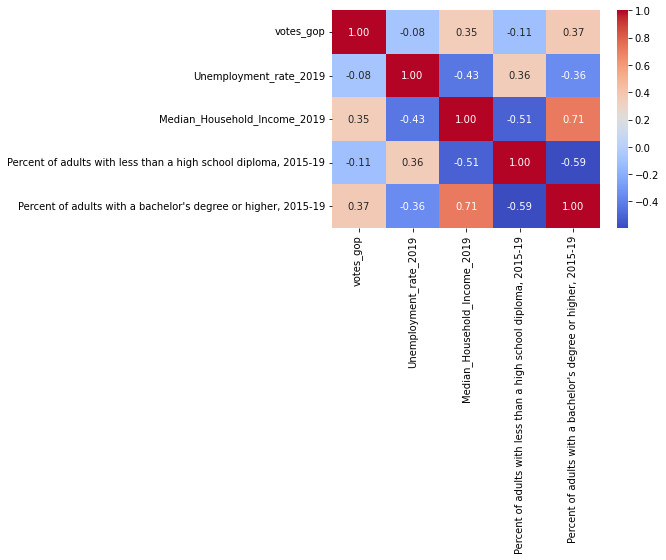

In [11]:
g1.figure.get_figure()

Alors que celle construite directement avec `pandas`
ressemblera plutôt à ce tableau :

In [12]:
g2

,votes_gop,Unemployment_rate_2019,Median_Household_Income_2019,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
votes_gop,1.00,-0.08,0.35,-0.11,0.37
Unemployment_rate_2019,-0.08,1.00,-0.43,0.36,-0.36
Median_Household_Income_2019,0.35,-0.43,1.00,-0.51,0.71
"Percent of adults with less than a high school diploma, 2015-19",-0.11,0.36,-0.51,1.00,-0.59
"Percent of adults with a bachelor's degree or higher, 2015-19",0.37,-0.36,0.71,-0.59,1.00


1.  Choisir quelques variables (pas plus de 4 ou 5) et représenter une matrice de nuages de points

array([[<AxesSubplot:xlabel='votes_gop', ylabel='votes_gop'>,
        <AxesSubplot:xlabel='Unemployment_rate_2019', ylabel='votes_gop'>,
        <AxesSubplot:xlabel='Median_Household_Income_2019', ylabel='votes_gop'>,
        <AxesSubplot:xlabel='Percent of adults with less than a high school diploma, 2015-19', ylabel='votes_gop'>,
        <AxesSubplot:xlabel="Percent of adults with a bachelor's degree or higher, 2015-19", ylabel='votes_gop'>],
       [<AxesSubplot:xlabel='votes_gop', ylabel='Unemployment_rate_2019'>,
        <AxesSubplot:xlabel='Unemployment_rate_2019', ylabel='Unemployment_rate_2019'>,
        <AxesSubplot:xlabel='Median_Household_Income_2019', ylabel='Unemployment_rate_2019'>,
        <AxesSubplot:xlabel='Percent of adults with less than a high school diploma, 2015-19', ylabel='Unemployment_rate_2019'>,
        <AxesSubplot:xlabel="Percent of adults with a bachelor's degree or higher, 2015-19", ylabel='Unemployment_rate_2019'>],
       [<AxesSubplot:xlabel='votes_go

1.  (optionnel) Refaire ces figures avec `plotly` qui offre également la possibilité de faire une matrice de corrélation. Le résultat devrait ressembler au graphique suivant :

{{% /box %}}

## Transformer les données

Les différences d’échelle ou de distribution entre les variables peuvent
diverger des hypothèses sous-jacentes dans les modèles.

Par exemple, dans le cadre
de la régression linéaire, les variables catégorielles ne sont pas traitées à la même
enseigne que les variables ayant valeur dans $\mathbb{R}$. Une variable
discrète (prenant un nombre fini de valeurs) devra être transformées en suite de
variables 0/1 par rapport à une modalité de référence pour être en adéquation
avec les hypothèses de la régression linéaire. On appelle ce type de transformation
*one-hot encoding*, sur lequel nous reviendrons. Il s’agit d’une transformation,
parmi d’autres, disponibles dans `scikit` pour mettre en adéquation un jeu de
données et des hypothèses mathématiques.

L’ensemble de ces tâches s’appelle le *preprocessing*. L’un des intérêts
d’utiliser `scikit` est qu’on peut considérer qu’une tâche de preprocessing
est une tâche d’apprentissage (on apprend des paramètres d’une structure
de données) qui est réutilisable pour un jeu de données à la structure
similaire:

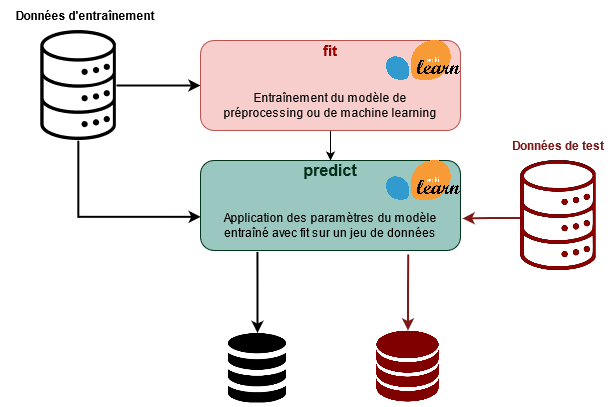

### Standardisation

La standardisation consiste à transformer des données pour que la distribution empirique suive une loi $\mathcal{N}(0,1)$. Pour être performants, la plupart des modèles de machine learning nécessitent souvent d’avoir des données dans cette distribution.

{{% box status=“warning” title=“Warning” icon=“fa fa-exclamation-triangle” %}}
Pour un statisticien, le terme `normalization` dans le vocable `scikit` peut avoir un sens contre-intuitif. On s’attendrait à ce que la normalisation consiste à transformer une variable de manière à ce que $X \sim \mathcal{N}(0,1)$. C’est, en fait, la **standardisation** en `scikit`.

La **normalisation** consiste à modifier les données de manière à avoir une norme unitaire. La raison est expliquée plus bas.
{{% /box %}}

{{% box status=“exercise” title=“Exercice” icon=“fas fa-pencil-alt” %}}

**Exercice 3: Standardisation**

1.  Standardiser la variable `Median_Household_Income_2019` (ne pas écraser les valeurs !) et regarder l’histogramme avant/après normalisation.

array([[<AxesSubplot:xlabel='votes_gop', ylabel='votes_gop'>,
        <AxesSubplot:xlabel='Unemployment_rate_2019', ylabel='votes_gop'>,
        <AxesSubplot:xlabel='Median_Household_Income_2019', ylabel='votes_gop'>,
        <AxesSubplot:xlabel='Percent of adults with less than a high school diploma, 2015-19', ylabel='votes_gop'>,
        <AxesSubplot:xlabel="Percent of adults with a bachelor's degree or higher, 2015-19", ylabel='votes_gop'>],
       [<AxesSubplot:xlabel='votes_gop', ylabel='Unemployment_rate_2019'>,
        <AxesSubplot:xlabel='Unemployment_rate_2019', ylabel='Unemployment_rate_2019'>,
        <AxesSubplot:xlabel='Median_Household_Income_2019', ylabel='Unemployment_rate_2019'>,
        <AxesSubplot:xlabel='Percent of adults with less than a high school diploma, 2015-19', ylabel='Unemployment_rate_2019'>,
        <AxesSubplot:xlabel="Percent of adults with a bachelor's degree or higher, 2015-19", ylabel='Unemployment_rate_2019'>],
       [<AxesSubplot:xlabel='votes_go

*Note : On obtient bien une distribution centrée à zéro et on pourrait vérifier que la variance empirique soit bien égale à 1. On pourrait aussi vérifier que ceci est vrai également quand on transforme plusieurs colonnes à la fois.*

1.  Créer `scaler`, un `Transformer` que vous construisez sur les 1000 premières lignes de votre DataFrame. Vérifier la moyenne et l’écart-type de chaque colonne sur ces mêmes observations.

*Note : Les paramètres qui seront utilisés pour une standardisation ultérieure sont stockés dans les attributs `.mean_` et `.scale_`*

On peut voir ces attributs comme des paramètres entraînés sur un certain jeu de
données et qu’on peut réutiliser sur un autre, à condition que les
dimensions coïncident.

1.  Appliquer `scaler` sur les autres lignes du DataFrame et comparer les distributions obtenues de la variable `Median_Household_Income_2019`.

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

*Note : Une fois appliqués à un autre `DataFrame`, on peut remarquer que la distribution n’est pas exactement centrée-réduite dans le `DataFrame` sur lequel les paramètres n’ont pas été estimés. C’est normal, l’échantillon initial n’était pas aléatoire, les moyennes et variances de cet échantillon n’ont pas de raison de coïncider avec les moments de l’échantillon complet.*

{{% /box %}}

### Normalisation

La **normalisation** est l’action de transformer les données de manière à obtenir une norme ($\mathcal{l}_1$ ou $\mathcal{l}_2$) unitaire. Autrement dit, avec la norme adéquate, la somme des éléments est égale à 1. Par défaut, la norme est dans $\mathcal{l}_2$. Cette transformation est particulièrement utilisée en classification de texte ou pour effectuer du *clustering*.

{{% box status=“exercise” title=“Exercice” icon=“fas fa-pencil-alt” %}}

**Exercice 4 : Normalisation**

1.  Normaliser la variable `Median_Household_Income_2019` (ne pas écraser les valeurs !) et regarder l’histogramme avant/après normalisation.

array([<AxesSubplot:xlabel='Median_Household_Income_2019', ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

1.  Vérifier que la norme $\mathcal{l}_2$ est bien égale à 1.

{{% /box %}}

{{% box status=“warning” title=“Warning” icon=“fa fa-exclamation-triangle” %}}
`preprocessing.Normalizer` n’accepte pas les valeurs manquantes, alors que `preprocessing.StandardScaler()` s’en accomode (dans la version `0.22` de scikit). Pour pouvoir aisément appliquer le *normalizer*, il faut

-   retirer les valeurs manquantes du DataFrame avec la méthode `dropna`: `df.dropna(how = "any")`;
-   ou les imputer avec un modèle adéquat. [`scikit` permet de le faire](https://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).
    {{% /box %}}

### Encodage des valeurs catégorielles

Les données catégorielles doivent être recodées sous forme de valeurs numériques pour être intégrables dans le cadre d’un modèle. Cela peut être fait de plusieurs manières :

-   `LabelEncoder`: transforme un vecteur `["a","b","c"]` en vecteur numérique `[0,1,2]`. Cette approche a l’inconvénient d’introduire un ordre dans les modalités, ce qui n’est pas toujours souhaitable

-   `OrdinalEncoder`: une version généralisée du `LabelEncoder` qui a vocation à s’appliquer sur des matrices ($X$), alors que `LabelEncoder` est plutôt pour un vecteur ($y$)

-   `pandas.get_dummies` effectue une opération de *dummy expansion*. Un vecteur de taille *n* avec *K* catégories sera transformé en matrice de taille $n \times K$ pour lequel chaque colonne sera une variable *dummy* pour la modalité *k*. Il y a ici $K$ modalités et il y a donc multicollinéarité. Avec une régression linéaire avec constante, il convient de retirer une modalité avant l’estimation.

-   `OneHotEncoder` est une version généralisée (et optimisée) de la *dummy expansion*. Il a plutôt vocation à s’appliquer sur les *features* ($X$) du modèle

{{% box status=“exercise” title=“Exercice” icon=“fas fa-pencil-alt” %}}

**Exercice 5 : Encoder des variables catégorielles**

1.  Créer `df` qui conserve uniquement les variables `state_name` et `county_name` dans `votes`.

2.  Appliquer à `state_name` un `LabelEncoder`

*Note : Le résultat du label encoding est relativement intuitif, notamment quand on le met en relation avec le vecteur initial.*

1.  Regarder la *dummy expansion* de `state_name`

2.  Appliquer un `OrdinalEncoder` à `df[['state_name', 'county_name']]`

*Note : Le résultat du *ordinal encoding\* est cohérent avec celui du label encoding\*

1.  Appliquer un `OneHotEncoder` à `df[['state_name', 'county_name']]`

*Note : `scikit` optimise l’objet nécessaire pour stocker le résultat d’un modèle de transformation. Par exemple, le résultat de l’encoding One Hot est un objet très volumineux. Dans ce cas, scikit utilise une matrice Sparse.*

{{% /box %}}